In [173]:
import pandas as pd 
import io
import numpy as np 
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from matplotlib.pyplot import text
from glob import glob
# from tabulate import tabulate
import re
import glob
import math
import os
import MDAnalysis as mda
from MDAnalysis import Universe
from MDAnalysis.analysis import align
import MDAnalysis.analysis.encore as encore
from MDAnalysis.analysis import rms
import matplotlib.image as mpimg
from ipywidgets import Output, GridspecLayout
from IPython import display
# import plotly
from numpy.linalg import norm
from MDAnalysis.analysis.dihedrals import Janin
from MDAnalysis.analysis.hydrogenbonds.hbond_analysis import HydrogenBondAnalysis as HBA

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import text
import numpy as np
import glob
import os
import MDAnalysis as mda
from MDAnalysis import Universe
import MDAnalysis.analysis.rms as rms
import io
import csv
from MDAnalysis.topology.guessers import guess_types


from MDAnalysis.lib.distances import distance_array
from MDAnalysis.analysis import distances
from MDAnalysis.analysis import contacts

import scipy # import ttest_ind
from scipy.stats import ttest_ind

from statannotations.Annotator import Annotator

In [24]:
def read_renumtxt(filepath):
    """Read the renumbering file generated by amber tleap; return pandas df"""
    df = pd.read_csv(filepath, delim_whitespace=True, names=["RES", "og_num", "RES1", "new_num"])
    df = df.astype({"og_num": int, "new_num": int})   
    return df


d = {'CYS': 'C', 'ASP': 'D', 'SER': 'S', 'GLN': 'Q', 'LYS': 'K',
     'ILE': 'I', 'PRO': 'P', 'THR': 'T', 'PHE': 'F', 'ASN': 'N', 
     'GLY': 'G', 'HID': 'H', 'LEU': 'L', 'ARG': 'R', 'TRP': 'W', 
     'ALA': 'A', 'VAL': 'V', 'GLU': 'E', 'TYR': 'Y', 'MET': 'M',
     'HIS': 'H', 'CYX': 'C', 'HSD': 'H',
    }

clrs_aa =  {'A': (0.996, 0.797, 0.598), #'#EFC3C3', #Aliphatic
            'G': (0.996, 0.797, 0.598), #'#EFC3C3',
            'I': (0.996, 0.797, 0.598), #'#EFC3C3',
            'L': (0.996, 0.797, 0.598), #'#EFC3C3',
            'P': (0.996, 0.797, 0.598), #'#EFC3C3',
            'V': (0.996, 0.797, 0.598), #'#EFC3C3',
            'F': (0.598, 0.996, 0.598), #'#b559e3', #Aromatic
            'W': (0.598, 0.996, 0.598), #'#b559e3',
            'Y': (0.598, 0.996, 0.598), #'#b559e3',
            'D': (0.398, 0.797, 0.996), # '#e35959', #Acidic 
            'E': (0.398, 0.797, 0.996), # '#e35959',
            'R': (0.996, 0.398, 0.797), #'#B1FF93', #Basic 
            'H': (0.996, 0.398, 0.797), #'#B1FF93',
            'K': (0.996, 0.398, 0.797), #'#B1FF93',
            'S': (0.797, 0.797, 0.996), #'#5979e3', #Hydroxylic - polar
            'T': (0.797, 0.797, 0.996), #'#5979e3',
            'C': (0.996,0.996,0.398), #'#59bee3', #Sulfur-containing
            'M': (0.996,0.996,0.398), #'#59bee3',
            'N': (0.797, 0.797, 0.996), #'#5979e3', #Amidic -polar
            'Q': (0.797, 0.797, 0.996), #'#5979e3',
            '-': 'white',
            'X': 'white'
           }


dfrenum = read_renumtxt('/mnt/sdb1/et2023/Navpip/2306_NEWatomistic/2306_NEW/AMB/6agf_trim_renum.txt')
dfrenum['RESshort'] = [d[i] for i in dfrenum.RES]
dfrenum['RESID'] = dfrenum['RESshort'] + dfrenum['og_num'].astype(str)
dfrenum['color'] = [clrs_aa[c] for c in dfrenum['RESshort']]

# read traj

In [248]:
adir = '/mnt/sdb1/et2023/Navpip/2306_NEWatomistic/2306_NEW/AMB/AWTX_SAP/'
bdir = '/mnt/sdb1/et2023/Navpip/2306_NEWatomistic/2306_NEW/AMB/BWTX_PCX/'
cdir = '/mnt/sdb1/et2023/Navpip/2306_NEWatomistic/2306_NEW/AMB/CWCW_SAP/'
ddir = '/mnt/sdb1/et2023/Navpip/2306_NEWatomistic/2306_NEW/AMB/DCWC_PCX/'
edir = '/mnt/sdb1/et2023/Navpip/2306_NEWatomistic/2306_NEW/AMB/EWT1_SAP/'

In [249]:
topoa = adir + 'PROT.pdb'
repstrideda1 = adir + 'rep_1/repstride.xtc'
ua1 = Universe(topoa, repstrideda1)
repstrideda2 = adir + 'rep_2/repstride.xtc'
ua2 = Universe(topoa, repstrideda2)
repstrideda3 = adir + 'rep_3/repstride.xtc'
ua3 = Universe(topoa, repstrideda3)
repstrideda4 = adir + 'rep_4/repstride.xtc'
ua4 = Universe(topoa, repstrideda4)
repstrideda5 = adir + 'rep_5/repstride.xtc'
ua5 = Universe(topoa, repstrideda5)

topob = bdir + 'PROT.pdb'
repstridedb1 = bdir + 'rep_1/repstride.xtc'
ub1 = Universe(topob, repstridedb1)
repstridedb2 = bdir + 'rep_2/repstride.xtc'
ub2 = Universe(topob, repstridedb2)
repstridedb3 = bdir + 'rep_3/repstride.xtc'
ub3 = Universe(topob, repstridedb3)
repstridedb4 = bdir + 'rep_4/repstride.xtc'
ub4 = Universe(topob, repstridedb4)
repstridedb5 = bdir + 'rep_5/repstride.xtc'
ub5 = Universe(topob, repstridedb5)

topoe = edir + 'PROT.pdb'
repstridede1 = edir + 'rep_1/repstride.xtc'
ue1 = Universe(topoe, repstridede1)
repstridede2 = edir + 'rep_2/repstride.xtc'
ue2 = Universe(topoe, repstridede2)
repstridede3 = edir + 'rep_3/repstride.xtc'
ue3 = Universe(topoe, repstridede3)
repstridede4 = edir + 'rep_4/repstride.xtc'
ue4 = Universe(topoe, repstridede4)
repstridede5 = edir + 'rep_5/repstride.xtc'
ue5 = Universe(topoe, repstridede5)

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/topology/base.py:203: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  residx = np.zeros_like(criteria[0], dtype=np.int)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/coordinates/XDR.py:216: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn("Reload offsets from trajectory\n "


In [44]:
xtcconcat = bdir + 'repsstrideALL_250-1500.xtc'
uconcat = Universe(topob, xtcconcat)
uconcat.trajectory

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/coordinates/XDR.py:216: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn("Reload offsets from trajectory\n "


<XTCReader /mnt/sdb1/et2023/Navpip/2306_NEWatomistic/2306_NEW/AMB/BWTX_PCX/repsstrideALL_250-1500.xtc with 713 frames of 18425 atoms>

In [100]:
cl = 'clus1cut3'
ind = [519, 28, 29, 32, 33, 34, 35, 37, 39, 41, 48, 52, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 90, 96, 97, 98, 101, 102, 104, 105, 106, 107, 110, 111, 113, 115, 116, 186, 189, 192, 195, 208, 209, 211, 213, 214, 216, 217, 218, 219, 220, 222, 224, 225, 226, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 290, 291, 292, 293, 294, 296, 297, 298, 299, 300, 301, 334, 340, 408, 409, 410, 411, 418, 420, 421, 422, 424, 425, 426, 428, 429, 431, 433, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 520, 521, 522, 523, 565, 574, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 615, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 680, 681, 683, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 733, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 791, 793, 794, 795, 796, 797, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 866, 867, 868, 869, 870, 871, 872, 873, 950, 951, 952, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 979, 980, 981, 983, 984, 986, 987, 1005, 1006, 1026, 1027, 1028, 1029, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1062, 1063, 1140, 1141, 1142, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1169, 1170, 1171, 1173, 1174, 1176, 1177, 1195, 1196, 1216, 1217, 1218, 1219, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249, 1252, 1253, 1273]
protein = uconcat.select_atoms("all")
with mda.Writer(adir + 'pip' + cl + '.xtc', protein.n_atoms) as W:
    for ts in uconcat.trajectory[ind]:
        W.write(protein)

In [ ]:
pipxtc = adir + 'pip' + cl + '.xtc'
u = Universe(topoa, pipxtc)

In [250]:
print((ua1.trajectory))
print((ua2.trajectory))
print((ua3.trajectory))
print((ua4.trajectory))
print((ua5.trajectory))
print((ub1.trajectory))
print((ub2.trajectory))
print((ub3.trajectory))
print((ub4.trajectory))
print((ub5.trajectory))
print((ue1.trajectory))
print((ue2.trajectory))
print((ue3.trajectory))
print((ue4.trajectory))
print((ue5.trajectory))

<XTCReader /mnt/sdb1/et2023/Navpip/2306_NEWatomistic/2306_NEW/AMB/AWTX_SAP/rep_1/repstride.xtc with 1540 frames of 18575 atoms>
<XTCReader /mnt/sdb1/et2023/Navpip/2306_NEWatomistic/2306_NEW/AMB/AWTX_SAP/rep_2/repstride.xtc with 1549 frames of 18575 atoms>
<XTCReader /mnt/sdb1/et2023/Navpip/2306_NEWatomistic/2306_NEW/AMB/AWTX_SAP/rep_3/repstride.xtc with 1551 frames of 18575 atoms>
<XTCReader /mnt/sdb1/et2023/Navpip/2306_NEWatomistic/2306_NEW/AMB/AWTX_SAP/rep_4/repstride.xtc with 1503 frames of 18575 atoms>
<XTCReader /mnt/sdb1/et2023/Navpip/2306_NEWatomistic/2306_NEW/AMB/AWTX_SAP/rep_5/repstride.xtc with 1543 frames of 18575 atoms>
<XTCReader /mnt/sdb1/et2023/Navpip/2306_NEWatomistic/2306_NEW/AMB/BWTX_PCX/rep_1/repstride.xtc with 1540 frames of 18425 atoms>
<XTCReader /mnt/sdb1/et2023/Navpip/2306_NEWatomistic/2306_NEW/AMB/BWTX_PCX/rep_2/repstride.xtc with 1548 frames of 18425 atoms>
<XTCReader /mnt/sdb1/et2023/Navpip/2306_NEWatomistic/2306_NEW/AMB/BWTX_PCX/rep_3/repstride.xtc with 1536

# RMSD

In [256]:
def plot_rmsd_panel(sel, title, ua1, ua2, ua3, ua4, ua5, aaa):
    roller = 1 
    st = 10 
    c_alphas = ua1.select_atoms(sel)
    Ra1 = rms.RMSD(c_alphas).run(step=st)
    dfrmsda1 = pd.DataFrame(Ra1.rmsd,
                      columns=['Frame', 'Time (ns)', 'loop'])
    dfrmsda1['rep'] = 'repa1'
    dfrmsda1['rolling'] = dfrmsda1['loop'].rolling(roller).mean()
    c_alphas = ua2.select_atoms(sel)
    Ra2 = rms.RMSD(c_alphas).run(step=st)
    dfrmsda2 = pd.DataFrame(Ra2.rmsd,
                      columns=['Frame', 'Time (ns)', 'loop'])
    dfrmsda2['rep'] = 'repa2'
    dfrmsda2['rolling'] = dfrmsda2['loop'].rolling(roller).mean()
    c_alphas = ua3.select_atoms(sel)
    Ra3 = rms.RMSD(c_alphas).run(step=st)
    dfrmsda3 = pd.DataFrame(Ra3.rmsd,
                      columns=['Frame', 'Time (ns)', 'loop'])
    dfrmsda3['rep'] = 'repa3'
    dfrmsda3['rolling'] = dfrmsda3['loop'].rolling(roller).mean()
    c_alphas = ua4.select_atoms(sel)
    Ra4 = rms.RMSD(c_alphas).run(step=st)
    dfrmsda4 = pd.DataFrame(Ra4.rmsd,
                      columns=['Frame', 'Time (ns)', 'loop'])
    dfrmsda4['rep'] = 'repa4'
    dfrmsda4['rolling'] = dfrmsda4['loop'].rolling(roller).mean()
    c_alphas = ua5.select_atoms(sel)
    Ra5 = rms.RMSD(c_alphas).run(step=st)
    dfrmsda5 = pd.DataFrame(Ra5.rmsd,
                      columns=['Frame', 'Time (ns)', 'loop'])
    dfrmsda5['rep'] = 'repa5'
    dfrmsda5['rolling'] = dfrmsda5['loop'].rolling(roller).mean()

    dfrmsd = pd.concat([dfrmsda1, dfrmsda2, dfrmsda3, dfrmsda4, dfrmsda5], axis=0)
    
    sns.lineplot(data=dfrmsd.reset_index(drop=True), x='Frame', y='rolling', hue='rep', ax=aaa)
#     aaa.set_title(title)
    aaa.get_legend().remove()
    aaa.set_ylabel("RMSD (Å)")
    aaa.set_xlabel("Time (ns)")
    aaa.set_xlim(0, 1500)
    sns.despine()

In [257]:
adir+'../rmsd.png'
pdir = '/mnt/sdb1/et2023/Navpip/2306_NEWatomistic/2306_NEW/AMB/'

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(group), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(group), dtype=np.bool)
/h

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(group), dtype=np.bool)


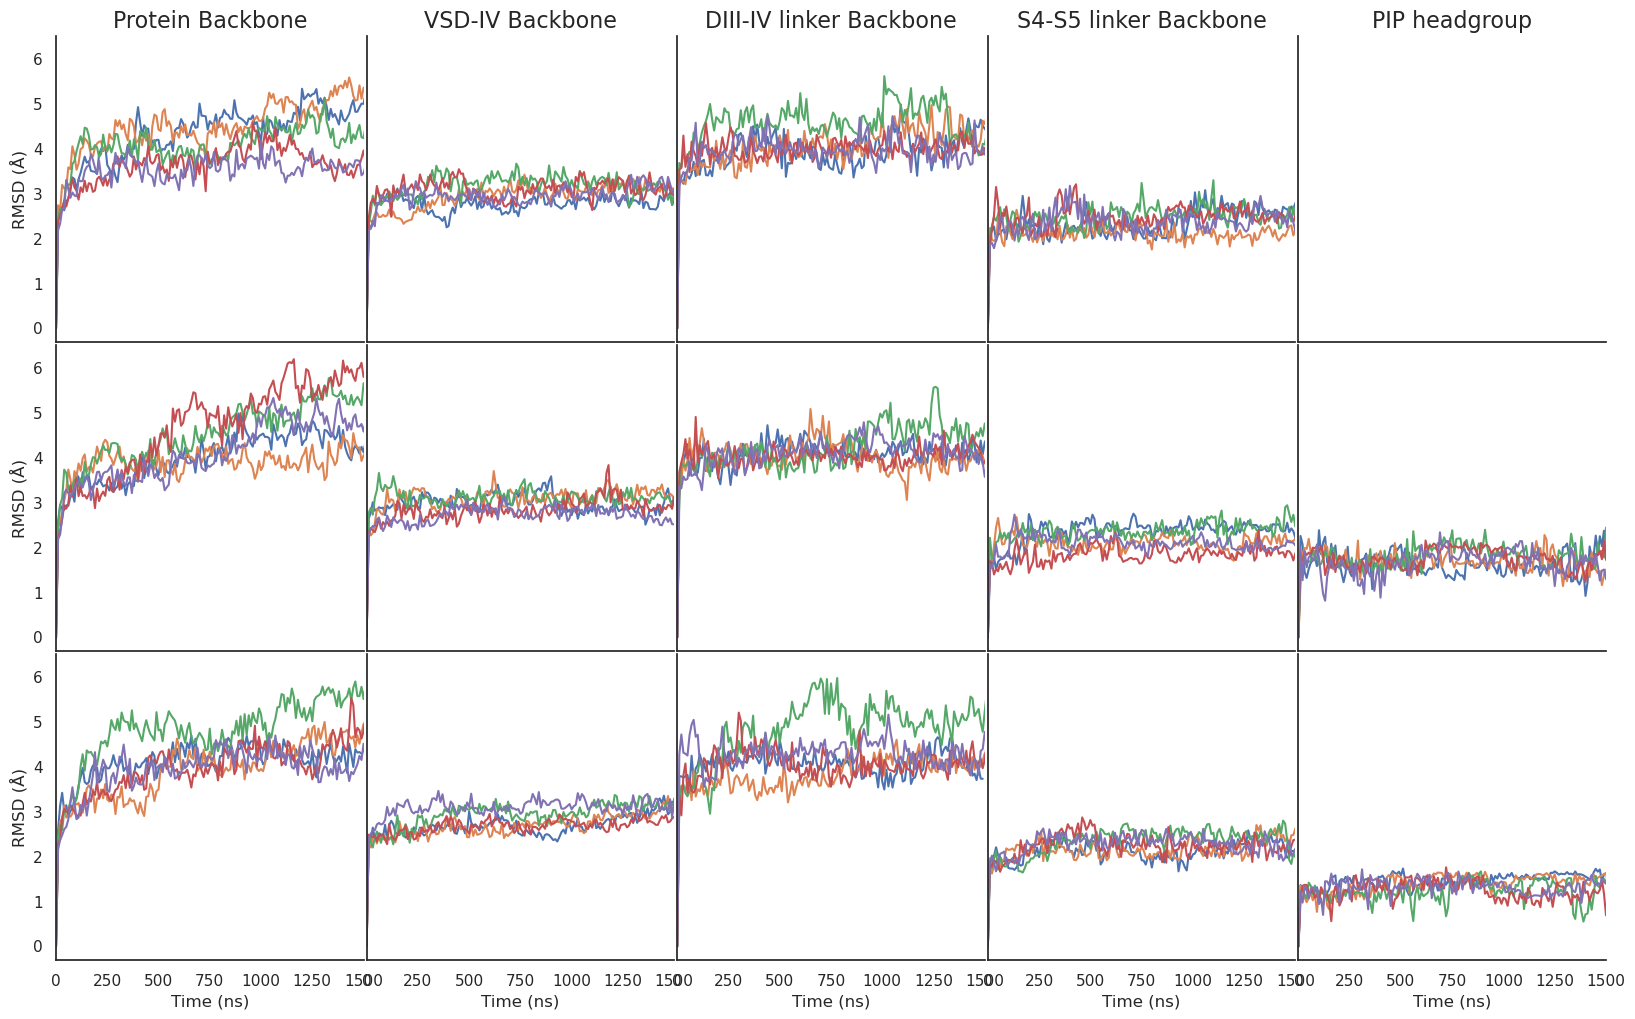

In [258]:
bbsel = "name CA C O N"
vsd4sel = "resid 867-987"# and " + bbsel
d34sel = "resid 830-866"# and " + bbsel
s45sel = "resid 988-1002"# and " + bbsel
pipsel = "resname APH"

sns.set_style("white")

fig, ax = plt.subplots(3,5, figsize=(20, 12), sharey=True, sharex=True)

plot_rmsd_panel(bbsel, "protein backbone -PIP2", ub1, ub2, ub3, ub4, ub5, ax[0,0])
plot_rmsd_panel(bbsel, "protein backbone +PIP2", ua1, ua2, ua3, ua4, ua5, ax[1,0])
plot_rmsd_panel(bbsel, "protein backbone +PIP1", ue1, ue2, ue3, ue4, ue5, ax[2,0])

plot_rmsd_panel(vsd4sel, "VSD-IV -PIP2", ub1, ub2, ub3, ub4, ub5, ax[0,1])
plot_rmsd_panel(vsd4sel, "VSD-IV +PIP2", ua1, ua2, ua3, ua4, ua5, ax[1,1])
plot_rmsd_panel(vsd4sel, "VSD-IV +PIP1", ue1, ue2, ue3, ue4, ue5, ax[2,1])

plot_rmsd_panel(d34sel, "DIII-IV linker -PIP2", ub1, ub2, ub3, ub4, ub5, ax[0,2])
plot_rmsd_panel(d34sel, "DIII-IV linker +PIP2", ua1, ua2, ua3, ua4, ua5, ax[1,2])
plot_rmsd_panel(d34sel, "DIII-IV linker +PIP1", ue1, ue2, ue3, ue4, ue5, ax[2,2])

plot_rmsd_panel(s45sel, "S4-S5 linker -PIP2", ub1, ub2, ub3, ub4, ub5, ax[0,3])
plot_rmsd_panel(s45sel, "S4-S5 linker +PIP2", ua1, ua2, ua3, ua4, ua5, ax[1,3])
plot_rmsd_panel(s45sel, "S4-S5 linker +PIP1", ue1, ue2, ue3, ue4, ue5, ax[2,3])

plot_rmsd_panel(pipsel, "PIP2 headgroup", ua1, ua2, ua3, ua4, ua5, ax[1,4])
plot_rmsd_panel(pipsel, "PIP1 headgroup", ue1, ue2, ue3, ue4, ue5, ax[2,4])


plt.subplots_adjust(hspace=0.01, wspace=0.01)
ax[0,0].set_title("Protein Backbone", fontsize=16)
ax[0,1].set_title("VSD-IV Backbone", fontsize=16)
ax[0,2].set_title("DIII-IV linker Backbone", fontsize=16)
ax[0,3].set_title("S4-S5 linker Backbone", fontsize=16)
ax[0,4].set_title("PIP headgroup", fontsize=16)

plt.savefig(pdir+'rmsd_PIP1_PIP2.png', dpi=500, bbox_inches='tight')

# RMSF

In [97]:
def rmsf2df_allres(strtfr):
    c_alphas_a = ua1.select_atoms('name CA')
    rmsf_a1 = rms.RMSF(c_alphas_a).run(start=strtfr)
    c_alphas_a = ua2.select_atoms('name CA')
    rmsf_a2 = rms.RMSF(c_alphas_a).run(start=strtfr)
    c_alphas_a = ua3.select_atoms('name CA')
    rmsf_a3 = rms.RMSF(c_alphas_a).run(start=strtfr)
    c_alphas_a = ua4.select_atoms('name CA')
    rmsf_a4 = rms.RMSF(c_alphas_a).run(start=strtfr)
    c_alphas_a = ua5.select_atoms('name CA')
    rmsf_a5 = rms.RMSF(c_alphas_a).run(start=strtfr)

    c_alphas_a = ub1.select_atoms('name CA')
    rmsf_b1 = rms.RMSF(c_alphas_a).run(start=strtfr)
    c_alphas_a = ub2.select_atoms('name CA')
    rmsf_b2 = rms.RMSF(c_alphas_a).run(start=strtfr)
    c_alphas_a = ub3.select_atoms('name CA')
    rmsf_b3 = rms.RMSF(c_alphas_a).run(start=strtfr)
    c_alphas_a = ub4.select_atoms('name CA')
    rmsf_b4 = rms.RMSF(c_alphas_a).run(start=strtfr)
    c_alphas_a = ub5.select_atoms('name CA')
    rmsf_b5 = rms.RMSF(c_alphas_a).run(start=strtfr)

    dfrmsf1 = dfrenum.copy()
    dfrmsf1['rmsf'] = rmsf_a1.rmsf
    dfrmsf1['rep'] = 'repa1'
    dfrmsf2 = dfrenum.copy()
    dfrmsf2['rmsf'] = rmsf_a2.rmsf
    dfrmsf2['rep'] = 'repa2'
    dfrmsf3 = dfrenum.copy()
    dfrmsf3['rmsf'] = rmsf_a3.rmsf
    dfrmsf3['rep'] = 'repa3'
    dfrmsf4 = dfrenum.copy()
    dfrmsf4['rmsf'] = rmsf_a4.rmsf
    dfrmsf4['rep'] = 'repa4'
    dfrmsf5 = dfrenum.copy()
    dfrmsf5['rmsf'] = rmsf_a5.rmsf
    dfrmsf5['rep'] = 'repa5'
    dfrmsf_a = pd.concat([dfrmsf1, dfrmsf2, dfrmsf3, dfrmsf4, dfrmsf5 ])

    dfrmsf1 = dfrenum.copy()
    dfrmsf1['rmsf'] = rmsf_b1.rmsf
    dfrmsf1['rep'] = 'repb1'
    dfrmsf2 = dfrenum.copy()
    dfrmsf2['rmsf'] = rmsf_b2.rmsf
    dfrmsf2['rep'] = 'repb2'
    dfrmsf3 = dfrenum.copy()
    dfrmsf3['rmsf'] = rmsf_b3.rmsf
    dfrmsf3['rep'] = 'repb3'
    dfrmsf4 = dfrenum.copy()
    dfrmsf4['rmsf'] = rmsf_b4.rmsf
    dfrmsf4['rep'] = 'repb4'
    dfrmsf5 = dfrenum.copy()
    dfrmsf5['rmsf'] = rmsf_b5.rmsf
    dfrmsf5['rep'] = 'repb5'
    dfrmsf_b = pd.concat([dfrmsf1, dfrmsf2, dfrmsf3, dfrmsf4, dfrmsf5 ])
    
    dfrmsf_a['PIP'] = '+PIP2'
    dfrmsf_b['PIP'] = '-PIP1/2'
    dfrmsf = pd.concat([dfrmsf_a, dfrmsf_b])
    
    return dfrmsf 

In [96]:
def rmsf2df_allres_E(strtfr):
    c_alphas_a = ue1.select_atoms('name CA')
    rmsf_a1 = rms.RMSF(c_alphas_a).run(start=strtfr)
    c_alphas_a = ue2.select_atoms('name CA')
    rmsf_a2 = rms.RMSF(c_alphas_a).run(start=strtfr)
    c_alphas_a = ue3.select_atoms('name CA')
    rmsf_a3 = rms.RMSF(c_alphas_a).run(start=strtfr)
    c_alphas_a = ue4.select_atoms('name CA')
    rmsf_a4 = rms.RMSF(c_alphas_a).run(start=strtfr)
    c_alphas_a = ue5.select_atoms('name CA')
    rmsf_a5 = rms.RMSF(c_alphas_a).run(start=strtfr)

    c_alphas_a = ub1.select_atoms('name CA')
    rmsf_b1 = rms.RMSF(c_alphas_a).run(start=strtfr)
    c_alphas_a = ub2.select_atoms('name CA')
    rmsf_b2 = rms.RMSF(c_alphas_a).run(start=strtfr)
    c_alphas_a = ub3.select_atoms('name CA')
    rmsf_b3 = rms.RMSF(c_alphas_a).run(start=strtfr)
    c_alphas_a = ub4.select_atoms('name CA')
    rmsf_b4 = rms.RMSF(c_alphas_a).run(start=strtfr)
    c_alphas_a = ub5.select_atoms('name CA')
    rmsf_b5 = rms.RMSF(c_alphas_a).run(start=strtfr)

    dfrmsf1 = dfrenum.copy()
    dfrmsf1['rmsf'] = rmsf_a1.rmsf
    dfrmsf1['rep'] = 'repa1'
    dfrmsf2 = dfrenum.copy()
    dfrmsf2['rmsf'] = rmsf_a2.rmsf
    dfrmsf2['rep'] = 'repa2'
    dfrmsf3 = dfrenum.copy()
    dfrmsf3['rmsf'] = rmsf_a3.rmsf
    dfrmsf3['rep'] = 'repa3'
    dfrmsf4 = dfrenum.copy()
    dfrmsf4['rmsf'] = rmsf_a4.rmsf
    dfrmsf4['rep'] = 'repa4'
    dfrmsf5 = dfrenum.copy()
    dfrmsf5['rmsf'] = rmsf_a5.rmsf
    dfrmsf5['rep'] = 'repa5'
    dfrmsf_a = pd.concat([dfrmsf1, dfrmsf2, dfrmsf3, dfrmsf4, dfrmsf5 ])

    dfrmsf1 = dfrenum.copy()
    dfrmsf1['rmsf'] = rmsf_b1.rmsf
    dfrmsf1['rep'] = 'repb1'
    dfrmsf2 = dfrenum.copy()
    dfrmsf2['rmsf'] = rmsf_b2.rmsf
    dfrmsf2['rep'] = 'repb2'
    dfrmsf3 = dfrenum.copy()
    dfrmsf3['rmsf'] = rmsf_b3.rmsf
    dfrmsf3['rep'] = 'repb3'
    dfrmsf4 = dfrenum.copy()
    dfrmsf4['rmsf'] = rmsf_b4.rmsf
    dfrmsf4['rep'] = 'repb4'
    dfrmsf5 = dfrenum.copy()
    dfrmsf5['rmsf'] = rmsf_b5.rmsf
    dfrmsf5['rep'] = 'repb5'
    dfrmsf_b = pd.concat([dfrmsf1, dfrmsf2, dfrmsf3, dfrmsf4, dfrmsf5 ])
    
    dfrmsf_a['PIP'] = '+PIP1'
    dfrmsf_b['PIP'] = '-PIP1/2'
    dfrmsf = pd.concat([dfrmsf_a, dfrmsf_b])
    
    return dfrmsf 

In [155]:
def plot_rmsf(df, res1, res2, title, sig=True, pip='PIP2', pal=pal):
    dat = df[(df.new_num > res1) & (df.new_num < res2)]
    
    t=[]
    for i in np.unique(dat['og_num']):
        vdf = dat[dat['og_num']==i]
        t.append(ttest_ind(vdf[vdf['PIP']=='+'+pip]['rmsf'], vdf[vdf['PIP']=='-PIP1/2']['rmsf'])[1])

    dfstat=pd.DataFrame(t,index=np.unique(dat['og_num']), columns=['stat'])
    # ' '.join(list(df[df['stat']<0.05].index.astype(str)))
#     sig = list(df[df['stat']<0.05].index.astype(int))
    
    if sig:
        dat2 = dat[dat["og_num"].isin(list(dfstat[dfstat['stat']<0.05].index))]
    else:
        dat2 = dat 

#     sns.set(font_scale=2.5)
    sns.set_theme(style="whitegrid")

    fig, ax = plt.subplots(figsize=(len(dat2[dat2['PIP']=='-PIP1/2'])/7, 5))

    sns.barplot(
        data=dat2, #kind="bar",
        x="RESID", y="rmsf", ax=ax, hue="PIP",
        alpha=.8, palette=pal, errorbar='se'
    )
    sns.despine(left=True)
    plt.xlabel('', fontsize=22)
    plt.ylabel('RMSF ($\AA$)', fontsize=22)
    plt.title(title, fontsize=22)
    plt.legend(loc="upper right", ncol=1, columnspacing=0.4, frameon=False, fontsize=16)
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
    ax.tick_params(axis='both', labelsize=22)  # Set the tick label size
#     for tl in ax.get_xticklabels():
#         txt = tl.get_text()
#     #     print(txt, type(resnew.set_index('resname').loc[txt]['color']))
#         if type(dat.set_index('RESID').loc[txt]['color']) == str:
#             tl.set_backgroundcolor(dat.set_index('RESID').loc[txt]['color'])
#         else:
#             tl.set_backgroundcolor(dat.set_index('RESID').loc[txt]['color'].unique()[0])
            
    

In [245]:
def plot_rmsf_signif(df, res1, res2, title, sig=True, pip='PIP2', pal=pal):
    dat = df[(df.new_num > res1) & (df.new_num < res2)]
    
#     fig, ax = plt.subplots(figsize=(len(dat[dat['PIP']=='-PIP1/2'])/7, 5))
    
#     x = "RESID"
#     y = "rmsf"
# #     order = ['Sun', 'Thur', 'Fri', 'Sat']
#     ax = sns.barplot(data=dat, x=x, y=y, #order=order, 
#                      hue="PIP", alpha=.8, palette=pal, errorbar='se')
#     test_results = Annotator(ax, [[("R1463", "-PIP1/2"), ("R1463", "+PIP1")]], 
#                              data=dat, x=x, y=y,
#                            test='t-test_ind', text_format='star',
#                            loc='outside', verbose=2)

# #     sns.set(font_scale=2.5)
#     sns.set_theme(style="whitegrid")

#     sns.despine(left=True)
#     plt.xlabel('', fontsize=22)
#     plt.ylabel('RMSF ($\AA$)', fontsize=22)
#     plt.title(title, fontsize=22)
#     plt.legend(loc="upper right", ncol=1, columnspacing=0.4, frameon=False, fontsize=16)
#     plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
#     ax.tick_params(axis='both', labelsize=22)  # Set the tick label size
#     for tl in ax.get_xticklabels():
#         txt = tl.get_text()
#     #     print(txt, type(resnew.set_index('resname').loc[txt]['color']))
#         if type(dat.set_index('RESID').loc[txt]['color']) == str:
#             tl.set_backgroundcolor(dat.set_index('RESID').loc[txt]['color'])
#         else:
#             tl.set_backgroundcolor(dat.set_index('RESID').loc[txt]['color'].unique()[0])

    hue_plot_params = {
        'data': dat,
        'x': 'RESID',
        'y': 'rmsf',
#         "order": subcat_order,
        "hue": "PIP",
#         "hue_order": states_order,
        "palette": pal
    }
    
    pairs = []
    for resid in dat.RESID.unique():
        l = [(resid, dat.PIP.unique()[0]), (resid, dat.PIP.unique()[1])]
        pairs.append(l)

#     with sns.plotting_context("whitegrid", font_scale = 1.8):
    # Create new plot
    fig, ax = plt.subplots(figsize=(len(dat[dat['PIP']=='-PIP1/2'])/7, 5))

    # Plot with seaborn
    ax = sns.barplot(ax=ax, **hue_plot_params, 
                    alpha=.8, errorbar='se')

    # Add annotations
    annotator = Annotator(ax, pairs, **hue_plot_params)
    annotator.configure(test="t-test_ind").apply_and_annotate()
#         annotator.configure(test="t-test_ind", comparisons_correction="bonferroni")
#         _, corrected_results = annotator.apply_and_annotate()
        
    print(pairs)
    sns.despine(left=True)
    plt.xlabel('', fontsize=22)
    plt.ylabel('RMSF ($\AA$)', fontsize=22)
    plt.title(title, fontsize=22)
    plt.legend(loc="upper right", ncol=1, columnspacing=0.4, frameon=False, fontsize=16)
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
    ax.tick_params(axis='both', labelsize=22)  # Set the tick label size
    

In [209]:
pairs = []
for resid in dat.RESID:
    l = [(resid, dat.PIP.unique()[0]), (resid, dat.PIP.unique()[1])]
    pairs.append(l)
    
pair

[[('V119', '+PIP1'), ('V119', '-PIP1/2')],
 [('V120', '+PIP1'), ('V120', '-PIP1/2')],
 [('R121', '+PIP1'), ('R121', '-PIP1/2')],
 [('R122', '+PIP1'), ('R122', '-PIP1/2')],
 [('G123', '+PIP1'), ('G123', '-PIP1/2')],
 [('A124', '+PIP1'), ('A124', '-PIP1/2')],
 [('I125', '+PIP1'), ('I125', '-PIP1/2')],
 [('K126', '+PIP1'), ('K126', '-PIP1/2')],
 [('V127', '+PIP1'), ('V127', '-PIP1/2')],
 [('L128', '+PIP1'), ('L128', '-PIP1/2')],
 [('I129', '+PIP1'), ('I129', '-PIP1/2')],
 [('H130', '+PIP1'), ('H130', '-PIP1/2')],
 [('A131', '+PIP1'), ('A131', '-PIP1/2')],
 [('L132', '+PIP1'), ('L132', '-PIP1/2')],
 [('F133', '+PIP1'), ('F133', '-PIP1/2')],
 [('S134', '+PIP1'), ('S134', '-PIP1/2')],
 [('M135', '+PIP1'), ('M135', '-PIP1/2')],
 [('F136', '+PIP1'), ('F136', '-PIP1/2')],
 [('I137', '+PIP1'), ('I137', '-PIP1/2')],
 [('M138', '+PIP1'), ('M138', '-PIP1/2')],
 [('I139', '+PIP1'), ('I139', '-PIP1/2')],
 [('T140', '+PIP1'), ('T140', '-PIP1/2')],
 [('I141', '+PIP1'), ('I141', '-PIP1/2')],
 [('L142', 

In [207]:
dat.PIP.unique()[0]

'+PIP1'

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

L1472_+PIP2 vs. L1472_-PIP1/2: t-test independent samples, P_val:1.501e-02 t=-3.085e+00
F1473_+PIP2 vs. F1473_-PIP1/2: t-test independent samples, P_val:1.914e-02 t=-2.925e+00
A1474_+PIP2 vs. A1474_-PIP1/2: t-test independent samples, P_val:5.666e-02 t=-2.226e+00
L1475_+PIP2 vs. L1475_-PIP1/2: t-test independent samples, P_val:5.338e-02 t=-2.264e+00
M1476_+PIP2 vs. M1476_-PIP1/2: t-test independent samples, P_val:4.029e-02 t=-2.444e+00
L1471_+PIP2 vs. L1471_-PIP1/2: t-test independent samples, P_val:1.028e-01 t=-1.842e+00
G1464_+PIP2 vs. G1464_-PIP1/2: t-test independent samples, P_val:1.641e-01 t=-1.532e+00
R1463_+PIP2 vs. R1463_-PIP1/2: t-test independent samples, P_val:1.778e-01 t=-1.478e+00
A1465_+PIP2 vs. A1465_-PIP1/2: t-test independent samples, P_val:4.557e-02 t=-2.365e+00
K1466_+PIP2 vs. K1466_-PIP1

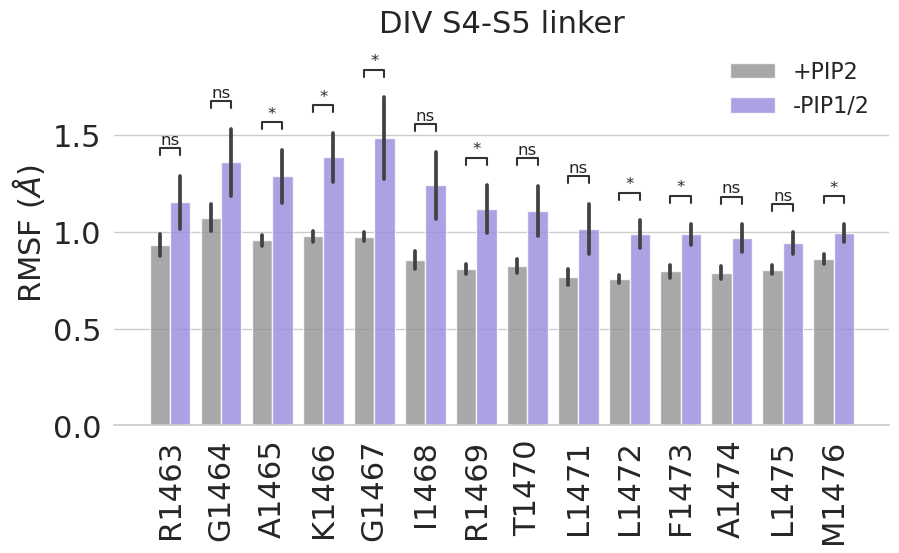

In [255]:
pal = [
#     "#7EEAC4", 
    "#929292",
    "#8E7EEA",
]
plot_rmsf_signif(datBA, 987, 1002, "DIV S4-S5 linker", sig=False, pip='PIP2', pal=pal)
# plt.ylim(0, 1.7)
# plt.savefig('s4-s5_rmsf_sig.png', dpi=500, bbox_inches='tight')

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

L1472_+PIP1 vs. L1472_-PIP1/2: t-test independent samples, P_val:2.779e-01 t=-1.164e+00
F1473_+PIP1 vs. F1473_-PIP1/2: t-test independent samples, P_val:5.230e-01 t=-6.679e-01
A1474_+PIP1 vs. A1474_-PIP1/2: t-test independent samples, P_val:1.744e-01 t=-1.490e+00
L1475_+PIP1 vs. L1475_-PIP1/2: t-test independent samples, P_val:9.994e-02 t=-1.860e+00
M1476_+PIP1 vs. M1476_-PIP1/2: t-test independent samples, P_val:1.078e-01 t=-1.811e+00
L1471_+PIP1 vs. L1471_-PIP1/2: t-test independent samples, P_val:1.383e-01 t=-1.646e+00
G1464_+PIP1 vs. G1464_-PIP1/2: t-test independent samples, P_val:3.416e-01 t=-1.011e+00
R1463_+PIP1 vs. R1463_-PIP1/2: t-test independent samples, P_val:5.335e-01 t=-6.507e-01
A1465_+PIP1 vs. A1465_-PIP1/2: t-test independent samples, P_val:1.590e-01 t=-1.553e+00
K1466_+PIP1 vs. K1466_-PIP1

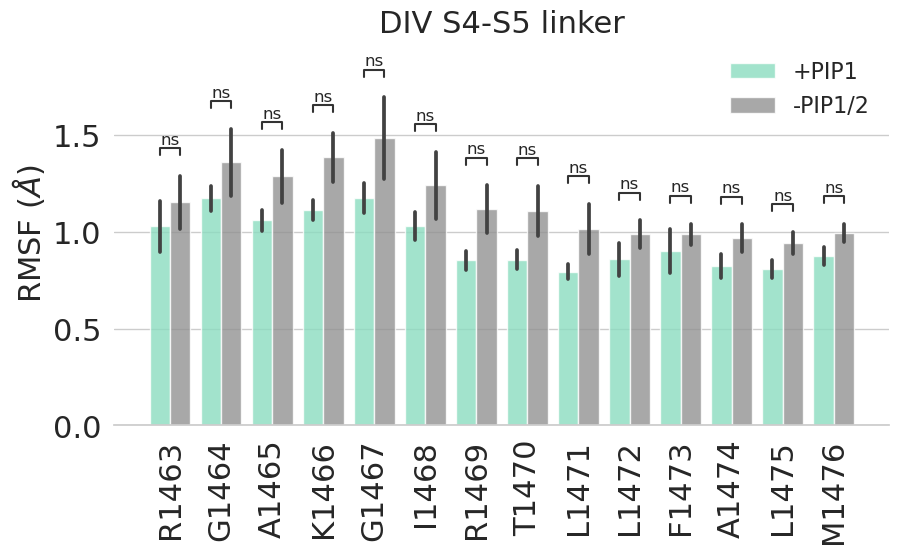

In [254]:
pal = ["#7EEAC4", 
       "#929292",
      ]
plot_rmsf_signif(datBE, 987, 1002, "DIV S4-S5 linker", sig=False, pip='PIP1', pal=pal)
# plt.ylim(0, 1.7)
# plt.savefig('s4-s5_rmsf_sig.png', dpi=500, bbox_inches='tight')

In [197]:
dat.RESID

0        V119
1        V120
2        R121
3        R122
4        G123
        ...  
1125    F1601
1126    N1602
1127    V1603
1128    A1604
1129    T1605
Name: RESID, Length: 11300, dtype: object

## +PIP1

In [251]:
#dat = dfrmsf[(dfrmsf.new_num > 845) & (dfrmsf.new_num < 870)]

datBE = rmsf2df_allres_E(250)

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(group), dtype=np.bool)


In [218]:
pal = ["#7EEAC4", 
       "#929292",
       
      ]

In [101]:
datBE

RES  og_num RES1  new_num RESshort  RESID                  color  \
0     VAL     119  VAL        1        V   V119  (0.996, 0.797, 0.598)   
1     VAL     120  VAL        2        V   V120  (0.996, 0.797, 0.598)   
2     ARG     121  ARG        3        R   R121  (0.996, 0.398, 0.797)   
3     ARG     122  ARG        4        R   R122  (0.996, 0.398, 0.797)   
4     GLY     123  GLY        5        G   G123  (0.996, 0.797, 0.598)   
...   ...     ...  ...      ...      ...    ...                    ...   
1125  PHE    1601  PHE     1126        F  F1601  (0.598, 0.996, 0.598)   
1126  ASN    1602  ASN     1127        N  N1602  (0.797, 0.797, 0.996)   
1127  VAL    1603  VAL     1128        V  V1603  (0.996, 0.797, 0.598)   
1128  ALA    1604  ALA     1129        A  A1604  (0.996, 0.797, 0.598)   
1129  THR    1605  THR     1130        T  T1605  (0.797, 0.797, 0.996)   

          rmsf    rep      PIP  
0     5.627583  repa1    +PIP1  
1     5.175174  repa1    +PIP1  
2     4.916669  repa1    +PIP1  
3     5.057755  repa1    +PIP1  
4     4.968124  repa1    +PIP1  
...        ...    ...      ...  
1125  1.519246  repb5  -PIP1/2  
1126  2.840220  repb5  -PIP1/2  
1127  5.305798  repb5  -PIP1/2  
1128  6.668315  repb5  -PIP1/2  
1129  7.968555  repb5  -PIP1/2  

[11300 rows x 10 columns]

ValueError: min() arg is an empty sequence

/home/elaine/anaconda3/lib/python3.8/site-packages/matplotlib/_tight_bbox.py:67: RuntimeWarning: divide by zero encountered in double_scalars
  fig.patch.set_bounds(x0 / w1, y0 / h1,
/home/elaine/anaconda3/lib/python3.8/site-packages/matplotlib/_tight_bbox.py:68: RuntimeWarning: divide by zero encountered in double_scalars
  fig.bbox.width / w1, fig.bbox.height / h1)
/home/elaine/anaconda3/lib/python3.8/site-packages/matplotlib/patches.py:736: RuntimeWarning: invalid value encountered in double_scalars
  x1 = self.convert_xunits(self._x0 + self._width)
/home/elaine/anaconda3/lib/python3.8/site-packages/matplotlib/transforms.py:2046: RuntimeWarning: invalid value encountered in double_scalars
  self._mtx[0, 2] += tx


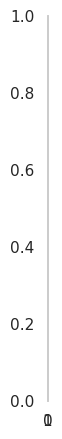

In [252]:
plot_rmsf(datBE, 830, 866, "DIII-IV linker", sig=True, pip='PIP1')
# plt.legend().remove()
# plt.ylim(0, 1.7)

# plt.savefig('d3-4_rmsf_sig.png', dpi=500, bbox_inches='tight')

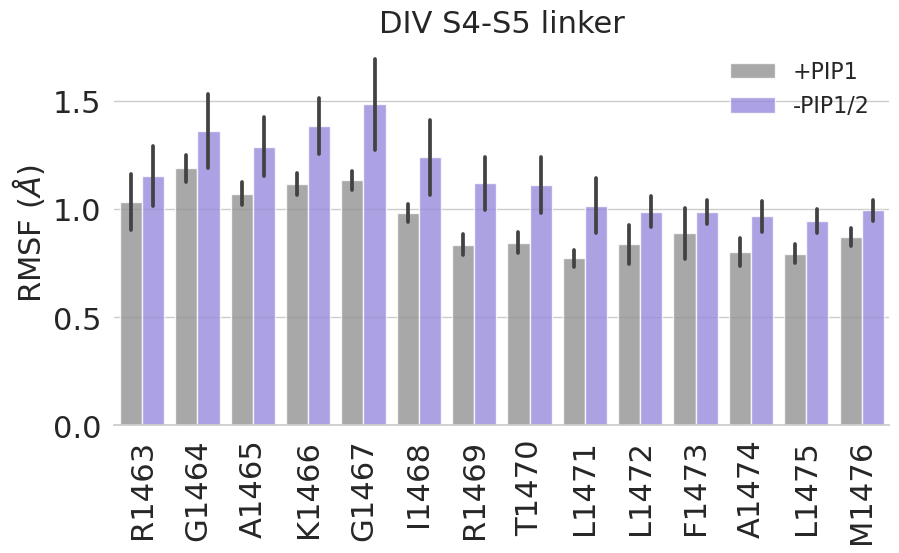

In [171]:
plot_rmsf(datBE, 987, 1002, "DIV S4-S5 linker", sig=False, pip='PIP1')
# plt.ylim(0, 1.7)
# plt.savefig('s4-s5_rmsf_sig.png', dpi=500, bbox_inches='tight')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04



ValueError: box_pairs contains an invalid box pair.

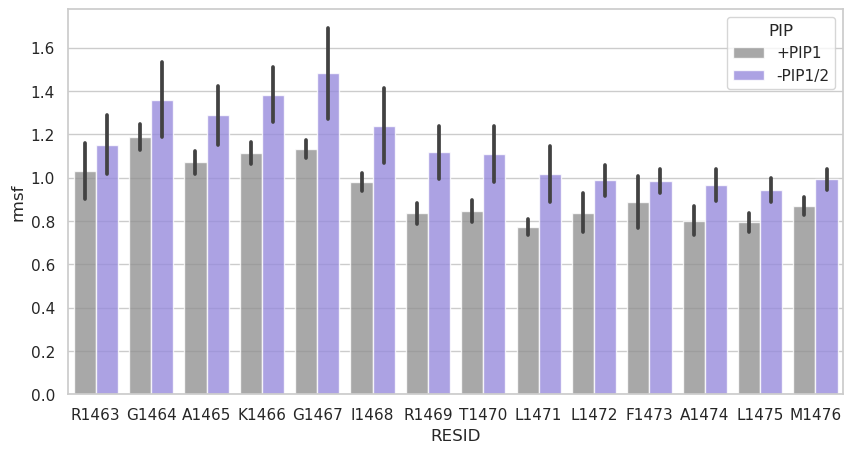

In [175]:
plot_rmsf_signif(datBE, 987, 1002, "DIV S4-S5 linker", sig=False, pip='PIP1')
# plt.ylim(0, 1.7)
# plt.savefig('s4-s5_rmsf_sig.png', dpi=500, bbox_inches='tight')

ValueError: min() arg is an empty sequence

/home/elaine/anaconda3/lib/python3.8/site-packages/matplotlib/_tight_bbox.py:67: RuntimeWarning: divide by zero encountered in double_scalars
  fig.patch.set_bounds(x0 / w1, y0 / h1,
/home/elaine/anaconda3/lib/python3.8/site-packages/matplotlib/_tight_bbox.py:68: RuntimeWarning: divide by zero encountered in double_scalars
  fig.bbox.width / w1, fig.bbox.height / h1)
/home/elaine/anaconda3/lib/python3.8/site-packages/matplotlib/patches.py:736: RuntimeWarning: invalid value encountered in double_scalars
  x1 = self.convert_xunits(self._x0 + self._width)
/home/elaine/anaconda3/lib/python3.8/site-packages/matplotlib/transforms.py:2046: RuntimeWarning: invalid value encountered in double_scalars
  self._mtx[0, 2] += tx


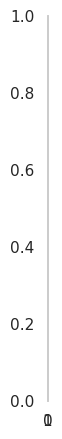

In [119]:
plot_rmsf(datBE, 830, 866, "DIII-IV linker", sig=True, pip='PIP1')
# plt.legend().remove()
# plt.ylim(0, 1.7)

# plt.savefig('d3-4_rmsf_sig.png', dpi=500, bbox_inches='tight')

ValueError: min() arg is an empty sequence

/home/elaine/anaconda3/lib/python3.8/site-packages/matplotlib/_tight_bbox.py:67: RuntimeWarning: divide by zero encountered in double_scalars
  fig.patch.set_bounds(x0 / w1, y0 / h1,
/home/elaine/anaconda3/lib/python3.8/site-packages/matplotlib/_tight_bbox.py:68: RuntimeWarning: divide by zero encountered in double_scalars
  fig.bbox.width / w1, fig.bbox.height / h1)
/home/elaine/anaconda3/lib/python3.8/site-packages/matplotlib/patches.py:736: RuntimeWarning: invalid value encountered in double_scalars
  x1 = self.convert_xunits(self._x0 + self._width)
/home/elaine/anaconda3/lib/python3.8/site-packages/matplotlib/transforms.py:2046: RuntimeWarning: invalid value encountered in double_scalars
  self._mtx[0, 2] += tx


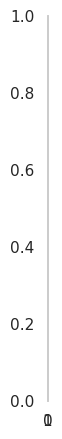

In [253]:
plot_rmsf(datBE, 987, 1002, "DIV S4-S5 linker", sig=True, pip='PIP1')
plt.ylim(0, 1.7)
plt.savefig('s4-s5_rmsf_sig_PIP1.png', dpi=500, bbox_inches='tight')

In [122]:
dat = datBE 
t=[]
for i in np.unique(dat['og_num']):
#     if vdf[vdf['PIP']=='+PIP2']['rmsf'].mean() < vdf[vdf['PIP']=='-PIP2']['rmsf'].mean():
    vdf = dat[dat['og_num']==i]
    t.append(ttest_ind(vdf[vdf['PIP']=='+PIP1']['rmsf'], vdf[vdf['PIP']=='-PIP1/2']['rmsf'])[1])
    
df=pd.DataFrame(t,index=np.unique(dat['og_num']), columns=['stat'])
' '.join(list(df[df['stat']<0.05].index.astype(str)))
# sig = list(df[df['stat']<0.05].index.astype(int))

'249 250 251 252 253 255 1393 1394 1395 1396 1397 1398 1400 1414 1415 1416 1417 1418 1419 1420 1421 1422 1423 1424 1434'

## +PIP2

In [104]:
datBA = rmsf2df_allres(250)

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(group), dtype=np.bool)


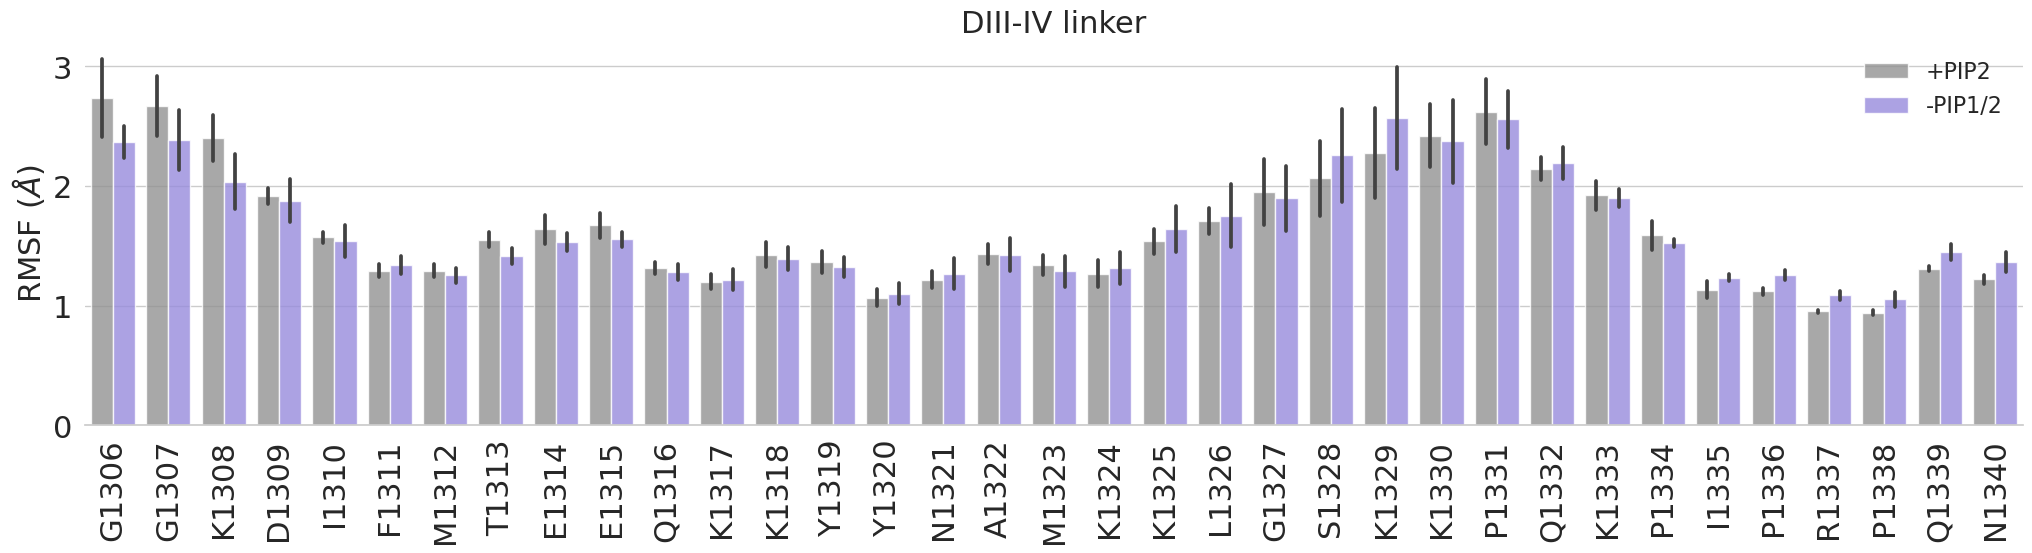

In [260]:
plot_rmsf(datBA, 830, 866, "DIII-IV linker", sig=False, pal=pal)
# plt.legend().remove()
# plt.ylim(0, 3.2)

In [145]:
datBA[datBA['PIP']=='+PIP2']

RES  og_num RES1  new_num RESshort  RESID                  color  \
0     VAL     119  VAL        1        V   V119  (0.996, 0.797, 0.598)   
1     VAL     120  VAL        2        V   V120  (0.996, 0.797, 0.598)   
2     ARG     121  ARG        3        R   R121  (0.996, 0.398, 0.797)   
3     ARG     122  ARG        4        R   R122  (0.996, 0.398, 0.797)   
4     GLY     123  GLY        5        G   G123  (0.996, 0.797, 0.598)   
...   ...     ...  ...      ...      ...    ...                    ...   
1125  PHE    1601  PHE     1126        F  F1601  (0.598, 0.996, 0.598)   
1126  ASN    1602  ASN     1127        N  N1602  (0.797, 0.797, 0.996)   
1127  VAL    1603  VAL     1128        V  V1603  (0.996, 0.797, 0.598)   
1128  ALA    1604  ALA     1129        A  A1604  (0.996, 0.797, 0.598)   
1129  THR    1605  THR     1130        T  T1605  (0.797, 0.797, 0.996)   

          rmsf    rep    PIP  
0     4.825888  repa1  +PIP2  
1     4.190134  repa1  +PIP2  
2     4.051656  repa1  +PIP2  
3     4.098681  repa1  +PIP2  
4     4.087223  repa1  +PIP2  
...        ...    ...    ...  
1125  1.070445  repa5  +PIP2  
1126  1.146783  repa5  +PIP2  
1127  1.291319  repa5  +PIP2  
1128  1.819098  repa5  +PIP2  
1129  2.550674  repa5  +PIP2  

[5650 rows x 10 columns]

In [241]:
sns.set(font_scale=2.9)


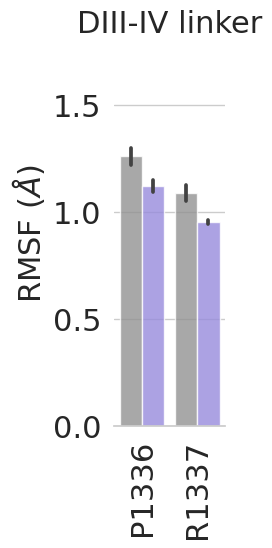

In [239]:
pal = [
#     "#7EEAC4", 
    "#929292",
    "#8E7EEA",
]
plot_rmsf(pd.concat([datBA[datBA['PIP']=='-PIP1/2'], datBA[datBA['PIP']=='+PIP2']], axis=0), 830, 866, "DIII-IV linker", sig=True, pal=pal)
plt.legend().remove()
plt.ylim(0, 1.8)

plt.savefig('d3-4_rmsf_sig.png', dpi=500, bbox_inches='tight')

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

R1337_-PIP1/2 vs. R1337_+PIP2: t-test independent samples, P_val:1.011e-02 t=3.348e+00
P1336_-PIP1/2 vs. P1336_+PIP2: t-test independent samples, P_val:2.400e-02 t=2.778e+00
[[('P1336', '-PIP1/2'), ('P1336', '+PIP2')], [('R1337', '-PIP1/2'), ('R1337', '+PIP2')]]


(0.0, 1.8)

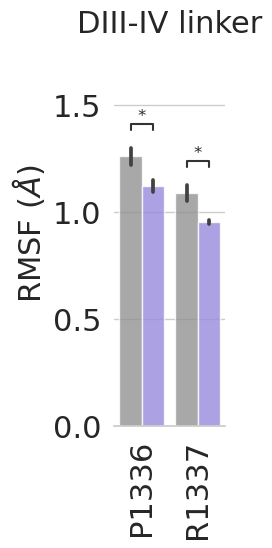

In [265]:
pal = [
#     "#7EEAC4", 
    "#929292",
    "#8E7EEA",
]
sns.set(font_scale=1.8)
sns.set_theme(style="whitegrid")
plot_rmsf_signif(pd.concat([datBA[datBA['PIP']=='-PIP1/2'], datBA[datBA['PIP']=='+PIP2']], axis=0), 860, 863, "DIII-IV linker", sig=True, pal=pal)
plt.legend().remove()
plt.ylim(0, 1.8)

# plt.savefig('d3-4_rmsf_sig.png', dpi=500, bbox_inches='tight')

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

L1472_-PIP1/2 vs. L1472_+PIP2: t-test independent samples, P_val:1.501e-02 t=3.085e+00
F1473_-PIP1/2 vs. F1473_+PIP2: t-test independent samples, P_val:1.914e-02 t=2.925e+00
A1474_-PIP1/2 vs. A1474_+PIP2: t-test independent samples, P_val:5.666e-02 t=2.226e+00
L1475_-PIP1/2 vs. L1475_+PIP2: t-test independent samples, P_val:5.338e-02 t=2.264e+00
M1476_-PIP1/2 vs. M1476_+PIP2: t-test independent samples, P_val:4.029e-02 t=2.444e+00
L1471_-PIP1/2 vs. L1471_+PIP2: t-test independent samples, P_val:1.028e-01 t=1.842e+00
G1464_-PIP1/2 vs. G1464_+PIP2: t-test independent samples, P_val:1.641e-01 t=1.532e+00
R1463_-PIP1/2 vs. R1463_+PIP2: t-test independent samples, P_val:1.778e-01 t=1.478e+00
A1465_-PIP1/2 vs. A1465_+PIP2: t-test independent samples, P_val:4.557e-02 t=2.365e+00
K1466_-PIP1/2 vs. K1466_+PIP2: t-tes

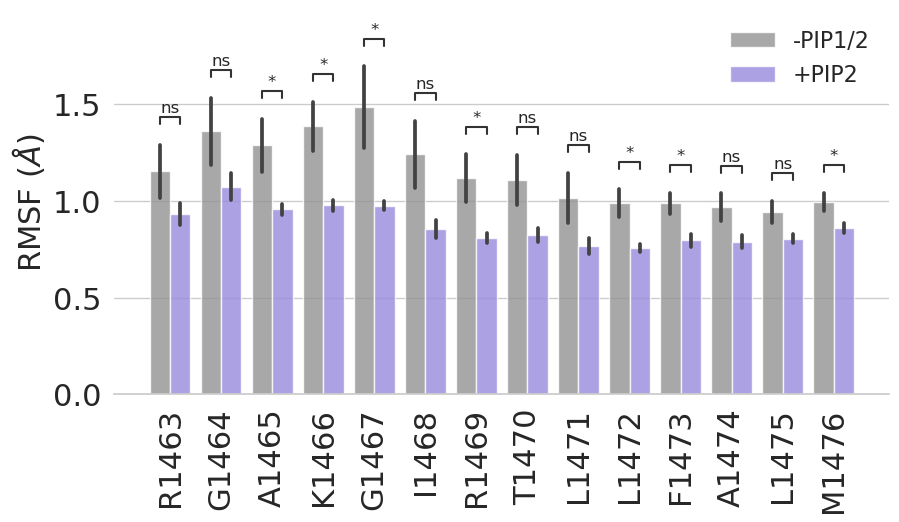

In [264]:
pal = [
#     "#7EEAC4", 
    "#929292",
    "#8E7EEA",
]
sns.set(font_scale=1.8)
sns.set_theme(style="whitegrid")
plot_rmsf_signif(pd.concat([datBA[datBA['PIP']=='-PIP1/2'], datBA[datBA['PIP']=='+PIP2']], axis=0),  987, 1002, "", sig=True, pal=pal)
# plt.legend().remove()
# plt.ylim(0, 1.8)

# plt.savefig('d3-4_rmsf_sig.png', dpi=500, bbox_inches='tight')

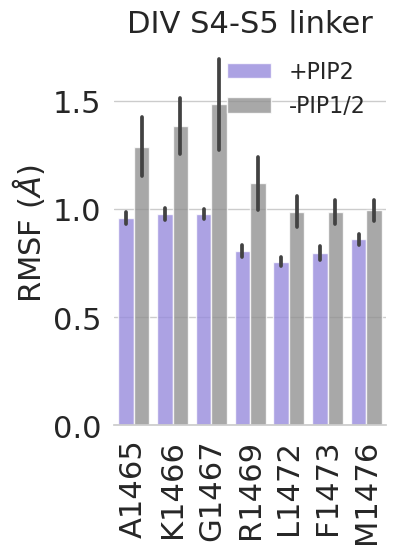

In [128]:
plot_rmsf(datBA, 987, 1002, "DIV S4-S5 linker", sig=True, pal=pal)
# plt.ylim(0, 3.2)

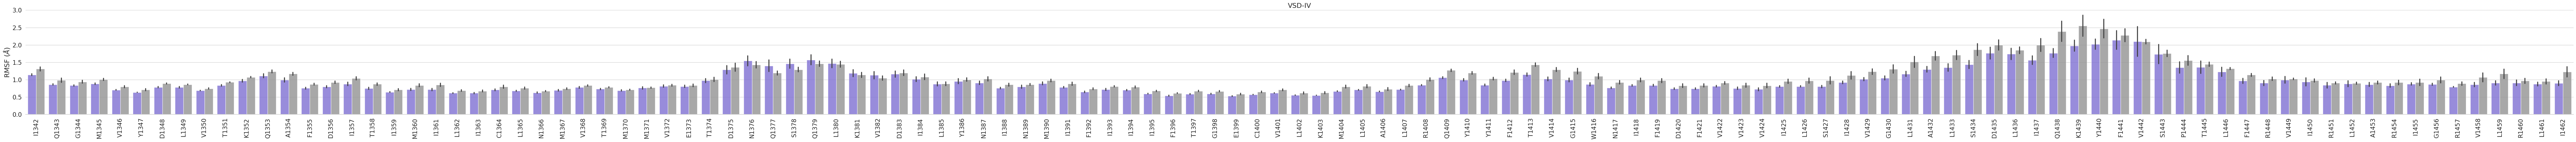

In [160]:
plot_rmsf(dat, 866, 988, "VSD-IV", sig=False)
plt.legend().remove()
# plt.ylim(0, 1.7)

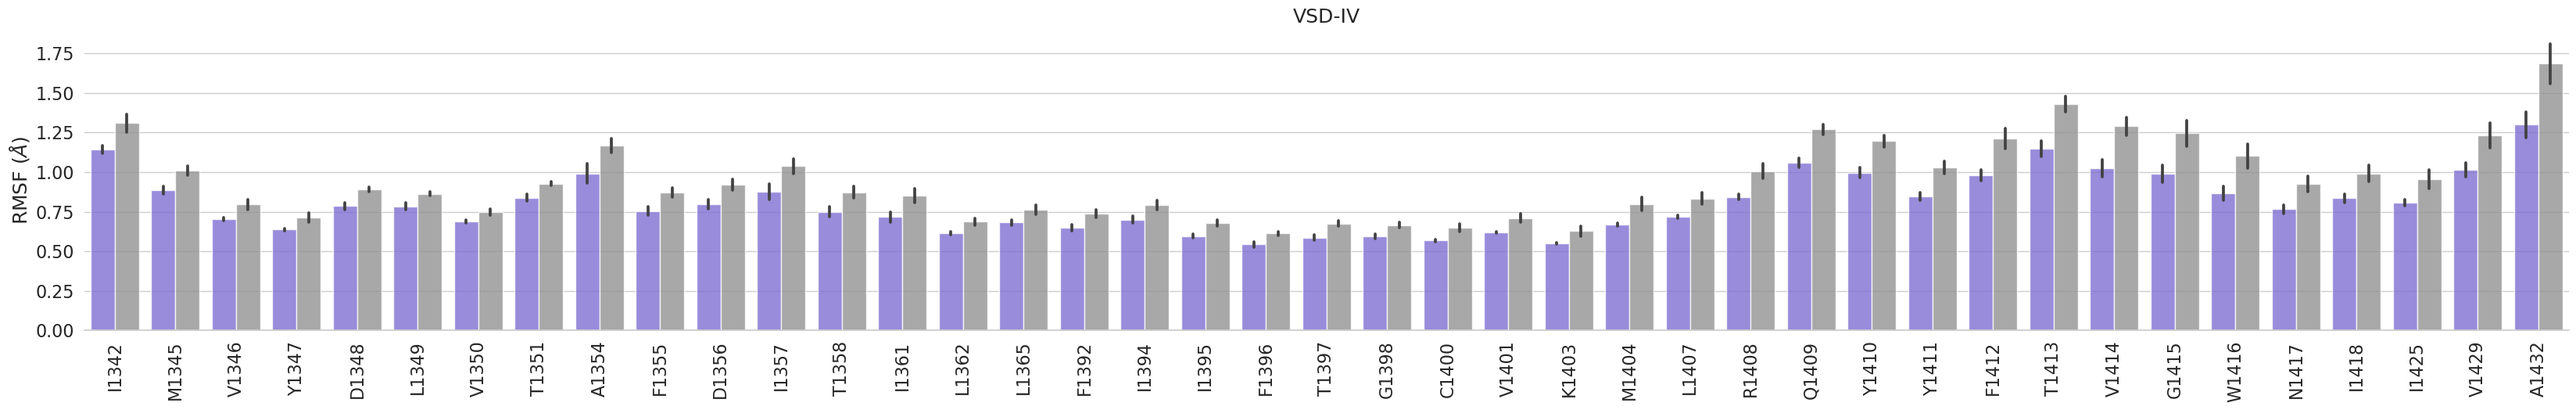

In [161]:
plot_rmsf(dat, 866, 988, "VSD-IV", sig=True)
plt.legend().remove()
# plt.ylim(0, 1.7)

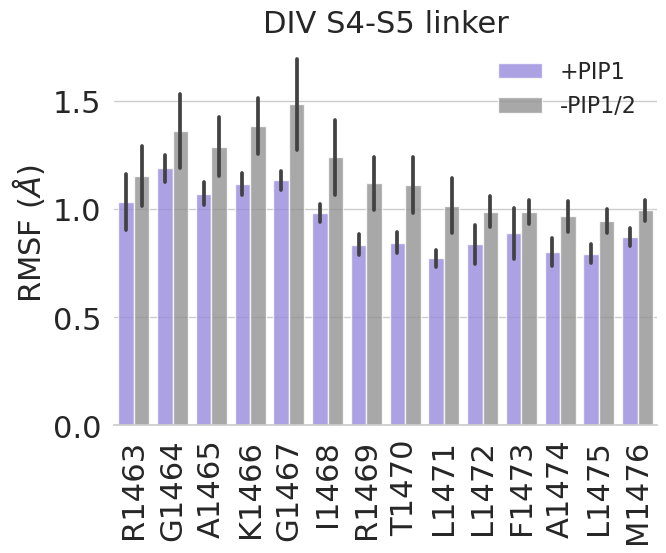

In [126]:
plot_rmsf(dat, 987, 1002, "DIV S4-S5 linker", sig=False, pal=pal)
# plt.ylim(0, 3.2)

## combined - SUPP FIGS

In [94]:
dfrmsf_combined = pd.concat([datBA, datBE[datBE['PIP']=='+PIP1']], axis=0)
dfrmsf_combined

RES  og_num RES1  new_num RESshort  RESID                  color  \
0     VAL     119  VAL        1        V   V119  (0.996, 0.797, 0.598)   
1     VAL     120  VAL        2        V   V120  (0.996, 0.797, 0.598)   
2     ARG     121  ARG        3        R   R121  (0.996, 0.398, 0.797)   
3     ARG     122  ARG        4        R   R122  (0.996, 0.398, 0.797)   
4     GLY     123  GLY        5        G   G123  (0.996, 0.797, 0.598)   
...   ...     ...  ...      ...      ...    ...                    ...   
1125  PHE    1601  PHE     1126        F  F1601  (0.598, 0.996, 0.598)   
1126  ASN    1602  ASN     1127        N  N1602  (0.797, 0.797, 0.996)   
1127  VAL    1603  VAL     1128        V  V1603  (0.996, 0.797, 0.598)   
1128  ALA    1604  ALA     1129        A  A1604  (0.996, 0.797, 0.598)   
1129  THR    1605  THR     1130        T  T1605  (0.797, 0.797, 0.996)   

          rmsf    rep    PIP  
0     4.825888  repa1  +PIP2  
1     4.190134  repa1  +PIP2  
2     4.051656  repa1  +PIP2  
3     4.098681  repa1  +PIP2  
4     4.087223  repa1  +PIP2  
...        ...    ...    ...  
1125  1.150247  repa5  +PIP1  
1126  1.378241  repa5  +PIP1  
1127  1.603425  repa5  +PIP1  
1128  1.870962  repa5  +PIP1  
1129  2.895488  repa5  +PIP1  

[16950 rows x 10 columns]

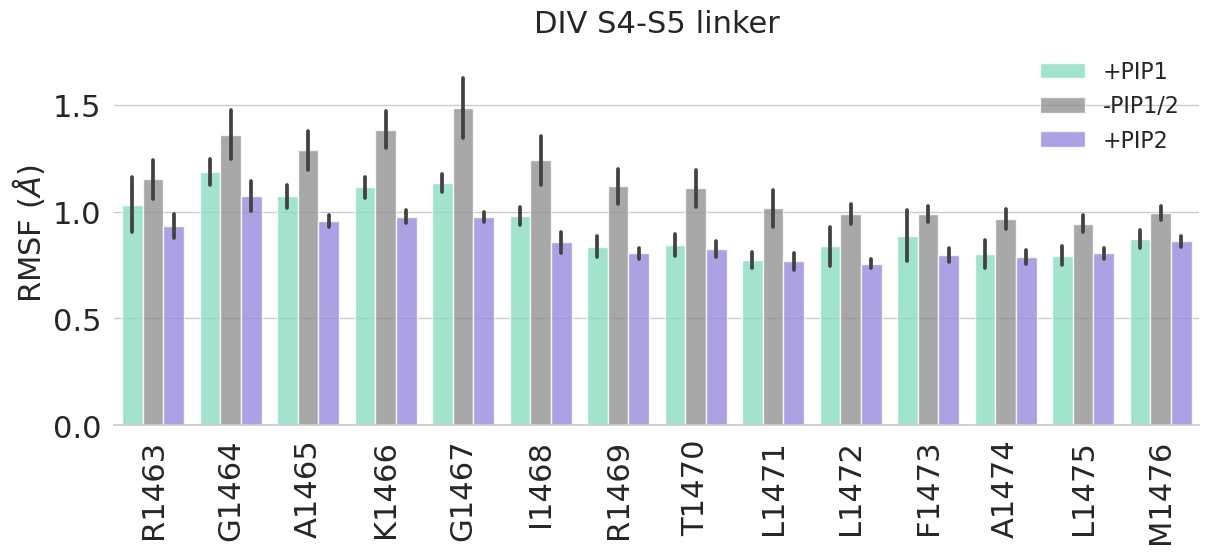

In [136]:
pal = [
    "#7EEAC4", 
    "#929292",
    "#8E7EEA"
]
plot_rmsf(pd.concat([datBE, datBA], axis=0), 987, 1002, "DIV S4-S5 linker", sig=False, pal=pal)

plt.ylim(0,1.8)

plt.savefig('s4s5_combinedpips_rmsf_sig.png', dpi=500, bbox_inches='tight')

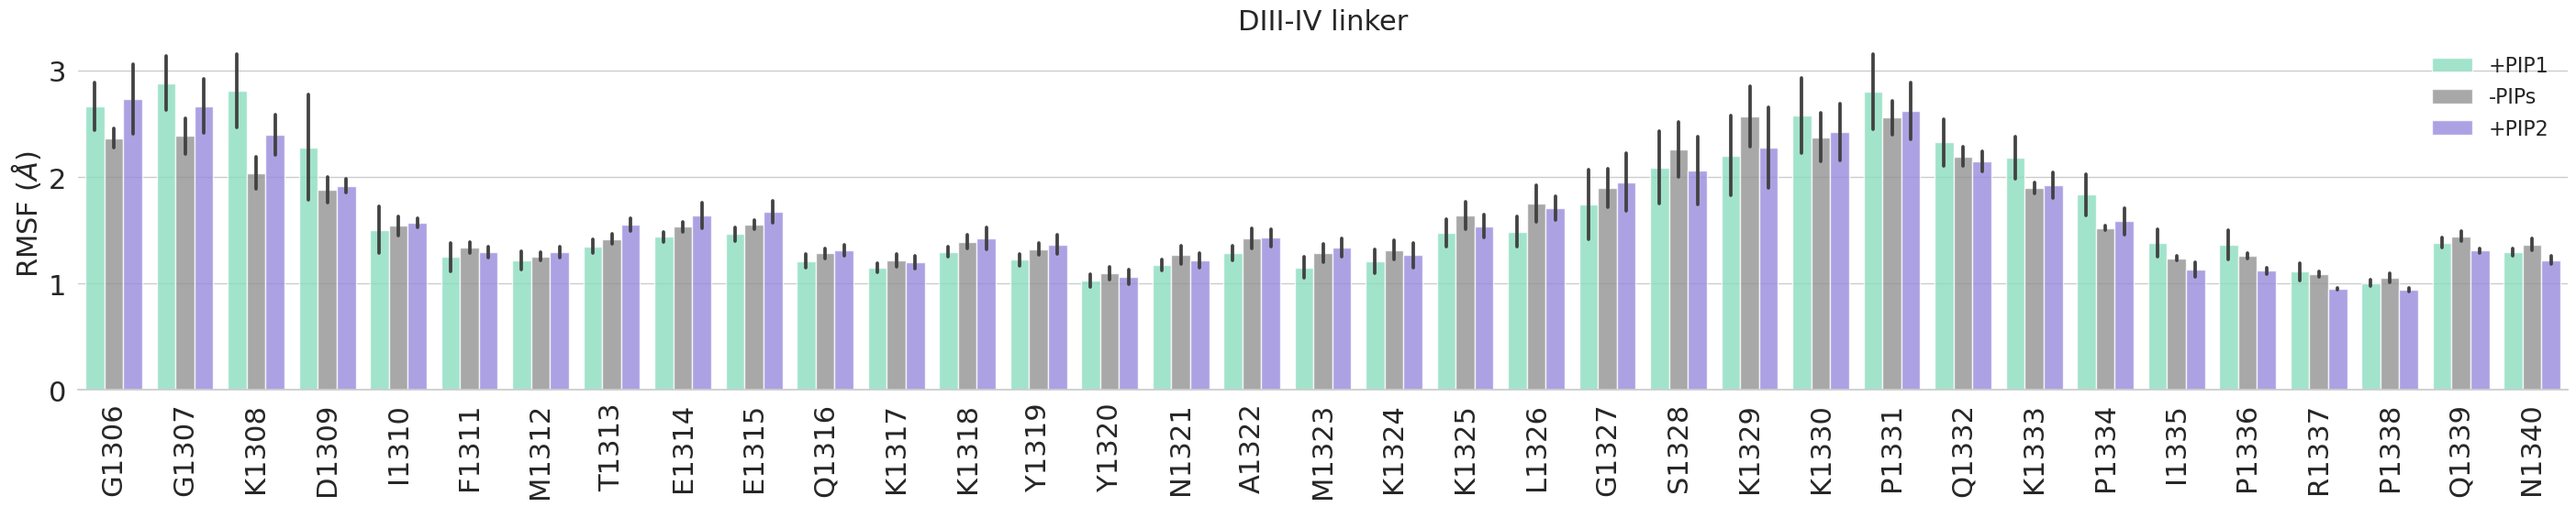

In [88]:
pal = [
    "#7EEAC4", 
    "#929292",
    "#8E7EEA"
]
plot_rmsf(pd.concat([datBE, datBA], axis=0), 830, 866, "DIII-IV linker", sig=False, pal=pal)

plt.savefig('d3-4_combinedpips_rmsf_sig.png', dpi=500, bbox_inches='tight')

In [67]:
vdf[vdf['PIP']=='+PIP2']['rmsf'].mean() - vdf[vdf['PIP']=='-PIP2']['rmsf'].mean()

1.4154025171329416

In [68]:
# ttest_ind(vdf[vdf['PIP']=='+PIP2']['rmsf'])
vdf[vdf['PIP']=='+PIP2']['rmsf'] 

1129    4.693939
1129    5.026491
1129    2.882831
Name: rmsf, dtype: float64

In [167]:
t=[]
for i in np.unique(dat['og_num']):
#     if vdf[vdf['PIP']=='+PIP2']['rmsf'].mean() < vdf[vdf['PIP']=='-PIP2']['rmsf'].mean():
    vdf = dat[dat['og_num']==i]
    t.append(ttest_ind(vdf[vdf['PIP']=='+PIP2']['rmsf'], vdf[vdf['PIP']=='-PIP2']['rmsf'])[1])
    
df=pd.DataFrame(t,index=np.unique(dat['og_num']), columns=['stat'])
' '.join(list(df[df['stat']<0.05].index.astype(str)))
# sig = list(df[df['stat']<0.05].index.astype(int))

'237 238 241 242 245 246 247 248 249 250 251 252 253 254 255 256 257 384 405 406 407 409 410 441 442 445 448 563 564 565 566 567 568 569 570 571 572 573 574 575 576 577 578 579 580 581 583 584 586 587 588 590 591 592 593 594 595 596 597 598 599 600 601 602 603 604 605 606 607 608 609 610 611 612 613 614 615 616 617 618 619 620 621 622 623 624 625 626 627 628 629 630 631 632 633 634 635 636 637 638 639 640 641 642 643 644 645 646 647 648 649 650 651 652 653 654 655 657 658 659 672 674 675 676 677 678 679 690 693 694 702 707 708 709 710 711 712 713 714 715 716 717 718 719 743 744 745 746 747 748 749 750 751 752 753 754 755 756 757 765 783 784 1177 1178 1179 1180 1181 1182 1183 1184 1185 1186 1187 1188 1189 1203 1204 1205 1206 1207 1219 1220 1221 1222 1223 1226 1227 1228 1229 1230 1233 1236 1237 1239 1240 1241 1242 1243 1244 1245 1246 1247 1248 1249 1250 1251 1252 1253 1254 1255 1256 1257 1267 1268 1269 1270 1271 1272 1273 1274 1275 1276 1277 1278 1279 1280 1281 1336 1337 1342 1345 1346 1

In [70]:
dfrmsf[dfrmsf["og_num"].isin(list(df[df['stat']<0.05].index))]

NameError: name 'dfrmsf' is not defined

In [71]:
dat 

RES  og_num RES1  new_num RESshort  RESID                  color  \
0     VAL     119  VAL        1        V   V119  (0.996, 0.797, 0.598)   
1     VAL     120  VAL        2        V   V120  (0.996, 0.797, 0.598)   
2     ARG     121  ARG        3        R   R121  (0.996, 0.398, 0.797)   
3     ARG     122  ARG        4        R   R122  (0.996, 0.398, 0.797)   
4     GLY     123  GLY        5        G   G123  (0.996, 0.797, 0.598)   
...   ...     ...  ...      ...      ...    ...                    ...   
1125  PHE    1601  PHE     1126        F  F1601  (0.598, 0.996, 0.598)   
1126  ASN    1602  ASN     1127        N  N1602  (0.797, 0.797, 0.996)   
1127  VAL    1603  VAL     1128        V  V1603  (0.996, 0.797, 0.598)   
1128  ALA    1604  ALA     1129        A  A1604  (0.996, 0.797, 0.598)   
1129  THR    1605  THR     1130        T  T1605  (0.797, 0.797, 0.996)   

          rmsf    rep    PIP  
0     5.689052  repa2  +PIP2  
1     5.373329  repa2  +PIP2  
2     5.190283  repa2  +PIP2  
3     5.288359  repa2  +PIP2  
4     5.186468  repa2  +PIP2  
...        ...    ...    ...  
1125  1.764411  repb4  -PIP2  
1126  1.975986  repb4  -PIP2  
1127  2.212553  repb4  -PIP2  
1128  3.209960  repb4  -PIP2  
1129  4.312075  repb4  -PIP2  

[6780 rows x 10 columns]

In [101]:
beep=dat[dat["og_num"].isin(list(df[df['stat']<0.05].index))]
fig, ax = plt.subplots(figsize=(len(beep)/12, 5))
sns.barplot(
    data=beep, #[beep['og_num']>1320], #kind="bar",
    x="RESID", y="rmsf", ax=ax, hue="PIP",
    alpha=.8, palette=pal, ci=68 #errorbar='se'
)
sns.despine(left=True)
plt.xlabel('DIII-IV linker Residue', fontsize=18)
plt.ylabel('RMSF ($\AA$)', fontsize=18)
plt.title('RMSF over DIII-IV linker in absence/presence of PIP2', fontsize=18)
plt.legend(loc="upper right", ncol=3, columnspacing=0.4, frameon=False, fontsize=16)
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
ax.tick_params(axis='both', labelsize=16)  # Set the tick label size
ax.set_xlabel('Category', fontsize=18)  # Set the x-axis label size
ax.set_ylabel('Value', fontsize=18)  # Set the y-axis label size
ax.set_title('Bar Plot with Larger Text', fontsize=18)  # Set the title size
for tl in ax.get_xticklabels():
    txt = tl.get_text()
#     print(txt, type(resnew.set_index('resname').loc[txt]['color']))
    if type(dat.set_index('RESID').loc[txt]['color']) == str:
        tl.set_backgroundcolor(dat.set_index('RESID').loc[txt]['color'])
    else:
        tl.set_backgroundcolor(dat.set_index('RESID').loc[txt]['color'].unique()[0])

NameError: name 'dat' is not defined

In [439]:
from scipy.stats import ttest_ind

vdf = dat[dat['og_num']==1330]
ttest_ind(vdf[vdf['PIP']=='+PIP2']['rmsf'], vdf[vdf['PIP']=='-PIP2']['rmsf'])

Ttest_indResult(statistic=nan, pvalue=nan)

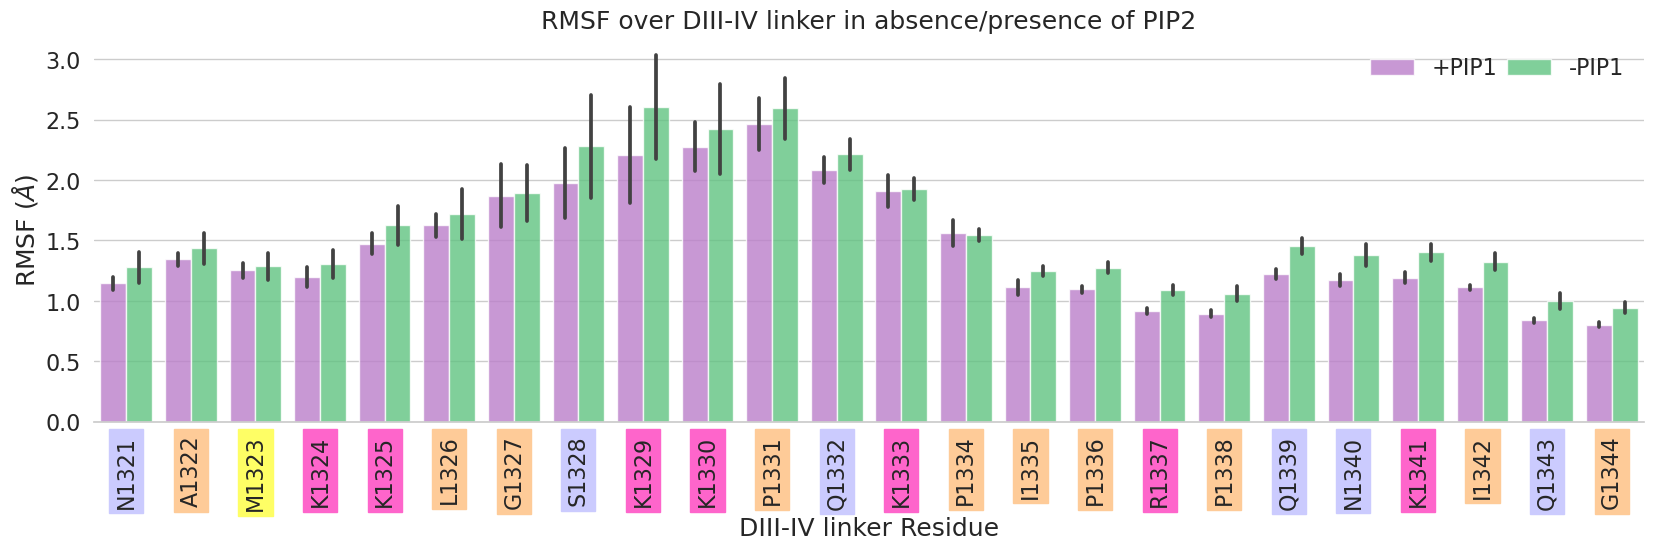

In [440]:
dat = dfrmsf[(dfrmsf.new_num > 845) & (dfrmsf.new_num < 870)]

sns.set(font_scale=1.7)
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(20, 5))

sns.barplot(
    data=dat, #kind="bar",
    x="RESID", y="rmsf", ax=ax, hue="PIP",
    alpha=.8, palette=pal, errorbar='se'
)
sns.despine(left=True)
plt.xlabel('DIII-IV linker Residue', fontsize=18)
plt.ylabel('RMSF ($\AA$)', fontsize=18)
plt.title('RMSF over DIII-IV linker in absence/presence of PIP2', fontsize=18)
plt.legend(loc="upper right", ncol=3, columnspacing=0.4, frameon=False, fontsize=16)
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
ax.tick_params(axis='both', labelsize=16)  # Set the tick label size
# ax.set_xlabel('Category', fontsize=18)  # Set the x-axis label size
# ax.set_ylabel('Value', fontsize=18)  # Set the y-axis label size
# ax.set_title('Bar Plot with Larger Text', fontsize=18)  # Set the title size
for tl in ax.get_xticklabels():
    txt = tl.get_text()
#     print(txt, type(resnew.set_index('resname').loc[txt]['color']))
    if type(dat.set_index('RESID').loc[txt]['color']) == str:
        tl.set_backgroundcolor(dat.set_index('RESID').loc[txt]['color'])
    else:
        tl.set_backgroundcolor(dat.set_index('RESID').loc[txt]['color'].unique()[0])
        
# plt.savefig(pipdir + 'rmsf_combined_IFM.png', dpi=500)

In [58]:
dat = dfrmsf[(dfrmsf.new_num > 854) & (dfrmsf.new_num < 863)]

In [445]:


vdf = dat[dat['og_num']==1464]
ttest_ind(vdf[vdf['PIP']=='+PIP2']['rmsf'], vdf[vdf['PIP']=='-PIP2']['rmsf'])

Ttest_indResult(statistic=nan, pvalue=nan)

/tmp/ipykernel_3016572/1962461324.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(


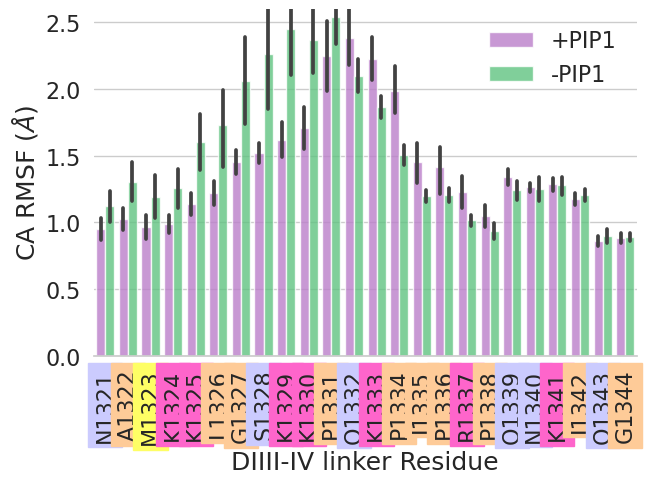

In [206]:
sns.set(font_scale=1.2)
sns.set_theme(style="whitegrid")
# pal = ['#4A5ACD', '#8A7ACD']

fig, ax = plt.subplots(figsize=(7, 4.5))

sns.barplot(
    data=dat, #kind="bar",
    x="RESID", y="rmsf", ax=ax, hue="PIP",
    alpha=.8, palette=pal, ci=68 
)
sns.despine(left=True)
plt.xlabel('DIIII-IV linker Residue', fontsize=18)
plt.ylabel('CA RMSF ($\AA$)', fontsize=18)
plt.ylim(0,2.6)
# plt.title('RMSF over DIV-S4/S4-5 linker in absence/presence of PIP2', fontsize=18)
plt.legend(loc="upper right", ncol=1, columnspacing=0.4, frameon=False, fontsize=16)
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
ax.tick_params(axis='both', labelsize=16)  # Set the tick label size
# ax.set_xlabel('Category', fontsize=18)  # Set the x-axis label size
# ax.set_ylabel('Value', fontsize=18)  # Set the y-axis label size
# ax.set_title('Bar Plot with Larger Text', fontsize=18)  # Set the title size
for tl in ax.get_xticklabels():
    txt = tl.get_text()
#     print(txt, type(resnew.set_index('resname').loc[txt]['color']))
    if type(dat.set_index('RESID').loc[txt]['color']) == str:
        tl.set_backgroundcolor(dat.set_index('RESID').loc[txt]['color'])
    else:
        tl.set_backgroundcolor(dat.set_index('RESID').loc[txt]['color'].unique()[0])
        
# plt.savefig(pipdir + 'rmsf_combined_VSD.png', dpi=500)

In [443]:
dat = dfrmsf[(dfrmsf.new_num > 969) & (dfrmsf.new_num < 995)]

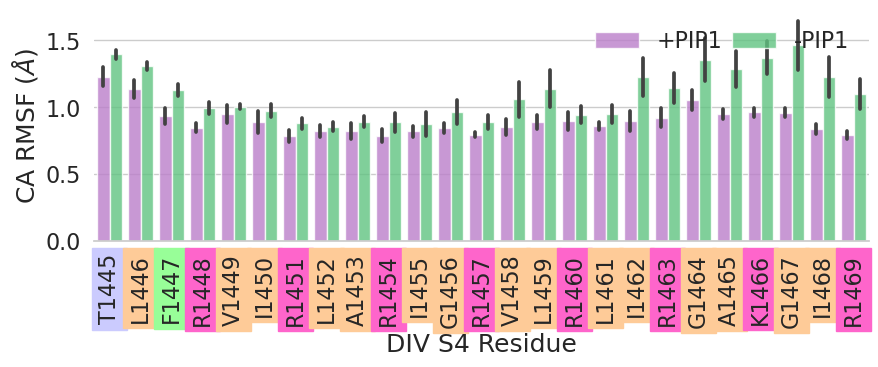

In [444]:
sns.set(font_scale=1.2)
sns.set_theme(style="whitegrid")
# pal = ['#4A5ACD', '#8A7ACD']

fig, ax = plt.subplots(figsize=(10, 3))

sns.barplot(
    data=dat, #kind="bar",
    x="RESID", y="rmsf", ax=ax, hue="PIP",
    alpha=.8, palette=pal, errorbar='se'
)
sns.despine(left=True)
plt.xlabel('DIV S4 Residue', fontsize=18)
plt.ylabel('CA RMSF ($\AA$)', fontsize=18)
# plt.title('RMSF over DIV-S4/S4-5 linker in absence/presence of PIP2', fontsize=18)
plt.legend(loc="upper right", ncol=3, columnspacing=0.4, frameon=False, fontsize=16)
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
ax.tick_params(axis='both', labelsize=16)  # Set the tick label size
# ax.set_xlabel('Category', fontsize=18)  # Set the x-axis label size
# ax.set_ylabel('Value', fontsize=18)  # Set the y-axis label size
# ax.set_title('Bar Plot with Larger Text', fontsize=18)  # Set the title size
for tl in ax.get_xticklabels():
    txt = tl.get_text()
#     print(txt, type(resnew.set_index('resname').loc[txt]['color']))
    if type(dat.set_index('RESID').loc[txt]['color']) == str:
        tl.set_backgroundcolor(dat.set_index('RESID').loc[txt]['color'])
    else:
        tl.set_backgroundcolor(dat.set_index('RESID').loc[txt]['color'].unique()[0])
        
# plt.savefig(pipdir + 'rmsf_combined_VSD.png', dpi=500)

In [209]:
c = dfrmsf[(dfrmsf.new_num > 968) & (dfrmsf.new_num < 991)]

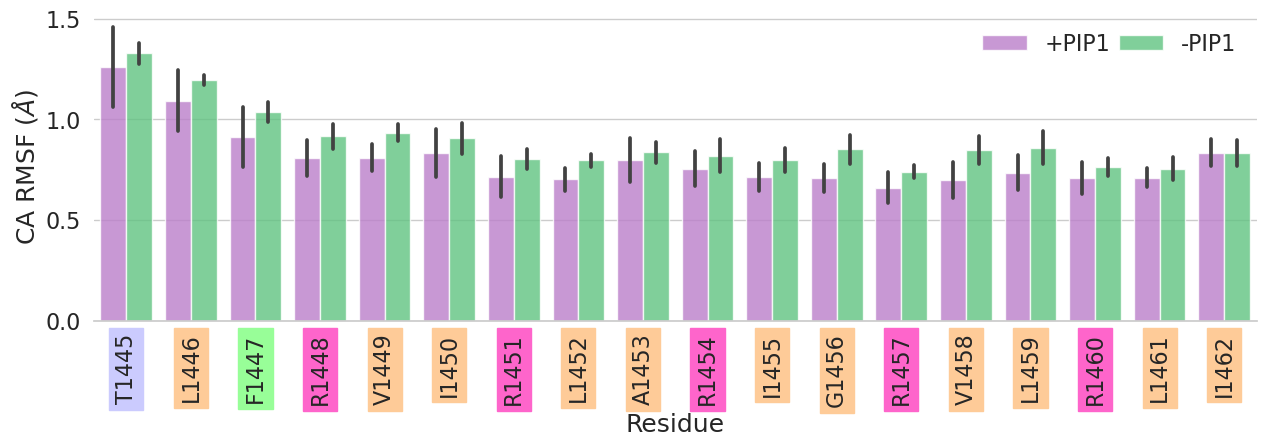

In [211]:
sns.set(font_scale=1.7)
sns.set_theme(style="whitegrid")
# pal = ['#4A5ACD', '#8A7ACD']

fig, ax = plt.subplots(figsize=(15, 4))

sns.barplot(
    data=dat, #kind="bar",
    x="RESID", y="rmsf", ax=ax, hue="PIP",
    alpha=.8, palette=pal, errorbar='se' 
)
sns.despine(left=True)
plt.xlabel('Residue', fontsize=18)
plt.ylabel('CA RMSF ($\AA$)', fontsize=18)
# plt.title('RMSF over DIV-S4/S4-5 linker in absence/presence of PIP2', fontsize=18)
plt.legend(loc="upper right", ncol=3, columnspacing=0.4, frameon=False, fontsize=16)
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
ax.tick_params(axis='both', labelsize=16)  # Set the tick label size
# ax.set_xlabel('Category', fontsize=18)  # Set the x-axis label size
# ax.set_ylabel('Value', fontsize=18)  # Set the y-axis label size
# ax.set_title('Bar Plot with Larger Text', fontsize=18)  # Set the title size
for tl in ax.get_xticklabels():
    txt = tl.get_text()
#     print(txt, type(resnew.set_index('resname').loc[txt]['color']))
    if type(dat.set_index('RESID').loc[txt]['color']) == str:
        tl.set_backgroundcolor(dat.set_index('RESID').loc[txt]['color'])
    else:
        tl.set_backgroundcolor(dat.set_index('RESID').loc[txt]['color'].unique()[0])
        
# plt.savefig(pipdir + 'rmsf_combined_VSD.png', dpi=500)

In [56]:
dfrmsf_a

RES  og_num RES1  new_num RESshort  RESID                  color  \
0     VAL     119  VAL        1        V   V119  (0.996, 0.797, 0.598)   
1     VAL     120  VAL        2        V   V120  (0.996, 0.797, 0.598)   
2     ARG     121  ARG        3        R   R121  (0.996, 0.398, 0.797)   
3     ARG     122  ARG        4        R   R122  (0.996, 0.398, 0.797)   
4     GLY     123  GLY        5        G   G123  (0.996, 0.797, 0.598)   
...   ...     ...  ...      ...      ...    ...                    ...   
1125  PHE    1601  PHE     1126        F  F1601  (0.598, 0.996, 0.598)   
1126  ASN    1602  ASN     1127        N  N1602  (0.797, 0.797, 0.996)   
1127  VAL    1603  VAL     1128        V  V1603  (0.996, 0.797, 0.598)   
1128  ALA    1604  ALA     1129        A  A1604  (0.996, 0.797, 0.598)   
1129  THR    1605  THR     1130        T  T1605  (0.797, 0.797, 0.996)   

          rmsf    rep    PIP  
0     3.774378  repa1  +PIP2  
1     2.101725  repa1  +PIP2  
2     1.891024  repa1  +PIP2  
3     1.976494  repa1  +PIP2  
4     1.912283  repa1  +PIP2  
...        ...    ...    ...  
1125  0.793165  repa5  +PIP2  
1126  0.934583  repa5  +PIP2  
1127  1.060810  repa5  +PIP2  
1128  1.707698  repa5  +PIP2  
1129  2.220221  repa5  +PIP2  

[5650 rows x 10 columns]

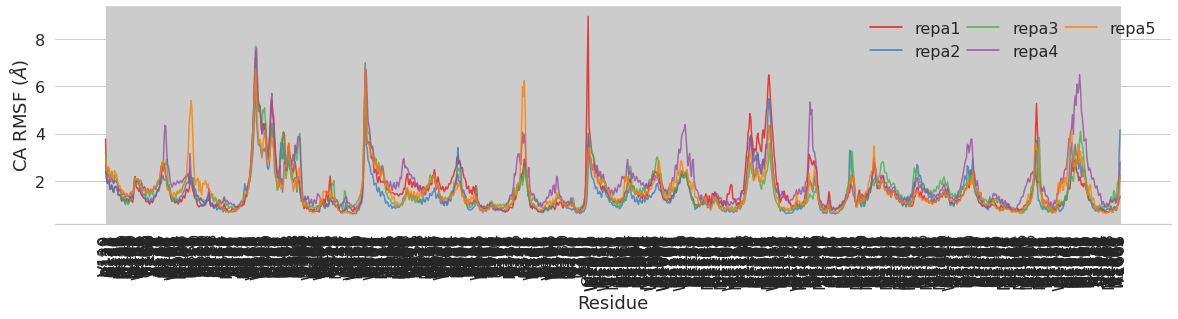

In [54]:
sns.set(font_scale=1.7)
sns.set_theme(style="whitegrid")
# pal = ['#4A5ACD', '#8A7ACD']

fig, ax = plt.subplots(figsize=(20, 4))

sns.lineplot(
    data=dfrmsf_a.reset_index(drop=True), #kind="bar",
    x="RESID", y="rmsf", ax=ax, hue="rep",
    alpha=.8, palette='Set1', ci=68 
)
sns.despine(left=True)
plt.xlabel('Residue', fontsize=18)
plt.ylabel('CA RMSF ($\AA$)', fontsize=18)
# plt.title('RMSF over DIV-S4/S4-5 linker in absence/presence of PIP2', fontsize=18)
plt.legend(loc="upper right", ncol=3, columnspacing=0.4, frameon=False, fontsize=16)
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
ax.tick_params(axis='both', labelsize=16)  # Set the tick label size
# ax.set_xlabel('Category', fontsize=18)  # Set the x-axis label size
# ax.set_ylabel('Value', fontsize=18)  # Set the y-axis label size
# ax.set_title('Bar Plot with Larger Text', fontsize=18)  # Set the title size
# for tl in ax.get_xticklabels():
#     txt = tl.get_text()
# #     print(txt, type(resnew.set_index('resname').loc[txt]['color']))
#     if type(dat.set_index('RESID').loc[txt]['color']) == str:
#         tl.set_backgroundcolor(dat.set_index('RESID').loc[txt]['color'])
#     else:
#         tl.set_backgroundcolor(dat.set_index('RESID').loc[txt]['color'].unique()[0])
        
# plt.savefig(pipdir + 'rmsf_combined_VSD.png', dpi=500)

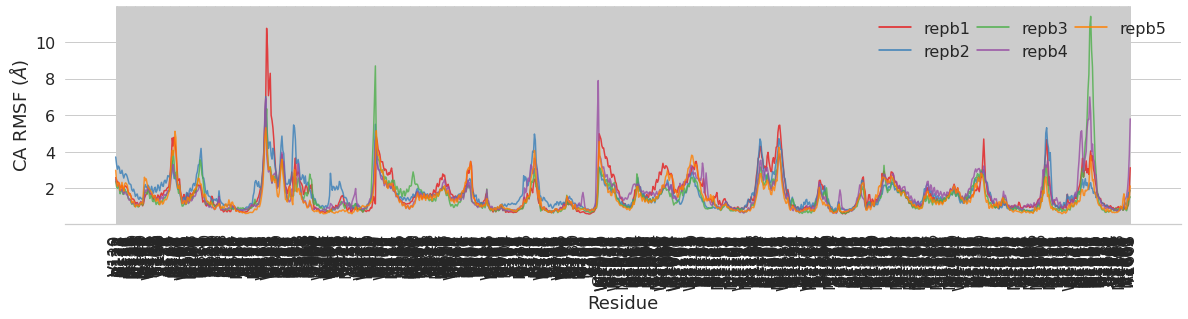

In [55]:
sns.set(font_scale=1.7)
sns.set_theme(style="whitegrid")
# pal = ['#4A5ACD', '#8A7ACD']

fig, ax = plt.subplots(figsize=(20, 4))

sns.lineplot(
    data=dfrmsf_b.reset_index(drop=True), #kind="bar",
    x="RESID", y="rmsf", ax=ax, hue="rep",
    alpha=.8, palette='Set1', ci=68 
)
sns.despine(left=True)
plt.xlabel('Residue', fontsize=18)
plt.ylabel('CA RMSF ($\AA$)', fontsize=18)
# plt.title('RMSF over DIV-S4/S4-5 linker in absence/presence of PIP2', fontsize=18)
plt.legend(loc="upper right", ncol=3, columnspacing=0.4, frameon=False, fontsize=16)
plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 45-degrees
ax.tick_params(axis='both', labelsize=16)  # Set the tick label size
# ax.set_xlabel('Category', fontsize=18)  # Set the x-axis label size
# ax.set_ylabel('Value', fontsize=18)  # Set the y-axis label size
# ax.set_title('Bar Plot with Larger Text', fontsize=18)  # Set the title size
# for tl in ax.get_xticklabels():
#     txt = tl.get_text()
# #     print(txt, type(resnew.set_index('resname').loc[txt]['color']))
#     if type(dat.set_index('RESID').loc[txt]['color']) == str:
#         tl.set_backgroundcolor(dat.set_index('RESID').loc[txt]['color'])
#     else:
#         tl.set_backgroundcolor(dat.set_index('RESID').loc[txt]['color'].unique()[0])
        
# plt.savefig(pipdir + 'rmsf_combined_VSD.png', dpi=500)

In [276]:
dat

RES  og_num RES1  new_num RESshort  RESID      rmsf   rep    PIP    color
837  GLY    1307  GLY      838        G  G1307  2.518126  rep1   none  #EFC3C3
838  LYS    1308  LYS      839        K  K1308  2.038975  rep1   none  #B1FF93
839  ASP    1309  ASP      840        D  D1309  2.096754  rep1   none  #e35959
840  ILE    1310  ILE      841        I  I1310  1.480706  rep1   none  #EFC3C3
841  PHE    1311  PHE      842        F  F1311  1.048315  rep1   none  #b559e3
..   ...     ...  ...      ...      ...    ...       ...   ...    ...      ...
865  ILE    1335  ILE      866        I  I1335  2.167211  rep3  poseB  #EFC3C3
866  PRO    1336  PRO      867        P  P1336  2.139465  rep3  poseB  #EFC3C3
867  ARG    1337  ARG      868        R  R1337  2.242869  rep3  poseB  #B1FF93
868  PRO    1338  PRO      869        P  P1338  2.460054  rep3  poseB  #EFC3C3
869  GLN    1339  GLN      870        Q  Q1339  2.920212  rep3  poseB  #5979e3

[297 rows x 10 columns]

In [188]:
ua1

<Universe with 18575 atoms>

# JANIN

In [218]:
from MDAnalysis.analysis.dihedrals import Janin 

In [413]:
print(dfrenum[dfrenum['og_num']==1457])

     RES  og_num RES1  new_num RESshort  RESID                  color
981  ARG    1457  ARG      982        R  R1457  (0.996, 0.398, 0.797)


984  ARG    1460  ARG      985        R  R1460  (0.996, 0.398, 0.797)
     RES  og_num RES1  new_num RESshort  RESID                  color
987  ARG    1463  ARG      988        R  R1463  (0.996, 0.398, 0.797)
     RES  og_num RES1  new_num RESshort  RESID                  color
990  LYS    1466  LYS      991        K  K1466  (0.996, 0.398, 0.797)
     RES  og_num RES1  new_num RESshort  RESID                  color
993  ARG    1469  ARG      994        R  R1469  (0.996, 0.398, 0.797)

In [657]:
def plot_janin(res, st=250):
    res = str(res)
    ra1 = ua1.select_atoms("resid " + res)
    jana1 = Janin(ra1).run(start=st)
    ra2 = ua2.select_atoms("resid " + res)
    jana2 = Janin(ra2).run(start=st)
    ra3 = ua3.select_atoms("resid " + res)
    jana3 = Janin(ra3).run(start=st)
    ra4 = ua4.select_atoms("resid " + res)
    jana4 = Janin(ra4).run(start=st)
    ra5 = ua5.select_atoms("resid " + res)
    jana5 = Janin(ra5).run(start=st)
    # res = "985"
    rb1 = ub1.select_atoms("resid " + res)
    janb1 = Janin(rb1).run(start=st)
    rb2 = ub2.select_atoms("resid " + res)
    janb2 = Janin(rb2).run(start=st)
    rb3 = ub3.select_atoms("resid " + res)
    janb3 = Janin(rb3).run(start=st)
    rb4 = ub4.select_atoms("resid " + res)
    janb4 = Janin(rb4).run(start=st)
    rb5 = ub5.select_atoms("resid " + res)
    janb5 = Janin(rb5).run(start=st)
    chi1 = np.concatenate([
    jana1.angles[:,:,0].flatten(), 
    jana2.angles[:,:,0].flatten(),
    jana3.angles[:,:,0].flatten(),
    jana4.angles[:,:,0].flatten(),
    jana5.angles[:,:,0].flatten()
                      ])

    chi2 = np.concatenate([
        jana1.angles[:,:,1].flatten(), 
        jana2.angles[:,:,1].flatten(),
        jana3.angles[:,:,1].flatten(),
        jana4.angles[:,:,1].flatten(),
        jana5.angles[:,:,1].flatten()
    ])

    dfangle_a = pd.DataFrame(data=[chi1, chi2])
    dfangle_a = dfangle_a.transpose()
    dfangle_a.columns = ['chi1', 'chi2']
    dfangle_a['rep'] = len(jana1.angles[:,:,0])*['rep1'] + len(jana2.angles[:,:,0])*['rep2'] + len(jana3.angles[:,:,0])*['rep3'] + len(jana4.angles[:,:,0])*['rep4'] + len(jana5.angles[:,:,0])*['rep5']

    chi1 = np.concatenate([
        janb1.angles[:,:,0].flatten(), 
        janb2.angles[:,:,0].flatten(),
        janb3.angles[:,:,0].flatten(),
        janb4.angles[:,:,0].flatten(),
        janb5.angles[:,:,0].flatten()
                          ])

    chi2 = np.concatenate([
        janb1.angles[:,:,1].flatten(), 
        janb2.angles[:,:,1].flatten(),
        janb3.angles[:,:,1].flatten(),
        janb4.angles[:,:,1].flatten(),
        janb5.angles[:,:,1].flatten()
    ])

    dfangle_b = pd.DataFrame(data=[chi1, chi2])
    dfangle_b = dfangle_b.transpose()
    dfangle_b.columns = ['chi1', 'chi2']
    dfangle_b['rep'] = len(janb1.angles[:,:,0])*['rep1'] + len(janb2.angles[:,:,0])*['rep2'] + len(janb3.angles[:,:,0])*['rep3'] + len(janb4.angles[:,:,0])*['rep4'] + len(janb5.angles[:,:,0])*['rep5']
    
#     sns.set("notebook", font_scale=1.6, style="whitegrid")
#     fix, ax = plt.subplots(1,1, figsize=(20, 8))
    sns.scatterplot(data=dfangle_b, x='chi1',y='chi2', marker='+')
    sns.scatterplot(data=dfangle_a, x='chi1',y='chi2', marker='+')
    plt.suptitle("chi1/chi2 dihedrals for res "+str(int(dfrenum[dfrenum['new_num']==int(res)]['og_num'])))
#     ax[0].set_title('-PIP')
#     ax[1].set_title('+PIP')
    plt.show()


1456

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)


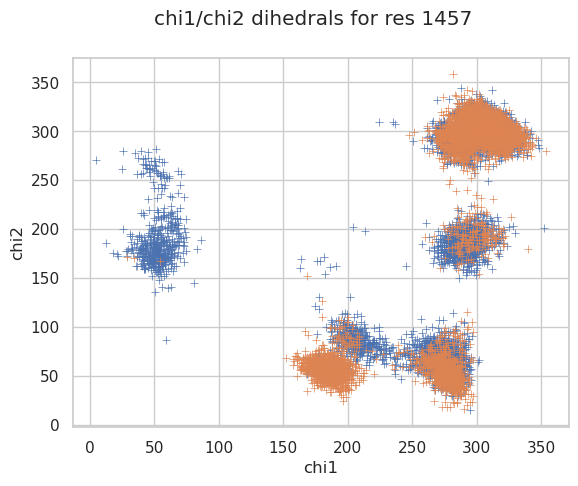

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)


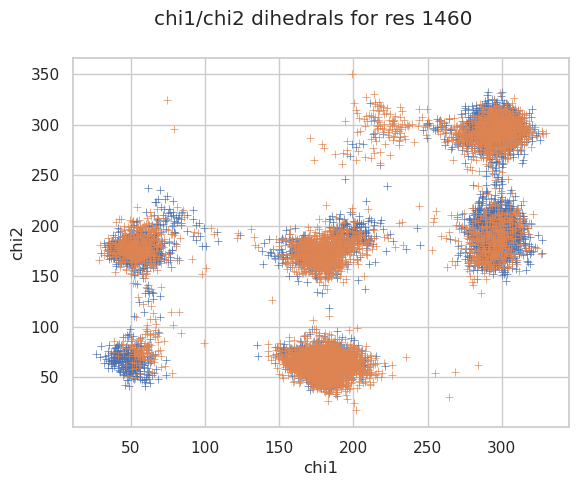

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)


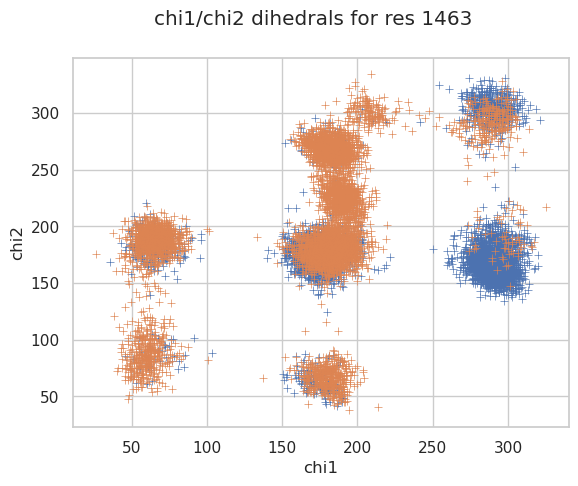

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)


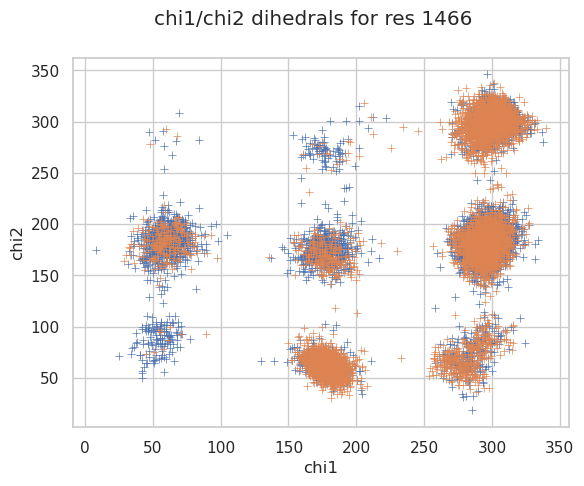

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)


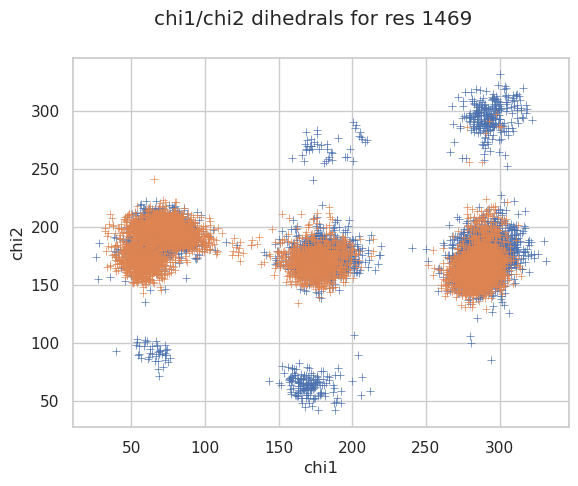

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)


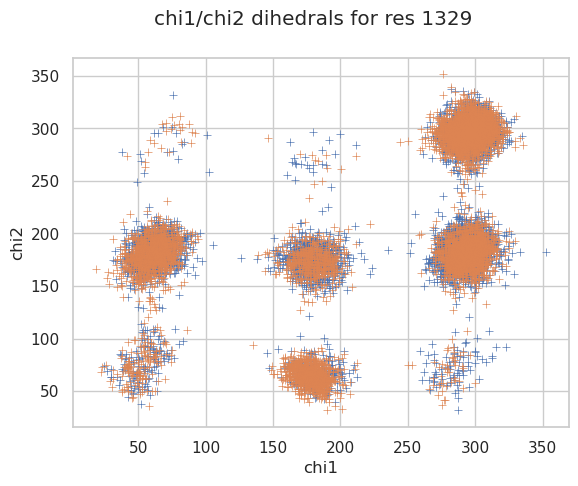

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)


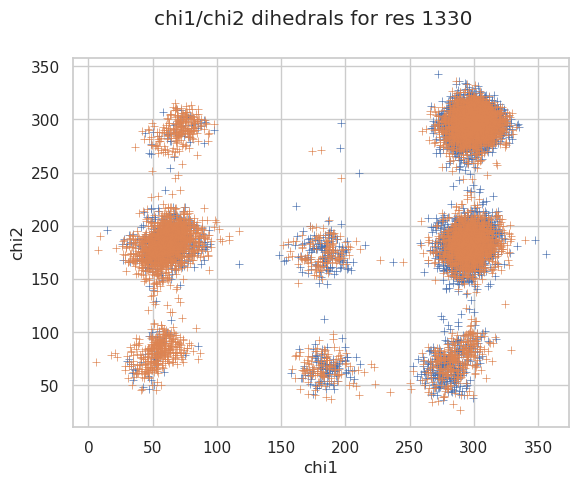

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)


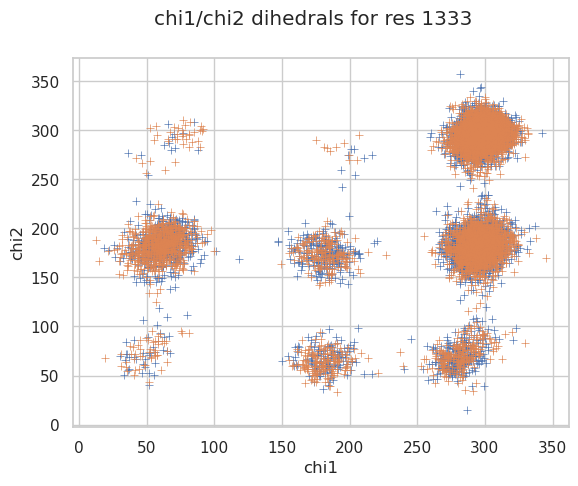

In [658]:
for r in [982, 985, 988, 991, 994, 854, 855, 858]:
    plot_janin(r)

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)


In [388]:
dfangle_b

chi1        chi2   rep
0     305.380862  300.164760  rep1
1     310.011532  301.597449  rep1
2     308.384693  281.768006  rep1
3     308.549808  316.473831  rep1
4     291.927269  313.133653  rep1
...          ...         ...   ...
6752  309.579142  133.796186  rep5
6753  298.164332  138.200142  rep5
6754  299.370693  124.119312  rep5
6755  313.556596  142.702042  rep5
6756  306.347846  141.479584  rep5

[6757 rows x 3 columns]

Text(0.5, 1.0, '+PIP')

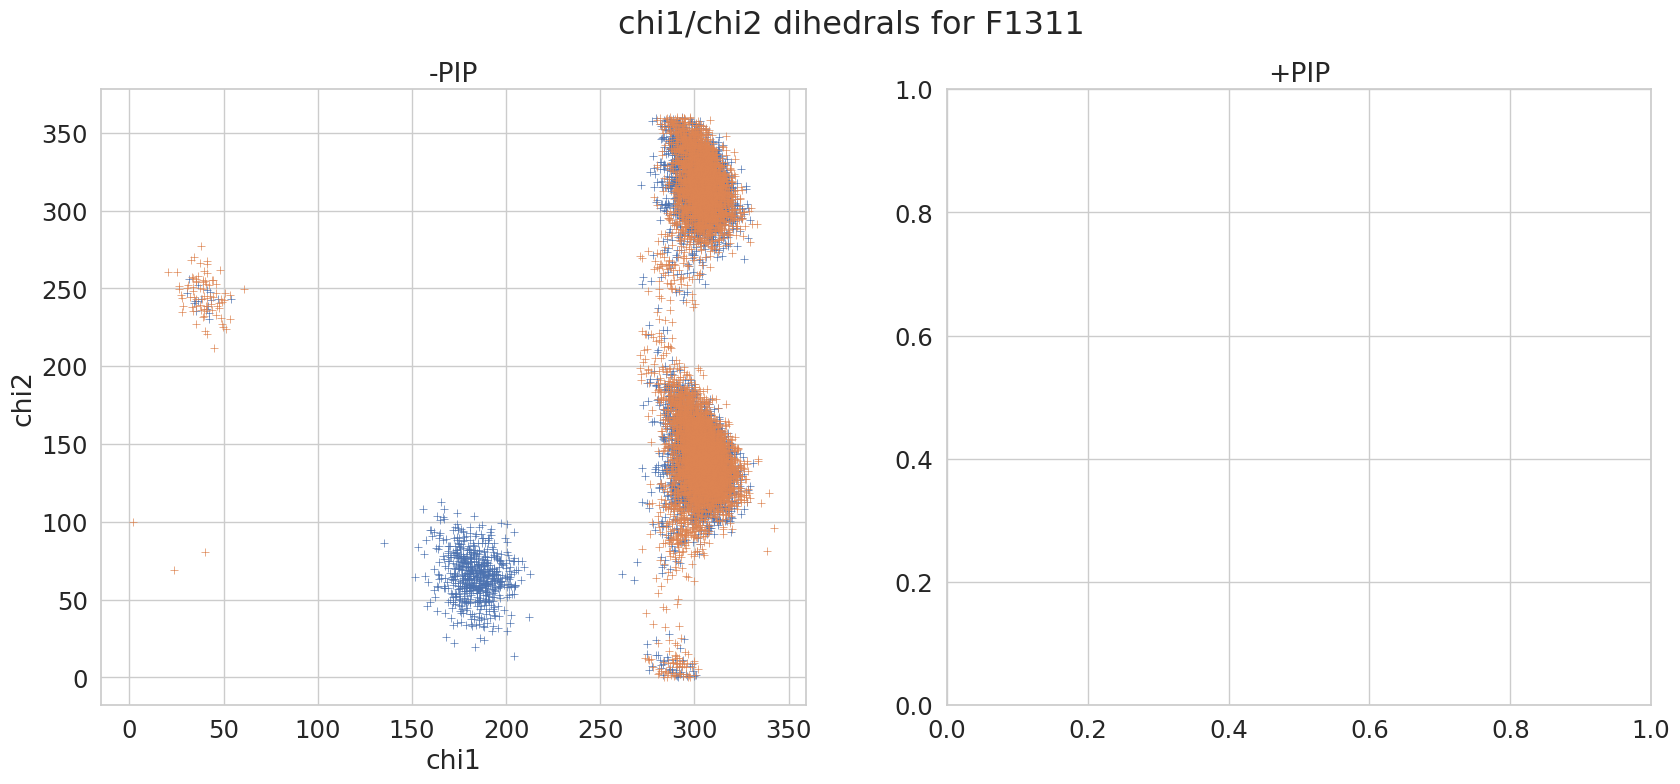

In [389]:
sns.set("notebook", font_scale=1.6, style="whitegrid")
fix, ax = plt.subplots(1,2, figsize=(20, 8))
sns.scatterplot(data=dfangle_b, x='chi1',y='chi2', marker='+', ax=ax[0])
sns.scatterplot(data=dfangle_a, x='chi1',y='chi2', marker='+', ax=ax[0])
plt.suptitle("chi1/chi2 dihedrals for F1311")
ax[0].set_title('-PIP')
ax[1].set_title('+PIP')

Text(0.5, 1.0, '+PIP')

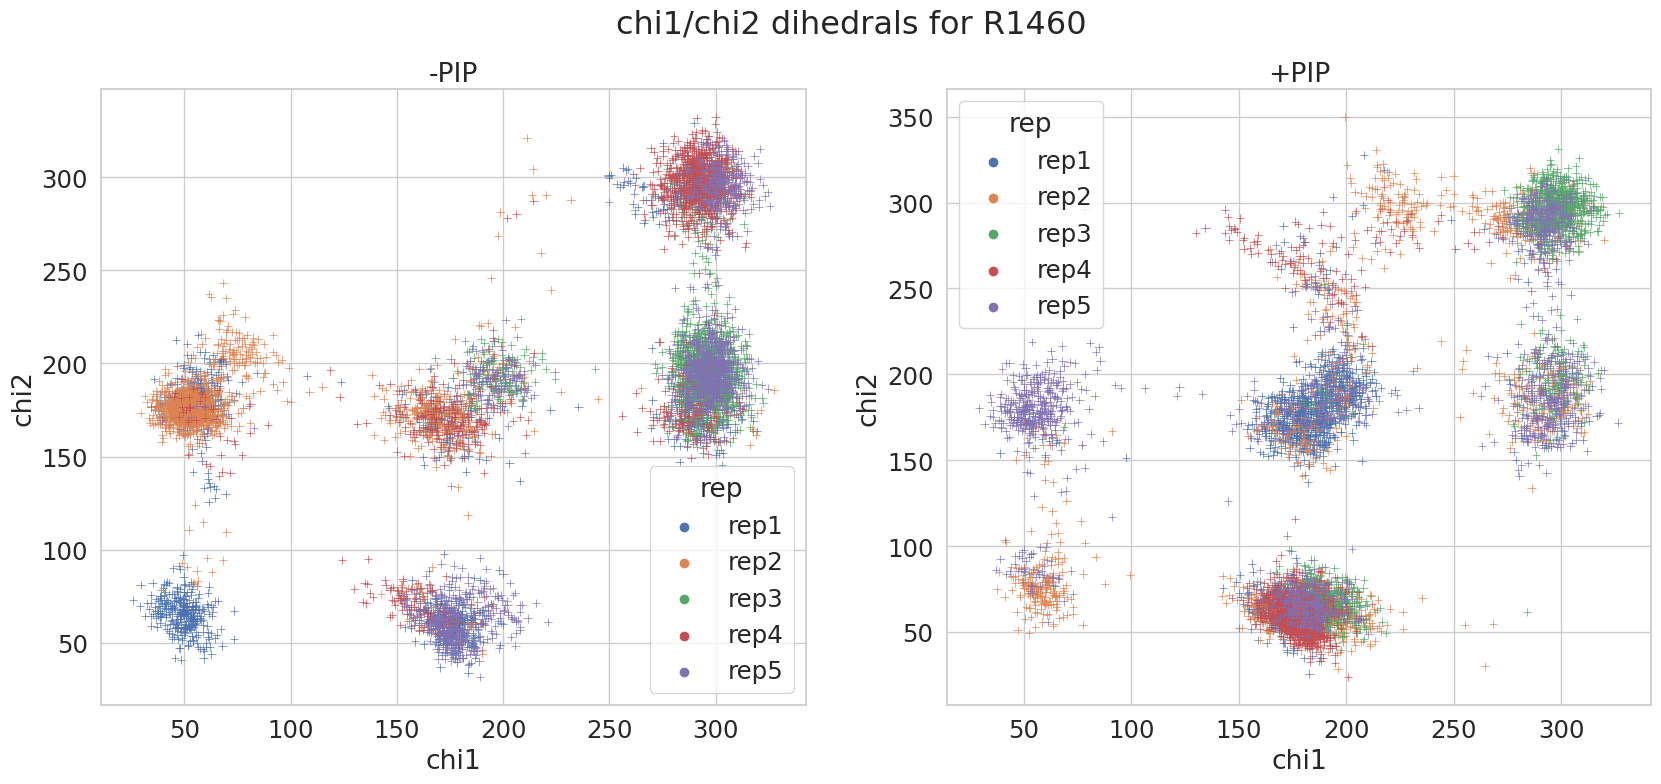

In [375]:
# sns.set("notebook", font_scale=1.6, style="whitegrid")
# fix, ax = plt.subplots(1,2, figsize=(20, 8))
# sns.scatterplot(data=dfangle_b, x='chi1',y='chi2', hue='rep', marker='+', ax=ax[0])
# sns.scatterplot(data=dfangle_a, x='chi1',y='chi2', hue='rep', marker='+', ax=ax[1])
# plt.suptitle("chi1/chi2 dihedrals for R1460")
# ax[0].set_title('-PIP')
# ax[1].set_title('+PIP')

Text(0.5, 1.0, '+PIP')

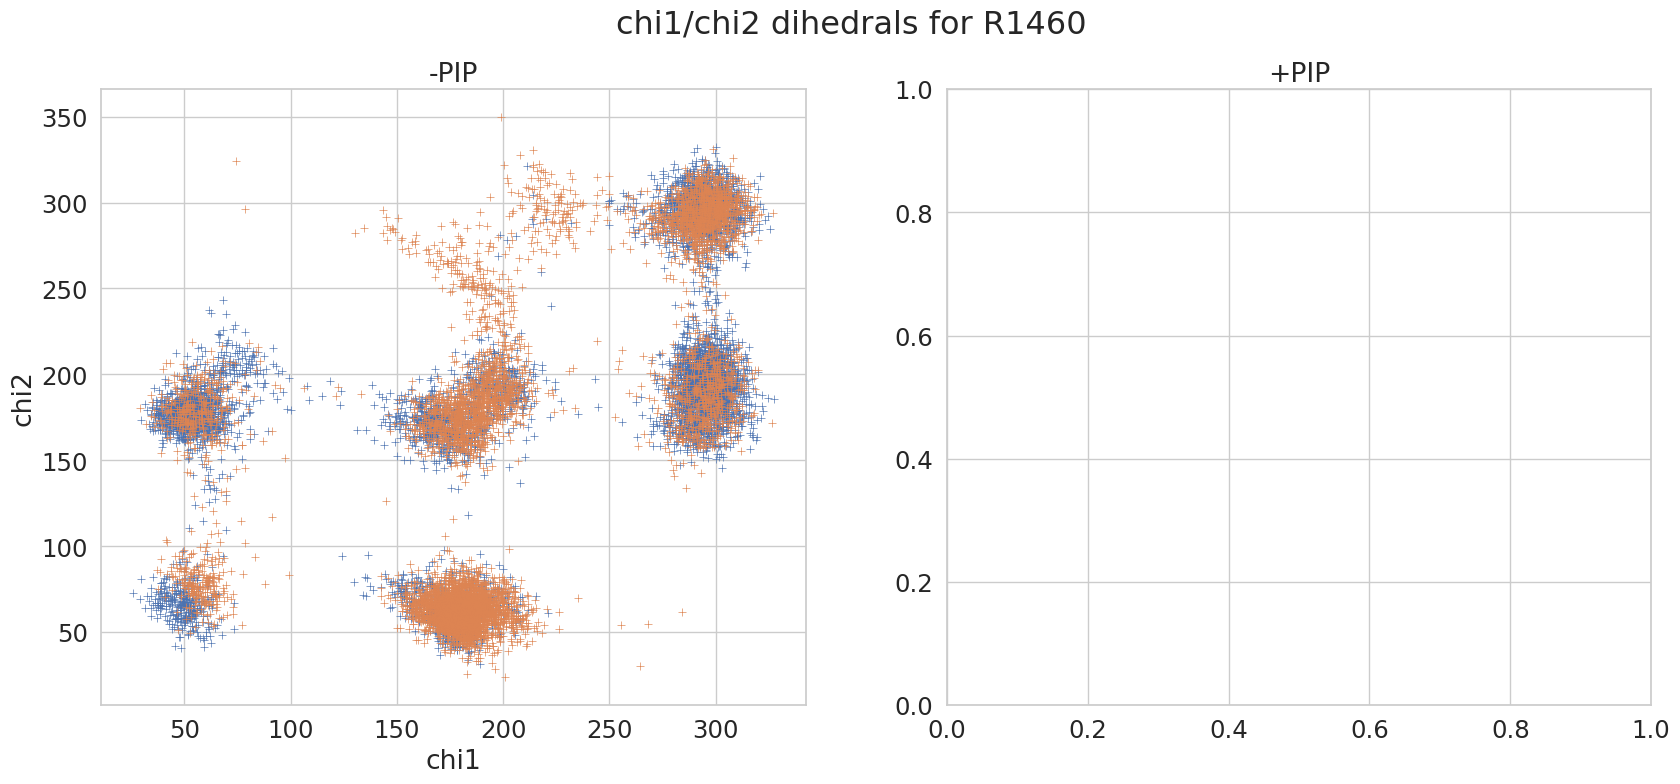

In [400]:
sns.set("notebook", font_scale=1.6, style="whitegrid")
fix, ax = plt.subplots(1,2, figsize=(20, 8))
sns.scatterplot(data=dfangle_b, x='chi1',y='chi2', marker='+', ax=ax[0])
sns.scatterplot(data=dfangle_a, x='chi1',y='chi2', marker='+', ax=ax[0])
plt.suptitle("chi1/chi2 dihedrals for R1460")
ax[0].set_title('-PIP')
ax[1].set_title('+PIP')

Text(0.5, 1.0, '+PIP')

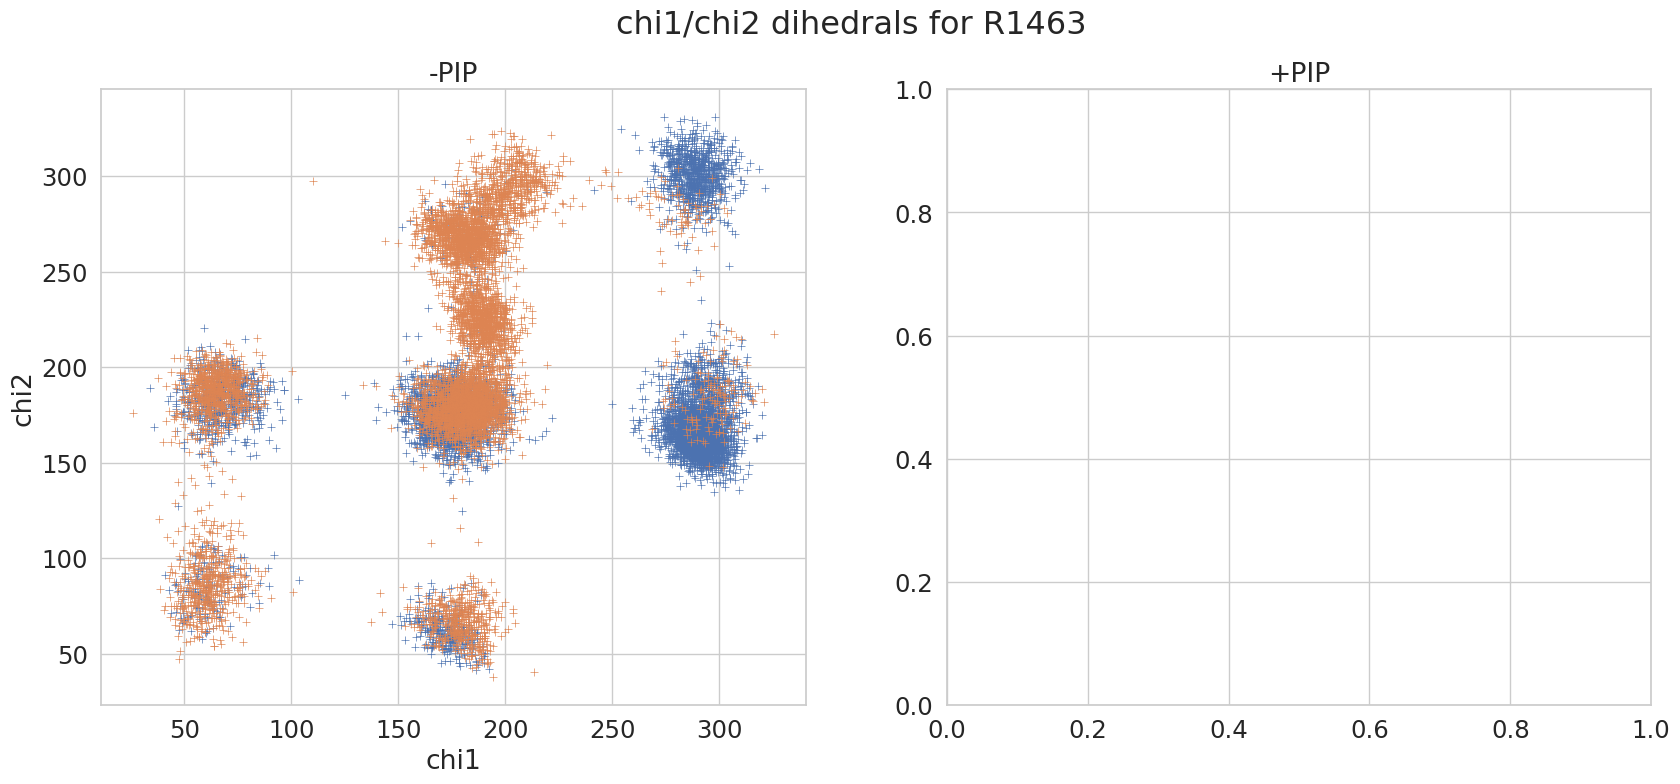

In [394]:
sns.set("notebook", font_scale=1.6, style="whitegrid")
fix, ax = plt.subplots(1,2, figsize=(20, 8))
sns.scatterplot(data=dfangle_b, x='chi1',y='chi2', marker='+', ax=ax[0])
sns.scatterplot(data=dfangle_a, x='chi1',y='chi2', marker='+', ax=ax[0])
plt.suptitle("chi1/chi2 dihedrals for R1463")
ax[0].set_title('-PIP')
ax[1].set_title('+PIP')

Text(0.5, 1.0, '+PIP')

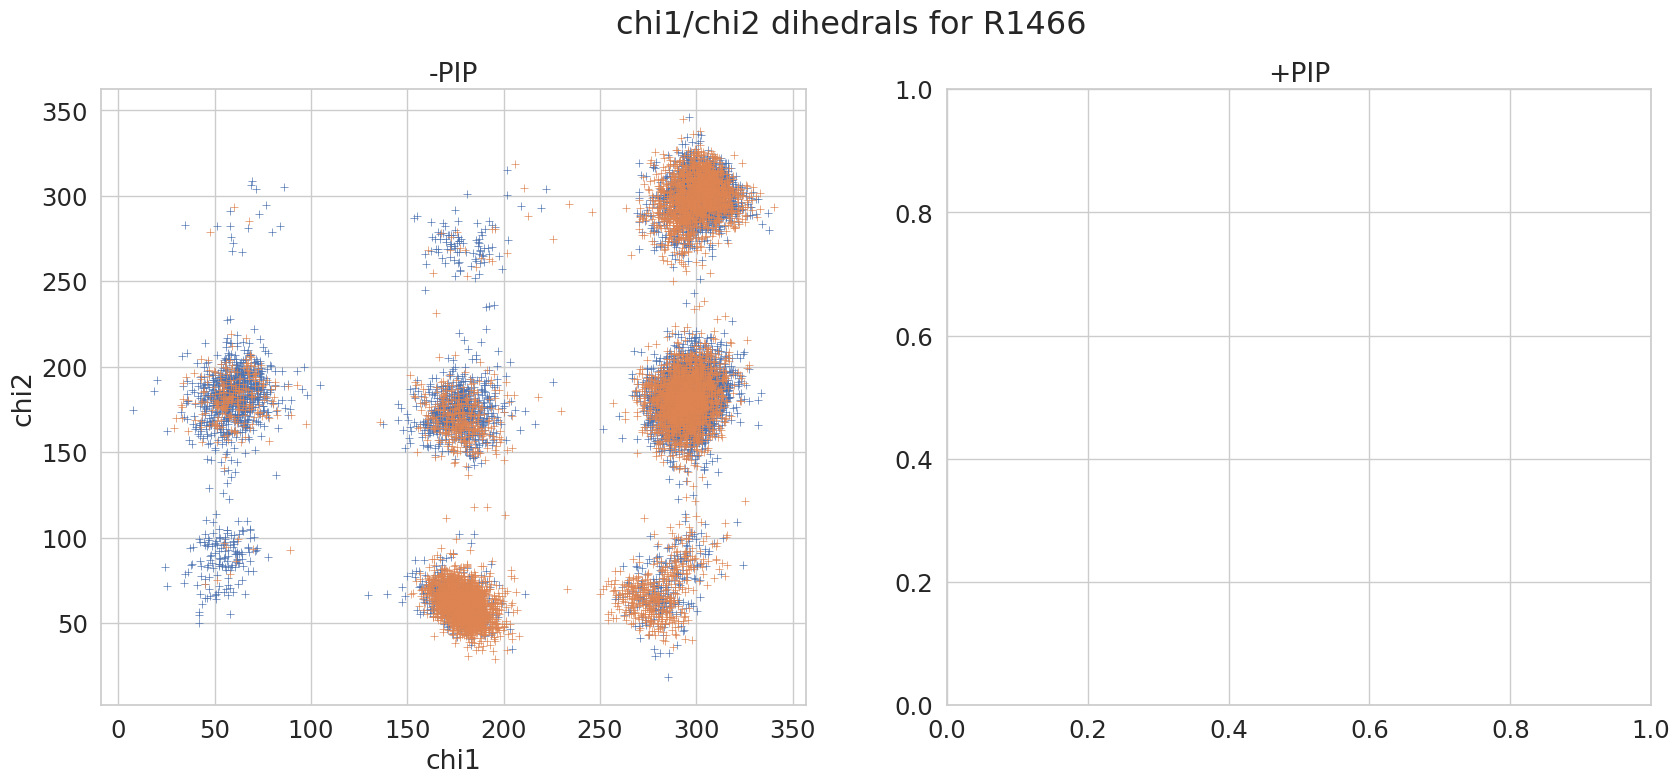

In [405]:
sns.set("notebook", font_scale=1.6, style="whitegrid")
fix, ax = plt.subplots(1,2, figsize=(20, 8))
sns.scatterplot(data=dfangle_b, x='chi1',y='chi2', marker='+', ax=ax[0])
sns.scatterplot(data=dfangle_a, x='chi1',y='chi2', marker='+', ax=ax[0])
plt.suptitle("chi1/chi2 dihedrals for R1466")
ax[0].set_title('-PIP')
ax[1].set_title('+PIP')

Text(0.5, 1.0, '+PIP')

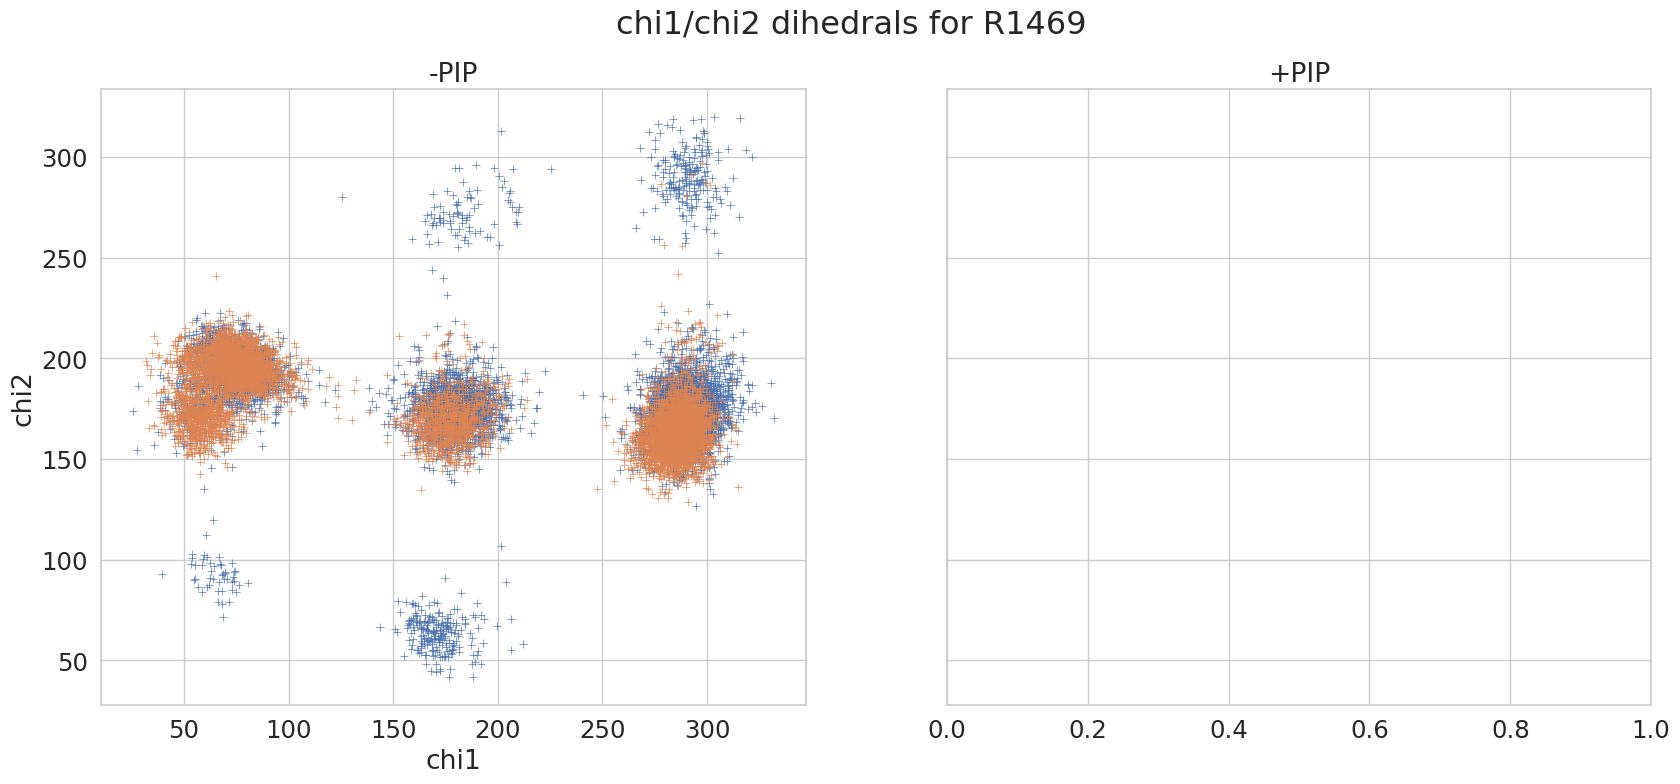

In [410]:
sns.set("notebook", font_scale=1.6, style="whitegrid")
fix, ax = plt.subplots(1,2, figsize=(20, 8), sharey=True)
sns.scatterplot(data=dfangle_b, x='chi1',y='chi2', marker='+', ax=ax[0])
sns.scatterplot(data=dfangle_a, x='chi1',y='chi2', marker='+', ax=ax[0])
plt.suptitle("chi1/chi2 dihedrals for R1469")
ax[0].set_title('-PIP')
ax[1].set_title('+PIP')

<AxesSubplot: xlabel='$\\chi1$ (deg)', ylabel='$\\chi2$ (deg)'>

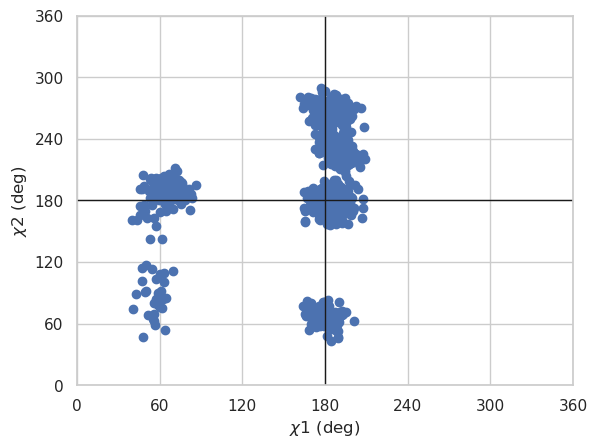

In [282]:


# #[1][0][0]
# jan.angles.shape

jan.plot()

<AxesSubplot: xlabel='$\\chi1$ (deg)', ylabel='$\\chi2$ (deg)'>

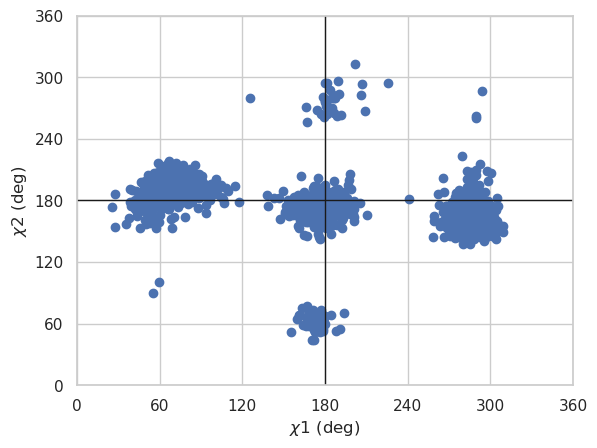

In [247]:
jan.plot()

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)


<AxesSubplot: xlabel='$\\chi1$ (deg)', ylabel='$\\chi2$ (deg)'>

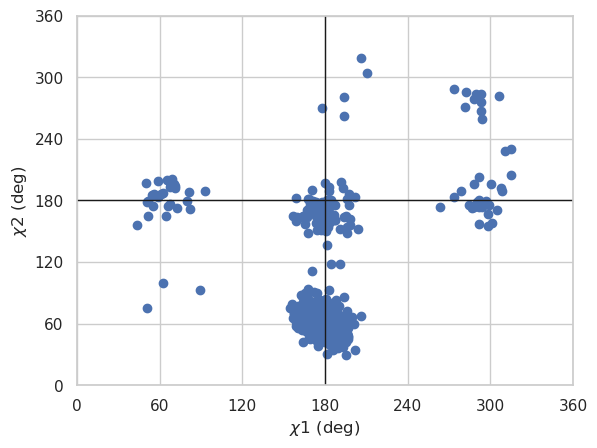

In [227]:

r = ua1.select_atoms("resid 991")
jan = Janin(r).run()
jan.plot()

<AxesSubplot: xlabel='$\\chi1$ (deg)', ylabel='$\\chi2$ (deg)'>

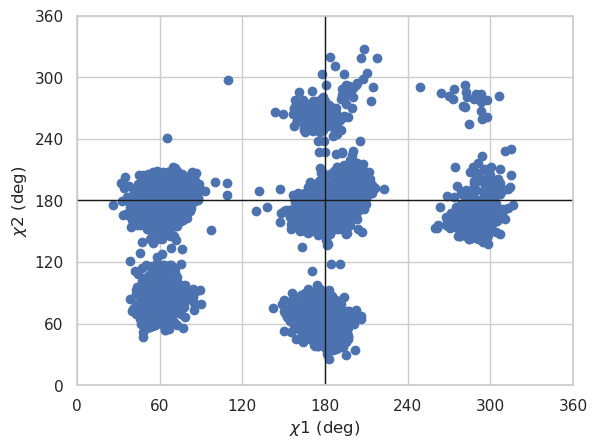

# DIST

In [217]:
def plot_dists(sel1, sel2, title):
#     sel1 = "protein and resid 842-853 and name C CA O N"
#     sel2 = "protein and resid 996-1017 and name C CA O N"
    i = 1 
    dfdistALL_a = pd.DataFrame()
    for ux in [ua1, ua2, ua3, ua4, ua5]:
        asn = ux.select_atoms(sel1)
        gln = ux.select_atoms(sel2)

        coms_asn = []
        coms_gln = []
        dists_mut = []
        dfdist_a = pd.DataFrame()

        for ts in ux.trajectory[::10]:
            # Calculate the center of mass of the selected residues
            com_asn = asn.center_of_mass()
            com_gln = gln.center_of_mass()
            coms_asn.append(com_asn)
            coms_gln.append(com_gln)
            # Calculate the distance between two COMS
            dist = norm(com_asn - com_gln)
            dists_mut.append(dist)

        df_1662dist = pd.DataFrame()
        df_1662dist['Time (ns)'] = np.arange(1, len(dists_mut)+1, 1).tolist()
        df_1662dist['dist'] = dists_mut
        df_1662dist['distroll'] = df_1662dist['dist']#.rolling(20).mean()
        df_1662dist['rep'] = ['rep'+str(i)]*len(dists_mut) #+ ['rep2']*200 + ['rep3']*200 + ['rep4']*200 + ['rep5']*200
        # df_1662dist['framei'] = np.arange(1, 201).tolist()*5

        dfdist_a = pd.concat([dfdist_a, df_1662dist])
        i += 1 
        dfdistALL_a = pd.concat([dfdistALL_a, dfdist_a])


    i = 1 
    dfdistALL_b = pd.DataFrame()
    for ux in [ub1, ub2, ub3, ub4, ub5]:
        asn = ux.select_atoms(sel1)
        gln = ux.select_atoms(sel2)

        coms_asn = []
        coms_gln = []
        dists_mut = []
        dfdist_a = pd.DataFrame()

        for ts in ux.trajectory[::10]:
            # Calculate the center of mass of the selected residues
            com_asn = asn.center_of_mass()
            com_gln = gln.center_of_mass()
            coms_asn.append(com_asn)
            coms_gln.append(com_gln)
            # Calculate the distance between two COMS
            dist = norm(com_asn - com_gln)
            dists_mut.append(dist)

        df_1662dist = pd.DataFrame()
        df_1662dist['Time (ns)'] = np.arange(1, len(dists_mut)+1, 1).tolist()
        df_1662dist['dist'] = dists_mut
        df_1662dist['distroll'] = df_1662dist['dist']#.rolling(20).mean()
        df_1662dist['rep'] = ['rep'+str(i)]*len(dists_mut) #+ ['rep2']*200 + ['rep3']*200 + ['rep4']*200 + ['rep5']*200
        # df_1662dist['framei'] = np.arange(1, 201).tolist()*5

        dfdist_a = pd.concat([dfdist_a, df_1662dist])
        i += 1 
        dfdistALL_b = pd.concat([dfdistALL_b, dfdist_a])

    fig, ax = plt.subplots(1,2, figsize=(16,6), sharey=True)
    sns.lineplot(data=dfdistALL_a.reset_index(), x='Time (ns)', y='distroll', hue='rep', ax=ax[1])
    sns.lineplot(data=dfdistALL_b.reset_index(), x='Time (ns)', y='distroll', hue='rep', ax=ax[0])
    plt.suptitle(title)
#     plt.ylim(9.7, 13.1)
    ax[0].set_ylabel('Distance (Å)')
    ax[0].get_legend().remove()
    ax[1].get_legend().remove()

In [220]:
def plot_dists_E(sel1, sel2, title):
#     sel1 = "protein and resid 842-853 and name C CA O N"
#     sel2 = "protein and resid 996-1017 and name C CA O N"
    i = 1 
    dfdistALL_a = pd.DataFrame()
    for ux in [ue1, ue2, ue3, ue4, ue5]:
        asn = ux.select_atoms(sel1)
        gln = ux.select_atoms(sel2)

        coms_asn = []
        coms_gln = []
        dists_mut = []
        dfdist_a = pd.DataFrame()

        for ts in ux.trajectory[::10]:
            # Calculate the center of mass of the selected residues
            com_asn = asn.center_of_mass()
            com_gln = gln.center_of_mass()
            coms_asn.append(com_asn)
            coms_gln.append(com_gln)
            # Calculate the distance between two COMS
            dist = norm(com_asn - com_gln)
            dists_mut.append(dist)

        df_1662dist = pd.DataFrame()
        df_1662dist['Time (ns)'] = np.arange(1, len(dists_mut)+1, 1).tolist()
        df_1662dist['dist'] = dists_mut
        df_1662dist['distroll'] = df_1662dist['dist']#.rolling(20).mean()
        df_1662dist['rep'] = ['rep'+str(i)]*len(dists_mut) #+ ['rep2']*200 + ['rep3']*200 + ['rep4']*200 + ['rep5']*200
        # df_1662dist['framei'] = np.arange(1, 201).tolist()*5

        dfdist_a = pd.concat([dfdist_a, df_1662dist])
        i += 1 
        dfdistALL_a = pd.concat([dfdistALL_a, dfdist_a])


    i = 1 
    dfdistALL_b = pd.DataFrame()
    for ux in [ub1, ub2, ub3, ub4, ub5]:
        asn = ux.select_atoms(sel1)
        gln = ux.select_atoms(sel2)

        coms_asn = []
        coms_gln = []
        dists_mut = []
        dfdist_a = pd.DataFrame()

        for ts in ux.trajectory[::10]:
            # Calculate the center of mass of the selected residues
            com_asn = asn.center_of_mass()
            com_gln = gln.center_of_mass()
            coms_asn.append(com_asn)
            coms_gln.append(com_gln)
            # Calculate the distance between two COMS
            dist = norm(com_asn - com_gln)
            dists_mut.append(dist)

        df_1662dist = pd.DataFrame()
        df_1662dist['Time (ns)'] = np.arange(1, len(dists_mut)+1, 1).tolist()
        df_1662dist['dist'] = dists_mut
        df_1662dist['distroll'] = df_1662dist['dist']#.rolling(20).mean()
        df_1662dist['rep'] = ['rep'+str(i)]*len(dists_mut) #+ ['rep2']*200 + ['rep3']*200 + ['rep4']*200 + ['rep5']*200
        # df_1662dist['framei'] = np.arange(1, 201).tolist()*5

        dfdist_a = pd.concat([dfdist_a, df_1662dist])
        i += 1 
        dfdistALL_b = pd.concat([dfdistALL_b, dfdist_a])

    fig, ax = plt.subplots(1,2, figsize=(16,6), sharey=True)
    sns.lineplot(data=dfdistALL_a.reset_index(), x='Time (ns)', y='distroll', hue='rep', ax=ax[1])
    sns.lineplot(data=dfdistALL_b.reset_index(), x='Time (ns)', y='distroll', hue='rep', ax=ax[0])
    plt.suptitle(title)
#     plt.ylim(9.7, 13.1)
    ax[0].set_ylabel('Distance (Å)')
    ax[0].get_legend().remove()
    ax[1].get_legend().remove()

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

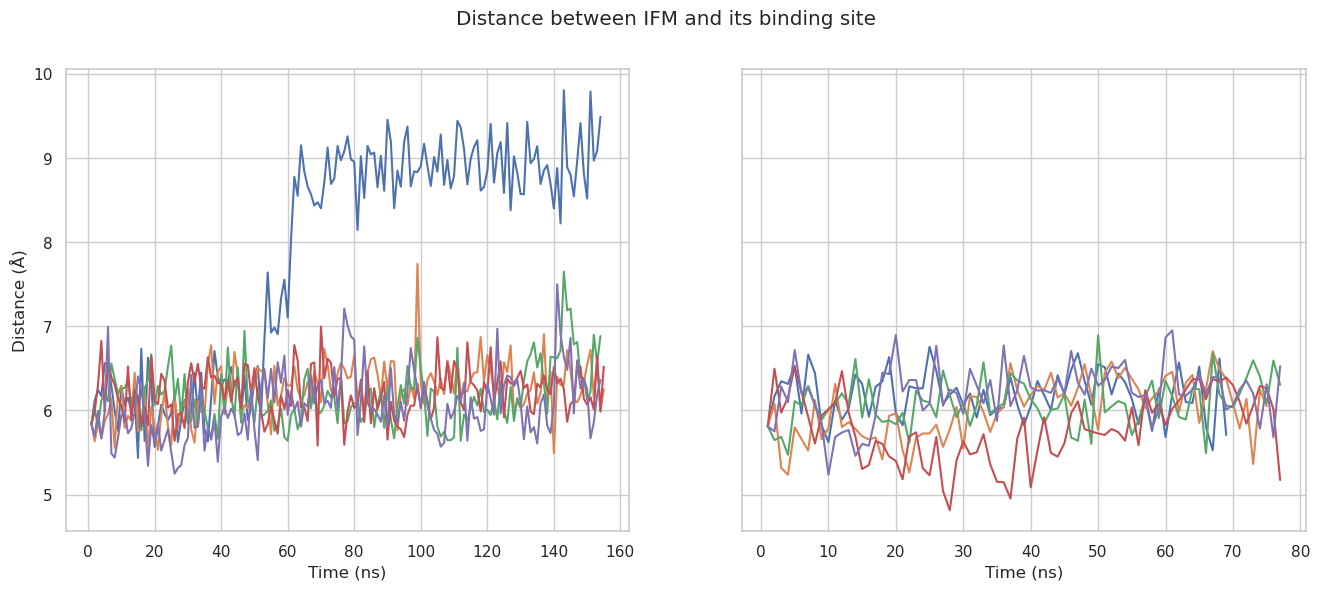

In [221]:
sel1 = "protein and resid 835-837"
sel2 = "protein and resid 1009 1006 1116 1120" # 673 677"
plot_dists_E(sel1, sel2, 'Distance between IFM and its binding site')

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(group), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(group), dtype=np.bool)
/h

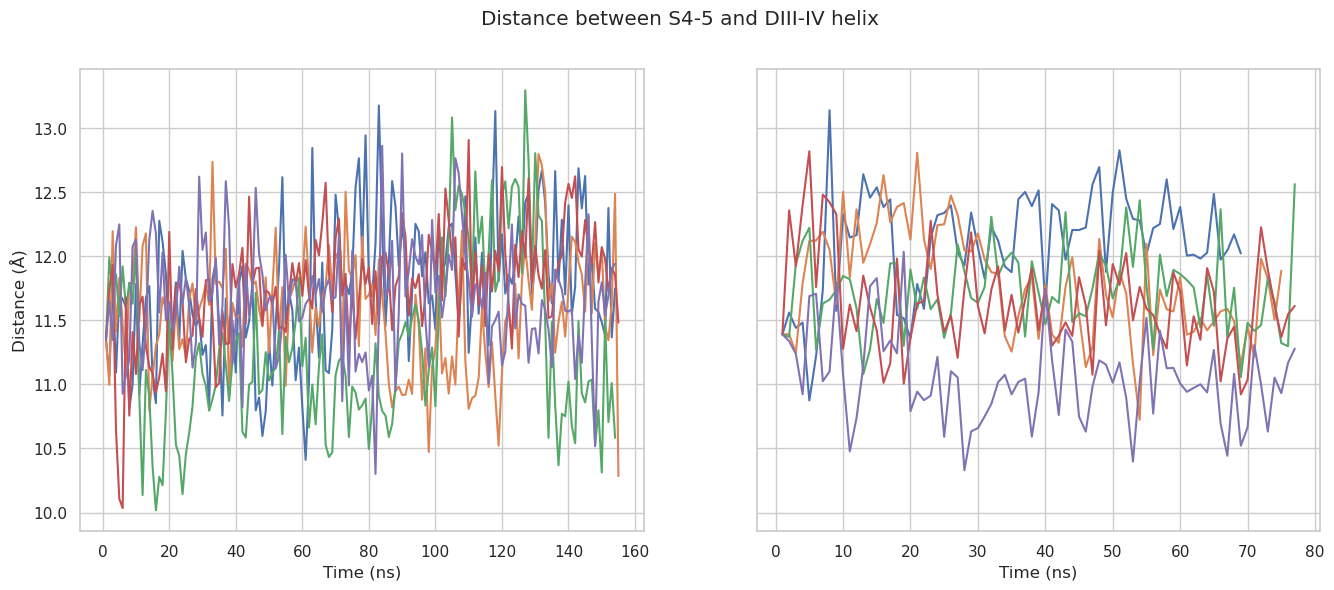

In [222]:
sel1 = "protein and resid 842-853 and name C CA O N"
sel2 = "protein and resid 996-1007 and name C CA O N"
plot_dists_E(sel1, sel2, 'Distance between S4-5 and DIII-IV helix')

In [469]:
sel1 = "protein and resid 842-853 and name C CA O N"
sel2 = "protein and resid 996-1017 and name C CA O N"
i = 1 
dfdistALL_a = pd.DataFrame()
for ux in [ua1, ua2, ua3, ua4, ua5]:
    asn = ux.select_atoms(sel1)
    gln = ux.select_atoms(sel2)

    coms_asn = []
    coms_gln = []
    dists_mut = []
    dfdist_a = pd.DataFrame()

    for ts in ux.trajectory:
        # Calculate the center of mass of the selected residues
        com_asn = asn.center_of_mass()
        com_gln = gln.center_of_mass()
        coms_asn.append(com_asn)
        coms_gln.append(com_gln)
        # Calculate the distance between two COMS
        dist = norm(com_asn - com_gln)
        dists_mut.append(dist)

    df_1662dist = pd.DataFrame()
    df_1662dist['Time (ns)'] = np.arange(1, len(dists_mut)+1, 1).tolist()
    df_1662dist['dist'] = dists_mut
    df_1662dist['distroll'] = df_1662dist['dist'].rolling(20).mean()
    df_1662dist['rep'] = ['rep'+str(i)]*len(dists_mut) #+ ['rep2']*200 + ['rep3']*200 + ['rep4']*200 + ['rep5']*200
    # df_1662dist['framei'] = np.arange(1, 201).tolist()*5

    dfdist_a = pd.concat([dfdist_a, df_1662dist])
    i += 1 
    dfdistALL_a = pd.concat([dfdistALL_a, dfdist_a])


i = 1 
dfdistALL_b = pd.DataFrame()
for ux in [ub1, ub2, ub3, ub4, ub5]:
    asn = ux.select_atoms(sel1)
    gln = ux.select_atoms(sel2)

    coms_asn = []
    coms_gln = []
    dists_mut = []
    dfdist_a = pd.DataFrame()

    for ts in ux.trajectory:
        # Calculate the center of mass of the selected residues
        com_asn = asn.center_of_mass()
        com_gln = gln.center_of_mass()
        coms_asn.append(com_asn)
        coms_gln.append(com_gln)
        # Calculate the distance between two COMS
        dist = norm(com_asn - com_gln)
        dists_mut.append(dist)

    df_1662dist = pd.DataFrame()
    df_1662dist['Time (ns)'] = np.arange(1, len(dists_mut)+1, 1).tolist()
    df_1662dist['dist'] = dists_mut
    df_1662dist['distroll'] = df_1662dist['dist'].rolling(20).mean()
    df_1662dist['rep'] = ['rep'+str(i)]*len(dists_mut) #+ ['rep2']*200 + ['rep3']*200 + ['rep4']*200 + ['rep5']*200
    # df_1662dist['framei'] = np.arange(1, 201).tolist()*5

    dfdist_a = pd.concat([dfdist_a, df_1662dist])
    i += 1 
    dfdistALL_b = pd.concat([dfdistALL_b, dfdist_a])




/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(group), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(group), dtype=np.bool)
/h

In [603]:
# sel1 = "protein and resid 842-853 and name C CA O N"
# sel2 = "protein and resid 996-1007 and name C CA O N"
sel1 = "protein and resid 835-837"
sel2 = "protein and resid 1009 1006 1116 1120" # 673 677"
i = 1 
dfdistALL_a = pd.DataFrame()
for ux in [ua1, ua2, ua3, ua4, ua5]:
    asn = ux.select_atoms(sel1)
    gln = ux.select_atoms(sel2)

    coms_asn = []
    coms_gln = []
    dists_mut = []
    dfdist_a = pd.DataFrame()

    for ts in ux.trajectory:
        # Calculate the center of mass of the selected residues
        com_asn = asn.center_of_mass()
        com_gln = gln.center_of_mass()
        coms_asn.append(com_asn)
        coms_gln.append(com_gln)
        # Calculate the distance between two COMS
        dist = norm(com_asn - com_gln)
        dists_mut.append(dist)

    df_1662dist = pd.DataFrame()
    df_1662dist['Time (ns)'] = np.arange(1, len(dists_mut)+1, 1).tolist()
    df_1662dist['dist'] = dists_mut
    df_1662dist['distroll'] = df_1662dist['dist'].rolling(30).mean()
    df_1662dist['rep'] = ['rep'+str(i)]*len(dists_mut) #+ ['rep2']*200 + ['rep3']*200 + ['rep4']*200 + ['rep5']*200
    # df_1662dist['framei'] = np.arange(1, 201).tolist()*5

    dfdist_a = pd.concat([dfdist_a, df_1662dist])
    i += 1 
    dfdistALL_a = pd.concat([dfdistALL_a, dfdist_a])


i = 1 
dfdistALL_b = pd.DataFrame()
for ux in [ub1, ub2, ub3, ub4, ub5]:
    asn = ux.select_atoms(sel1)
    gln = ux.select_atoms(sel2)

    coms_asn = []
    coms_gln = []
    dists_mut = []
    dfdist_a = pd.DataFrame()

    for ts in ux.trajectory:
        # Calculate the center of mass of the selected residues
        com_asn = asn.center_of_mass()
        com_gln = gln.center_of_mass()
        coms_asn.append(com_asn)
        coms_gln.append(com_gln)
        # Calculate the distance between two COMS
        dist = norm(com_asn - com_gln)
        dists_mut.append(dist)

    df_1662dist = pd.DataFrame()
    df_1662dist['Time (ns)'] = np.arange(1, len(dists_mut)+1, 1).tolist()
    df_1662dist['dist'] = dists_mut
    df_1662dist['distroll'] = df_1662dist['dist'].rolling(30).mean()
    df_1662dist['rep'] = ['rep'+str(i)]*len(dists_mut) #+ ['rep2']*200 + ['rep3']*200 + ['rep4']*200 + ['rep5']*200
    # df_1662dist['framei'] = np.arange(1, 201).tolist()*5

    dfdist_a = pd.concat([dfdist_a, df_1662dist])
    i += 1 
    dfdistALL_b = pd.concat([dfdistALL_b, dfdist_a])




/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

In [604]:
dfdistALL_a['pip'] = '+PIP'
dfdistALL_b['pip'] = '-PIP'


deefa = dfdistALL_a.loc[dfdistALL_a['Time (ns)']>500]
deefb = dfdistALL_b.loc[dfdistALL_b['Time (ns)']>500]

dismeans = []
peep = []
for rep in deefa.rep.unique():
    dismeans.append(deefb.loc[deefb.rep==rep].mean().dist)
    peep.append('-PIP')
    dismeans.append(deefa.loc[deefa.rep==rep].mean().dist)
    peep.append('+PIP')

dfdistmeans = pd.DataFrame({
    'dis': dismeans,
    'pip': peep
})
dfdistmeans

/tmp/ipykernel_3016572/3735520463.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dismeans.append(deefb.loc[deefb.rep==rep].mean().dist)
/tmp/ipykernel_3016572/3735520463.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dismeans.append(deefa.loc[deefa.rep==rep].mean().dist)


dis   pip
0  8.618439  -PIP
1  6.726431  +PIP
2  6.323832  -PIP
3  5.881793  +PIP
4  6.071961  -PIP
5  5.934839  +PIP
6  6.211728  -PIP
7  6.095426  +PIP
8  6.143097  -PIP
9  5.965870  +PIP

Text(0, 0.5, 'Distance (A)')

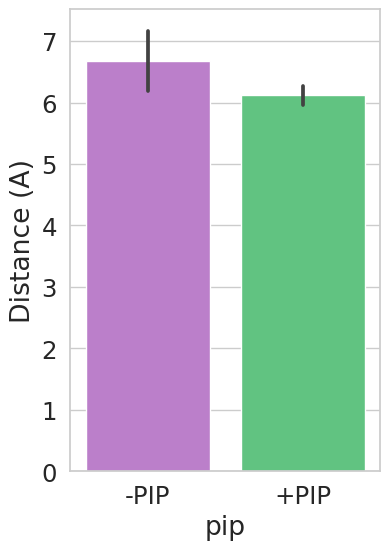

In [606]:
sns.set("notebook", font_scale=1.6, style="whitegrid")
fig, ax = plt.subplots(figsize=(4,6), sharey=True)
sns.barplot(data = dfdistmeans, x='pip', y='dis', errorbar='se', palette=pal)#, hue='rep')
# plt.ylim(9.7, 13.1)
plt.ylabel('Distance (A)')

In [128]:
dfdistmeans.loc[dfdistmeans.pip=='+PIP'].dis

1    11.433858
3    11.529412
5    11.531822
7    11.143721
9    10.733602
Name: dis, dtype: float64

In [607]:

ttest_ind(dfdistmeans.loc[dfdistmeans.pip=='-PIP'].dis, dfdistmeans.loc[dfdistmeans.pip=='+PIP'].dis)


Ttest_indResult(statistic=1.0797816696594933, pvalue=0.311714456376783)

NameError: name 'dfdistALL_a' is not defined

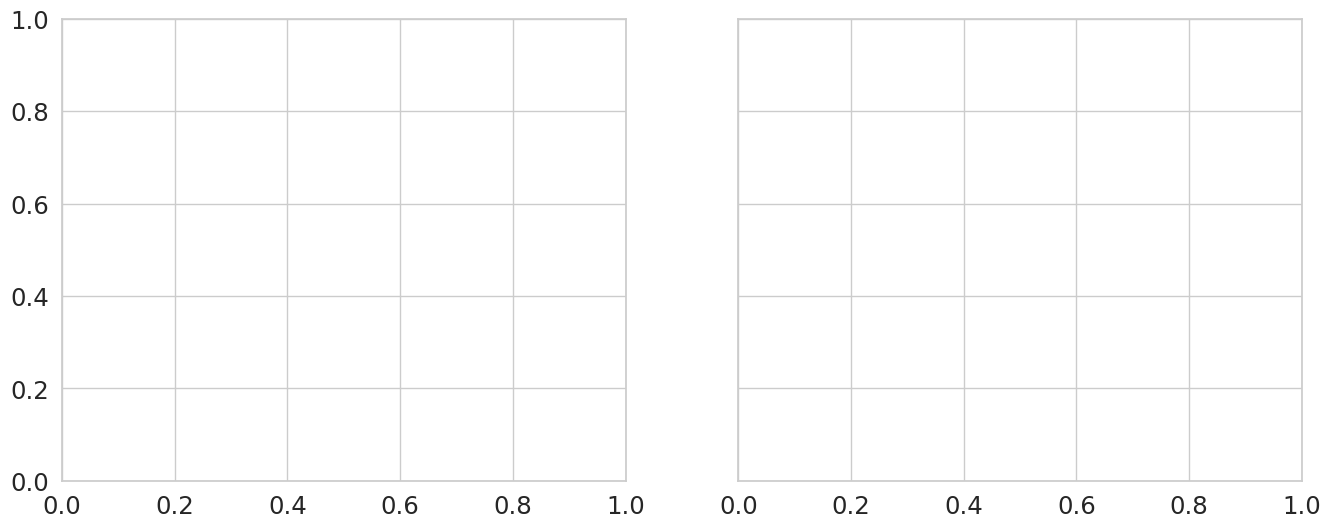

In [223]:
sns.set("notebook", font_scale=1.6, style="whitegrid")
fig, ax = plt.subplots(1,2, figsize=(16,6), sharey=True)
sns.lineplot(data=dfdistALL_a.reset_index(), x='Time (ns)', y='distroll', hue='rep', ax=ax[1])
sns.lineplot(data=dfdistALL_b.reset_index(), x='Time (ns)', y='distroll', hue='rep', ax=ax[0])
plt.suptitle('Distance between S4-5 and DIII-IV helix')
plt.ylim(9.7, 13.1)
ax[0].set_ylabel('Distance (A)')
ax[0].get_legend().remove()
ax[1].get_legend().remove()

In [135]:
sel1 = "protein and resid 835-837"
sel2 = "protein and resid 1009 1006 1116 1120"# 673 677" 'Distance between IFM and its binding site')
i = 1 
dfdistALL_a = pd.DataFrame()
for ux in [ua1, ua2, ua3, ua4, ua5]:
    asn = ux.select_atoms(sel1)
    gln = ux.select_atoms(sel2)

    coms_asn = []
    coms_gln = []
    dists_mut = []
    dfdist_a = pd.DataFrame()

    for ts in ux.trajectory:
        # Calculate the center of mass of the selected residues
        com_asn = asn.center_of_mass()
        com_gln = gln.center_of_mass()
        coms_asn.append(com_asn)
        coms_gln.append(com_gln)
        # Calculate the distance between two COMS
        dist = norm(com_asn - com_gln)
        dists_mut.append(dist)

    df_1662dist = pd.DataFrame()
    df_1662dist['Time (ns)'] = np.arange(1, len(dists_mut)+1, 1).tolist()
    df_1662dist['dist'] = dists_mut
    df_1662dist['distroll'] = df_1662dist['dist'].rolling(20).mean()
    df_1662dist['rep'] = ['rep'+str(i)]*len(dists_mut) #+ ['rep2']*200 + ['rep3']*200 + ['rep4']*200 + ['rep5']*200
    # df_1662dist['framei'] = np.arange(1, 201).tolist()*5

    dfdist_a = pd.concat([dfdist_a, df_1662dist])
    i += 1 
    dfdistALL_a = pd.concat([dfdistALL_a, dfdist_a])


i = 1 
dfdistALL_b = pd.DataFrame()
for ux in [ub1, ub2, ub3, ub4, ub5]:
    asn = ux.select_atoms(sel1)
    gln = ux.select_atoms(sel2)

    coms_asn = []
    coms_gln = []
    dists_mut = []
    dfdist_a = pd.DataFrame()

    for ts in ux.trajectory:
        # Calculate the center of mass of the selected residues
        com_asn = asn.center_of_mass()
        com_gln = gln.center_of_mass()
        coms_asn.append(com_asn)
        coms_gln.append(com_gln)
        # Calculate the distance between two COMS
        dist = norm(com_asn - com_gln)
        dists_mut.append(dist)

    df_1662dist = pd.DataFrame()
    df_1662dist['Time (ns)'] = np.arange(1, len(dists_mut)+1, 1).tolist()
    df_1662dist['dist'] = dists_mut
    df_1662dist['distroll'] = df_1662dist['dist'].rolling(20).mean()
    df_1662dist['rep'] = ['rep'+str(i)]*len(dists_mut) #+ ['rep2']*200 + ['rep3']*200 + ['rep4']*200 + ['rep5']*200
    # df_1662dist['framei'] = np.arange(1, 201).tolist()*5

    dfdist_a = pd.concat([dfdist_a, df_1662dist])
    i += 1 
    dfdistALL_b = pd.concat([dfdistALL_b, dfdist_a])




/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

In [136]:
dfdistALL_a['pip'] = '+PIP'
dfdistALL_b['pip'] = '-PIP'


deefa = dfdistALL_a.loc[dfdistALL_a['Time (ns)']>1000]
deefb = dfdistALL_b.loc[dfdistALL_b['Time (ns)']>1000]

dismeans = []
peep = []
for rep in deefa.rep.unique():
    dismeans.append(deefb.loc[deefb.rep==rep].mean().dist)
    peep.append('-PIP')
    dismeans.append(deefa.loc[deefa.rep==rep].mean().dist)
    peep.append('+PIP')

dfdistmeans = pd.DataFrame({
    'dis': dismeans,
    'pip': peep
})
dfdistmeans

/tmp/ipykernel_3016572/1380346819.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dismeans.append(deefb.loc[deefb.rep==rep].mean().dist)
/tmp/ipykernel_3016572/1380346819.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dismeans.append(deefa.loc[deefa.rep==rep].mean().dist)


dis   pip
0  8.883503  -PIP
1  7.228358  +PIP
2  6.319577  -PIP
3  6.036303  +PIP
4  6.061890  -PIP
5  5.915011  +PIP
6  6.322925  -PIP
7  6.388818  +PIP
8  6.029441  -PIP
9  6.021673  +PIP

<AxesSubplot: xlabel='pip', ylabel='dis'>

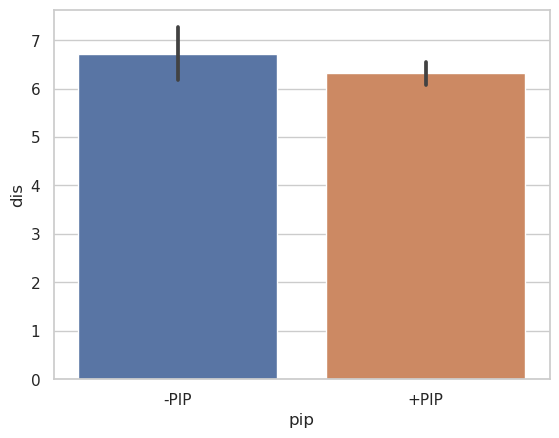

In [143]:
sns.set(font_scale=1.7)
sns.set_theme(style="whitegrid")

sns.barplot(
data = dfdistmeans, x='pip', y='dis', errorbar='se')#, hue='rep')

In [138]:

ttest_ind(dfdistmeans.loc[dfdistmeans.pip=='-PIP'].dis, dfdistmeans.loc[dfdistmeans.pip=='+PIP'].dis)


Ttest_indResult(statistic=0.6818118496442366, pvalue=0.5146084091095939)

Text(0.5, 0.98, 'Distance between IFM and its binding site')

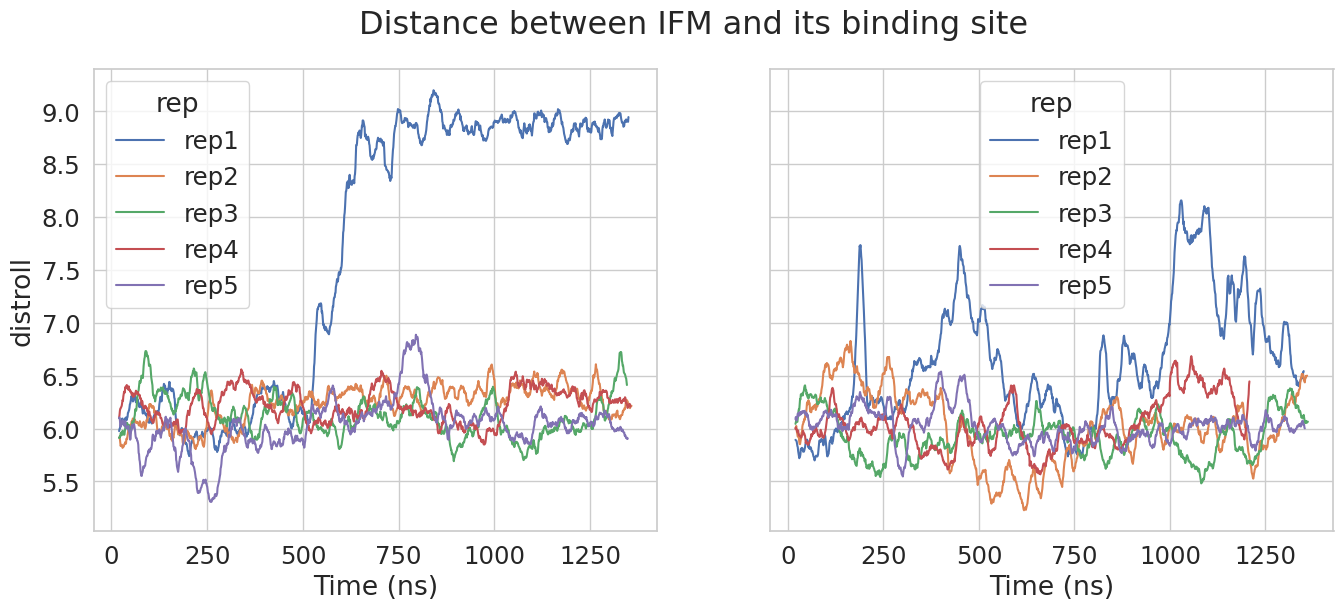

In [159]:

sns.set("notebook", font_scale=1.6, style="whitegrid")
# 
fig, ax = plt.subplots(1,2, figsize=(16,6), sharey=True)
sns.lineplot(data=dfdistALL_a.reset_index(), x='Time (ns)', y='distroll', hue='rep', ax=ax[1])
sns.lineplot(data=dfdistALL_b.reset_index(), x='Time (ns)', y='distroll', hue='rep', ax=ax[0])
plt.suptitle('Distance between IFM and its binding site')

Text(0.5, 0.98, 'Distance between IFM and its binding site')

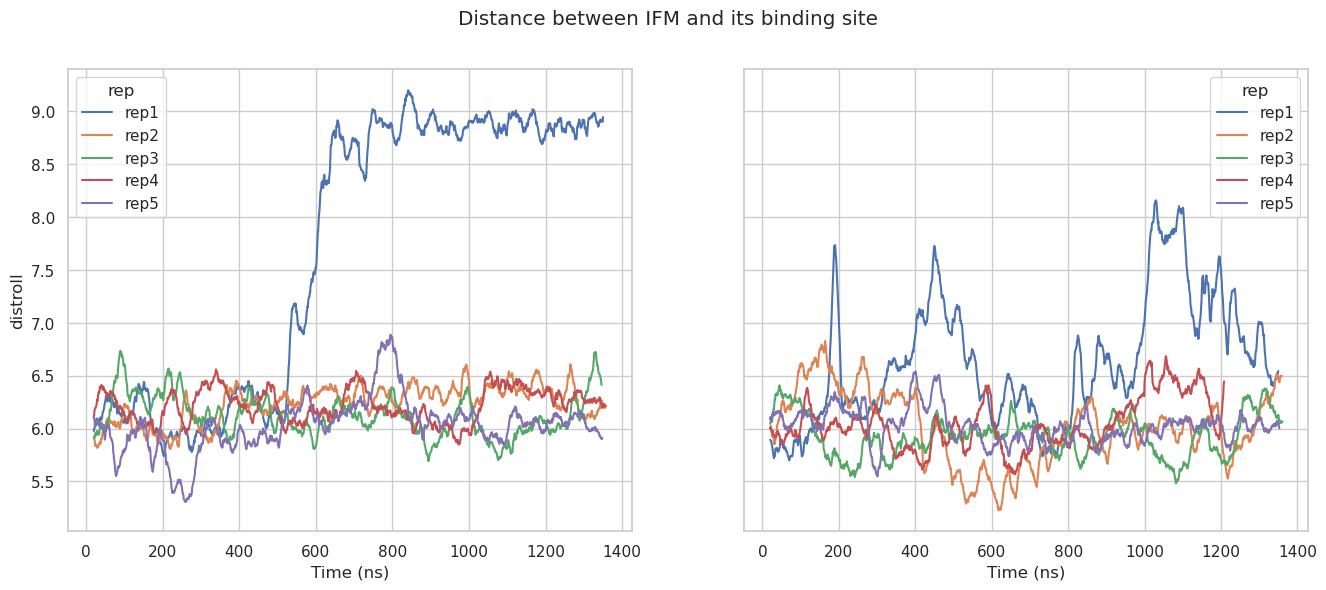

In [78]:
fig, ax = plt.subplots(1,2, figsize=(16,6), sharey=True)
sns.lineplot(data=dfdistALL_a.reset_index(), x='Time (ns)', y='distroll', hue='rep', ax=ax[1])
sns.lineplot(data=dfdistALL_b.reset_index(), x='Time (ns)', y='distroll', hue='rep', ax=ax[0])
plt.suptitle('Distance between IFM and its binding site')

Text(0.5, 0.98, 'Distance between IFM and its binding site')

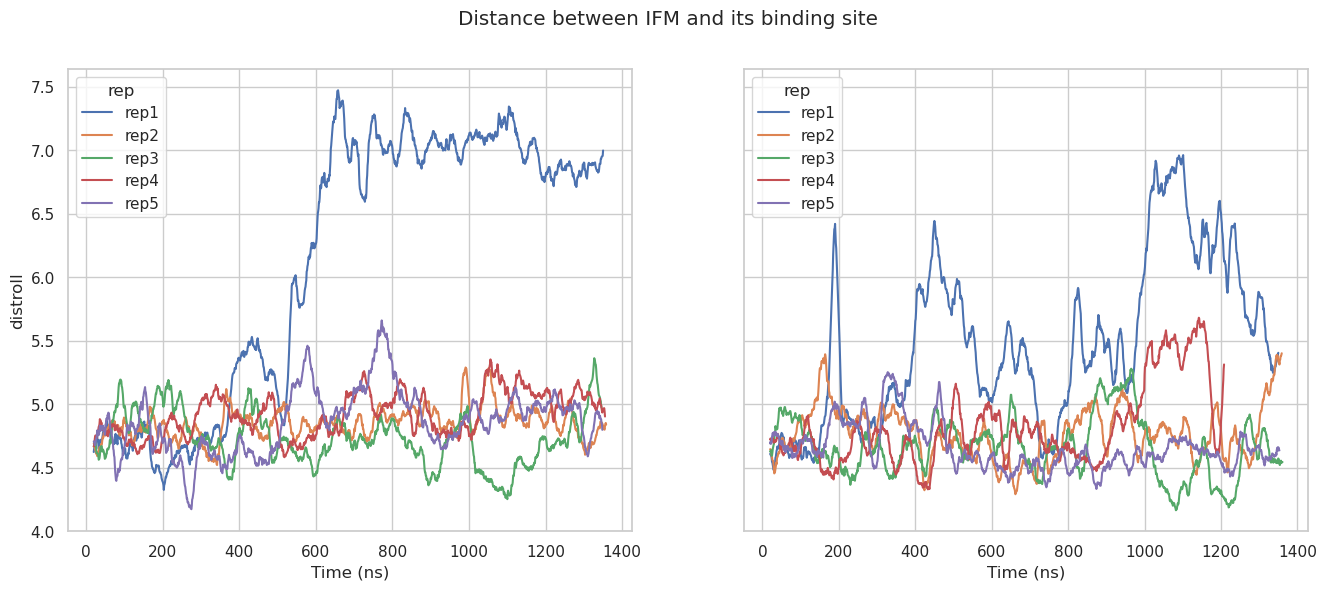

In [82]:
fig, ax = plt.subplots(1,2, figsize=(16,6), sharey=True)
sns.lineplot(data=dfdistALL_a.reset_index(), x='Time (ns)', y='distroll', hue='rep', ax=ax[1])
sns.lineplot(data=dfdistALL_b.reset_index(), x='Time (ns)', y='distroll', hue='rep', ax=ax[0])
plt.suptitle('Distance between IFM and its binding site')

In [7]:
rep = 1 # start from rep1
dfRKzB = pd.DataFrame()
for u in [ub1, ub2, ub3, ub4, ub5]: # list of universes with each replicate loaded in 
    reslist = [973, 976, 979, 982, 985] # list of gating charge residues
    zdict = {}

    for r in reslist:
        z_coordinate = []
        resid = str(r)
        for fr in u.trajectory: 
            atoms = u.select_atoms('resid ' + resid + ' and not name C O N H') # selection for the gating charge residue (sidechain only)
            # Calculate center of mass
            com = atoms.center_of_mass()
            # Get the z-coordinate of the center of mass
            z_coordinate.append(com[2])
        zdict[resid] = z_coordinate
        print(resid)
    zdf = pd.DataFrame(zdict)
    zdf['rep'] = rep
    rep += 1
    dfRKzB = pd.concat([dfRKzB, zdf])
    
dfRKzB = dfRKzB.reset_index()

973
976
979
982
985
973
976
979
982
985
973
976
979
982
985
973
976
979
982
985
973
976
979
982
985


In [236]:
# dfRKz = dfRKz.reset_index()
dfRKz[dfRKz['rep']==1]

index        973        976        979        982        985  rep
0        0  77.858064  74.381724  70.222963  63.627215  55.583136    1
1        1  78.472845  74.720688  70.065540  63.445444  55.896114    1
2        2  78.171890  74.765719  70.355258  63.729661  55.922118    1
3        3  77.420980  74.061869  69.917405  63.340609  56.212763    1
4        4  77.148301  74.913093  69.945143  63.708927  56.012704    1
..     ...        ...        ...        ...        ...        ...  ...
919    919  75.068945  73.779957  69.944571  59.026630  52.304644    1
920    920  75.748254  73.639430  69.822735  59.339560  52.650582    1
921    921  75.226519  73.631669  69.952988  59.271559  52.420888    1
922    922  74.712235  72.884970  69.646654  59.967909  52.181566    1
923    923  75.305352  72.312784  69.123353  59.915154  52.555012    1

[924 rows x 7 columns]

In [1]:
# make the plot over time
fig, ax = plt.subplots(5,1, figsize=(20,20))
rep = 1
while rep < 6:
    for i in [973, 976, 979, 982, 985]:
        sns.lineplot(data=dfRKz[dfRKz['rep']==rep], 
                     x='index', y=str(i), ax=ax[rep-1])
    rep += 1


NameError: name 'plt' is not defined

In [19]:
dfRKzB[dfRKzB['rep']==1]['973']

0       78.851262
1       79.750318
2       79.561517
3       78.119493
4       79.248653
          ...    
1535    76.339447
1536    76.668785
1537    76.603542
1538    76.537155
1539    76.710712
Name: 973, Length: 1540, dtype: float64

OptionError: No such keys(s): 'mode.use_inf_as_null'

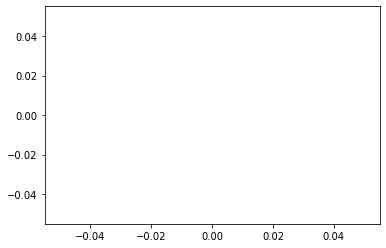

In [17]:
sns.lineplot(data=dfRKzB[dfRKzB['rep']==2], x='index', y=str(973))

OptionError: No such keys(s): 'mode.use_inf_as_null'

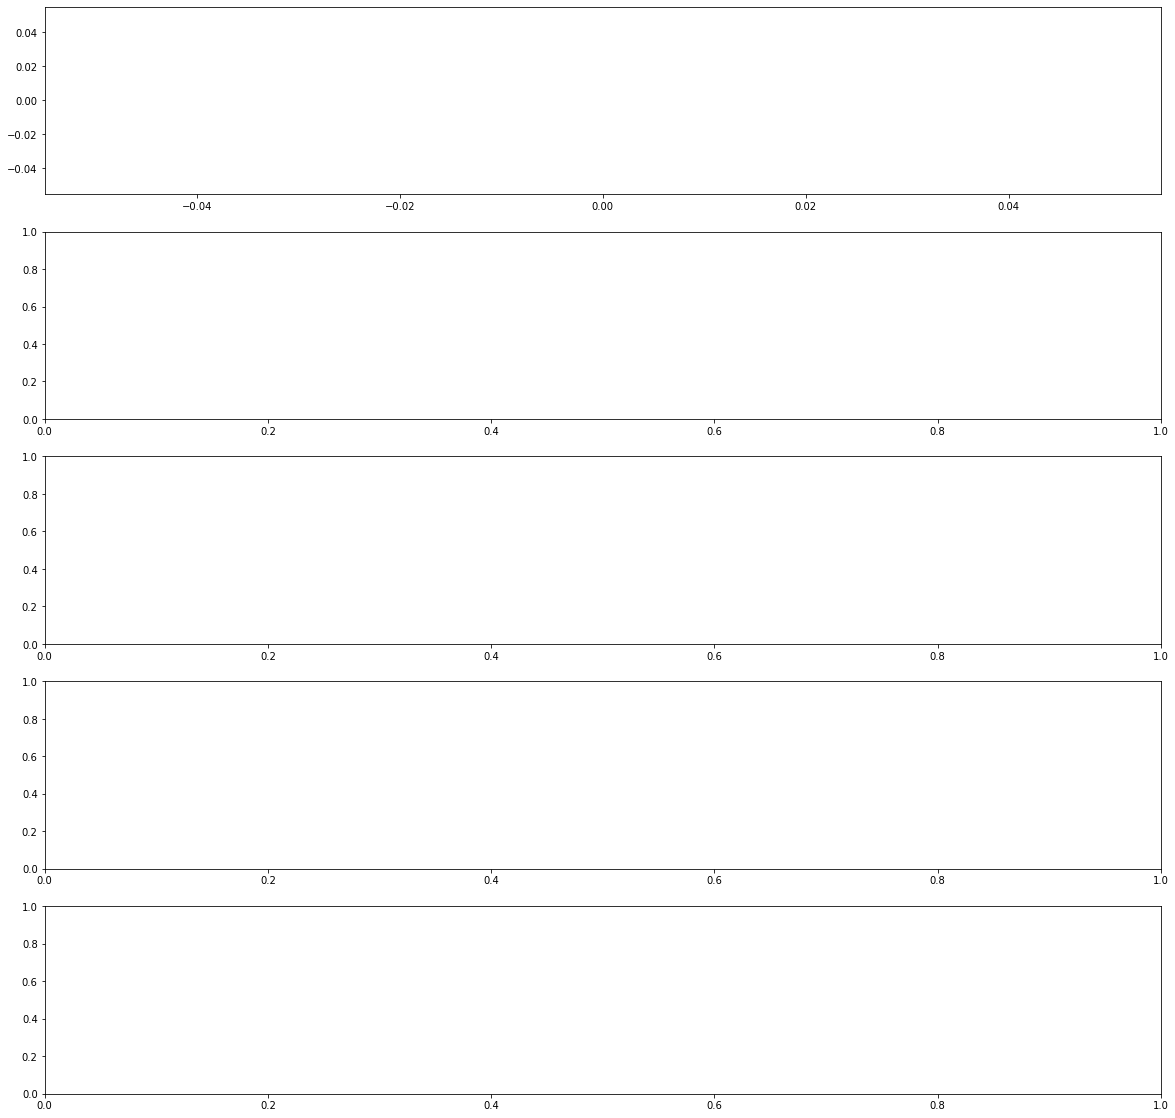

In [8]:
fig, ax = plt.subplots(5,1, figsize=(20,20))
rep = 1
while rep < 6:
    for i in [973, 976, 979, 982, 985]:
        sns.lineplot(data=dfRKzB[dfRKzB['rep']==rep], 
                     x='index', y=str(i), ax=ax[rep-1])
    rep += 1
    



# prolif

In [385]:
ua1.trajectory

<XTCReader /mnt/sde1/et2023/Navpip/2306_NEWatomistic/2306_NEW/AMB/AWTX_SAP/rep_1/repstride.xtc with 1350 frames of 18575 atoms>

In [386]:
wd = adir
u = ua1
resid = "831-867"

# save files
out1 = wd + 'FPLIF_res'+str(resid)+'.pkl'
# out2 = wd + 'FPPLOT_res'+str(resid)+'.html'
out3 = wd + 'FPDF_res'+str(resid)+'.pkl'
    
lig = u.select_atoms("resid " + str(resid))
prot = u.select_atoms("not resid " + str(resid)) # byres around 10 group lig", lig=lig)
lig.guess_bonds()
prot.guess_bonds()

fp = plf.Fingerprint()
fp.run(u.trajectory[::10], lig, prot, n_jobs=4)
fp.to_pickle(out1)

df = fp.to_dataframe()
df.to_pickle(out3)

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/topologyattrs.py:2011: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(sorted(unique_bonds)), 4)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/topologyobjects.py:600: DeprecationWarning

NameError: name 'plf' is not defined

<AxesSubplot:xlabel='protein', ylabel='ligand'>

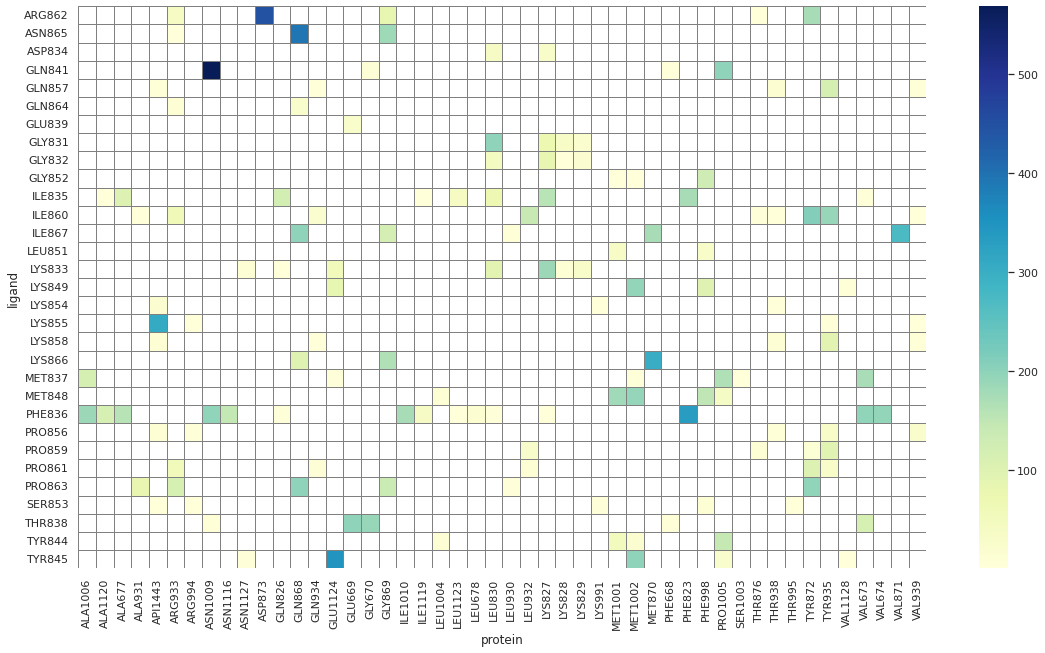

In [118]:
g0 = (df.groupby(level=['ligand', "protein"], axis=1)
       .sum()
#        .astype(bool)
       .sum()
     .unstack()
    )
fig, ax = plt.subplots(figsize=(g0.shape[1]/3+3, g0.shape[0]/3))
sns.heatmap(g0, cmap='YlGnBu', linewidths=1, linecolor='grey')

In [145]:
ubprm.select_atoms('protein and resid 1306-1342')

<AtomGroup with 627 atoms>

In [146]:
uaprm.select_atoms('protein and resid 1306-1342')

<ResidueGroup with 54079 residues>

In [147]:
print(uaprm.residues)

<ResidueGroup [<Residue VAL, 1>, <Residue VAL, 2>, <Residue ARG, 3>, ..., <Residue WAT, 54077>, <Residue WAT, 54078>, <Residue WAT, 54079>]>


In [150]:
wd = adir
u = uaprm
resid = "1306-1342"

# save files
out1 = wd + 'FPLIF_res'+str(resid)+'.pkl'
# out2 = wd + 'FPPLOT_res'+str(resid)+'.html'
out3 = wd + 'FPDF_res'+str(resid)+'.pkl'
    
lig = u.select_atoms("protein and resid " + str(resid))
prot = u.select_atoms("protein and not resid " + str(resid)) # byres around 10 group lig", lig=lig)
lig.guess_bonds()
prot.guess_bonds()

fp = plf.Fingerprint()
fp.run(u.trajectory[::50], lig, prot, n_jobs=4)
fp.to_pickle(out1)

df = fp.to_dataframe(return_atoms=False)
df.to_pickle(out3)

  0%|          | 0/200 [00:00<?, ?it/s]

/home/elaine/anaconda3/envs/prolif/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:990: UserWarning: The standardization could not be completed within a reasonable number of iterations
  warnings.warn("The standardization could not be completed within a "
/home/elaine/anaconda3/envs/prolif/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:990: UserWarning: The standardization could not be completed within a reasonable number of iterations
  warnings.warn("The standardization could not be completed within a "
/home/elaine/anaconda3/envs/prolif/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:990: UserWarning: The standardization could not be completed within a reasonable number of iterations
  warnings.warn("The standardization could not be completed within a "
/home/elaine/anaconda3/envs/prolif/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:990: UserWarning: The standardization could not be completed within a reasonable number of iterations

Text(0.5, 1.0, 'DIII-IV linker contacts w/PIP')

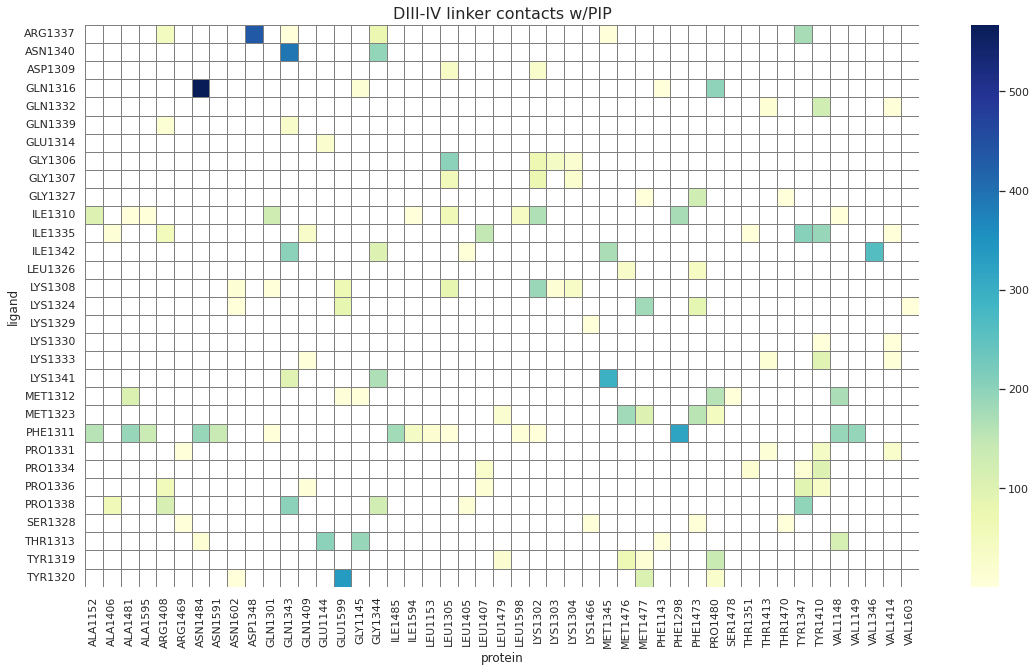

In [155]:
g0 = (df.groupby(level=['ligand', "protein"], axis=1)
       .sum()
#        .astype(bool)
       .sum()
     .unstack()
    )
fig, ax = plt.subplots(figsize=(g0.shape[1]/3+3, g0.shape[0]/3))
sns.heatmap(g0, cmap='YlGnBu', linewidths=1, linecolor='grey')
plt.title('DIII-IV linker contacts w/PIP', fontsize=16)

In [139]:
wd = bdir
u = ubprm
resid = "1306-1342"

# save files
out1 = wd + 'FPLIF_res'+str(resid)+'.pkl'
# out2 = wd + 'FPPLOT_res'+str(resid)+'.html'
out3 = wd + 'FPDF_res'+str(resid)+'.pkl'
    
lig = u.select_atoms("protein and resid " + str(resid))
prot = u.select_atoms("protein and not resid " + str(resid)) # byres around 10 group lig", lig=lig)
lig.guess_bonds()
prot.guess_bonds()

fp = plf.Fingerprint()
fp.run(u.trajectory[::50], lig, prot, n_jobs=4)
fp.to_pickle(out1)

df = fp.to_dataframe(return_atoms=False)
df.to_pickle(out3)

  0%|          | 0/200 [00:00<?, ?it/s]

/home/elaine/anaconda3/envs/prolif/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:990: UserWarning: The standardization could not be completed within a reasonable number of iterations
  warnings.warn("The standardization could not be completed within a "
/home/elaine/anaconda3/envs/prolif/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:990: UserWarning: The standardization could not be completed within a reasonable number of iterations
  warnings.warn("The standardization could not be completed within a "
/home/elaine/anaconda3/envs/prolif/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:990: UserWarning: The standardization could not be completed within a reasonable number of iterations
  warnings.warn("The standardization could not be completed within a "
/home/elaine/anaconda3/envs/prolif/lib/python3.10/site-packages/MDAnalysis/converters/RDKit.py:990: UserWarning: The standardization could not be completed within a reasonable number of iterations

Text(0.5, 1.0, 'DIII-IV linker contacts NOPIP')

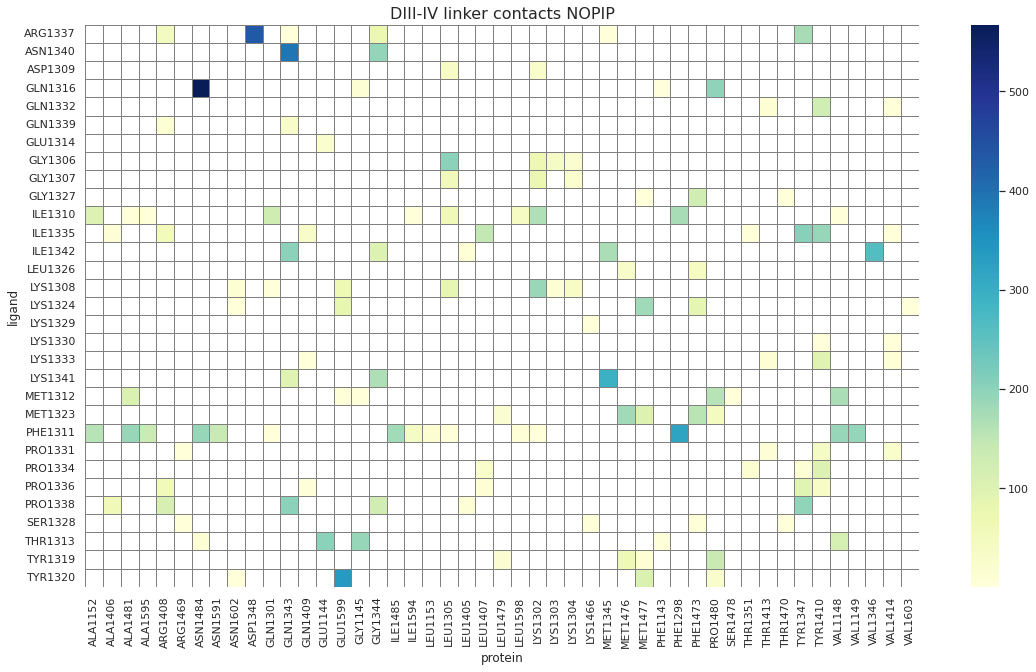

In [154]:
g1 = (df.groupby(level=['ligand', "protein"], axis=1)
       .sum()
#        .astype(bool)
       .sum()
     .unstack()
    )
fig, ax = plt.subplots(figsize=(g1.shape[1]/3+3, g1.shape[0]/3))
sns.heatmap(g1, cmap='YlGnBu', linewidths=1, linecolor='grey')
plt.title('DIII-IV linker contacts NOPIP', fontsize=16)

<AxesSubplot:xlabel='protein', ylabel='ligand'>

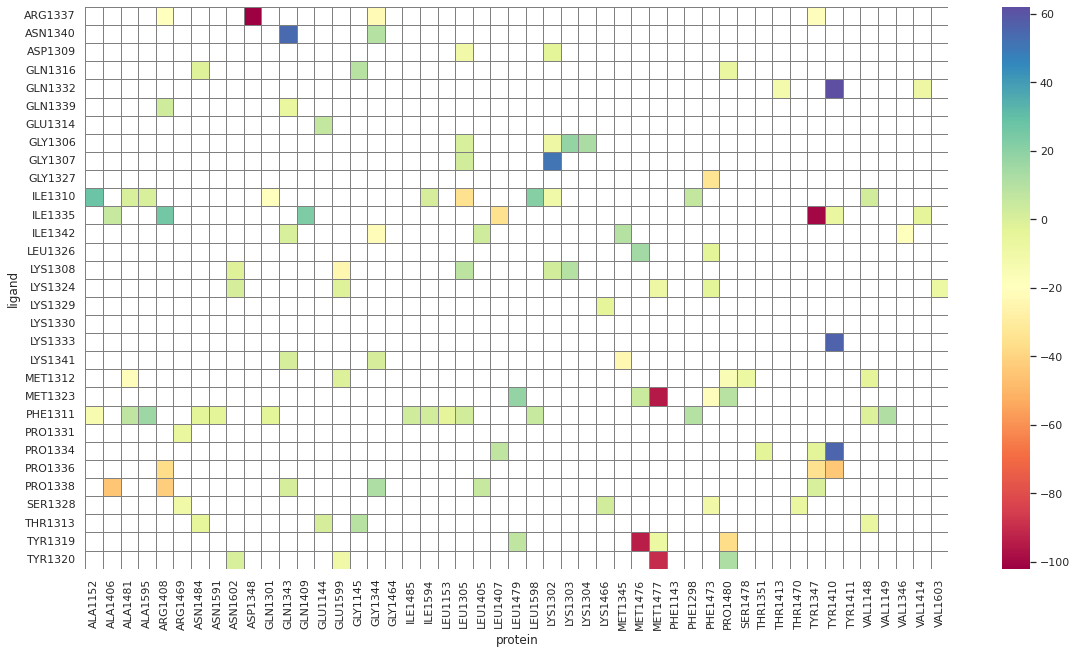

In [152]:
cc = g0.subtract(g1)
fig, ax = plt.subplots(figsize=(cc.shape[1]/3+3, cc.shape[0]/3))
sns.heatmap(cc, cmap='Spectral', linewidths=1, linecolor='grey')

In [389]:
x = re.split('0', '00000000023332210000001102221')
ll = []
for i in x:
    if i != '':
        ll.append(i)
        
print(ll)
x

if '2' not in '2333221':
    print("2")

['2333221', '11', '2221']
2


# contacts

In [63]:
print(dfrenum[dfrenum['og_num']==1457])
print(dfrenum[dfrenum['og_num']==1460])
print(dfrenum[dfrenum['og_num']==1463])
print(dfrenum[dfrenum['og_num']==1466])
print(dfrenum[dfrenum['og_num']==1469])

     RES  og_num RES1  new_num RESshort  RESID                  color
981  ARG    1457  ARG      982        R  R1457  (0.996, 0.398, 0.797)
     RES  og_num RES1  new_num RESshort  RESID                  color
984  ARG    1460  ARG      985        R  R1460  (0.996, 0.398, 0.797)
     RES  og_num RES1  new_num RESshort  RESID                  color
987  ARG    1463  ARG      988        R  R1463  (0.996, 0.398, 0.797)
     RES  og_num RES1  new_num RESshort  RESID                  color
990  LYS    1466  LYS      991        K  K1466  (0.996, 0.398, 0.797)
     RES  og_num RES1  new_num RESshort  RESID                  color
993  ARG    1469  ARG      994        R  R1469  (0.996, 0.398, 0.797)


In [26]:
print(dfrenum[dfrenum['og_num']==1329])
print(dfrenum[dfrenum['og_num']==1330])
print(dfrenum[dfrenum['og_num']==1333])
print(dfrenum[dfrenum['og_num']==1325])

     RES  og_num RES1  new_num RESshort  RESID                  color
853  LYS    1329  LYS      854        K  K1329  (0.996, 0.398, 0.797)
     RES  og_num RES1  new_num RESshort  RESID                  color
854  LYS    1330  LYS      855        K  K1330  (0.996, 0.398, 0.797)
     RES  og_num RES1  new_num RESshort  RESID                  color
857  LYS    1333  LYS      858        K  K1333  (0.996, 0.398, 0.797)
     RES  og_num RES1  new_num RESshort  RESID                  color
849  LYS    1325  LYS      850        K  K1325  (0.996, 0.398, 0.797)


In [99]:
dist_arr = distances.distance_array(ressel.positions, # reference
                                pipsel.positions, # configuration
                                box=u.dimensions)

dist_arr.shape

(158, 35)

In [132]:
pipsel.atoms.names

array(['C12', 'H2', 'O2', 'HO2', 'C13', 'H3', 'O3', 'HO3', 'C14', 'H4',
       'O4', 'P4', 'OP42', 'HP42', 'OP43', 'OP44', 'C15', 'H5', 'O5',
       'P5', 'OP52', 'OP53', 'OP54', 'C16', 'H6', 'O6', 'HO6', 'C11',
       'H1', 'P', 'O13', 'O14', 'O12', 'O11', 'C1'], dtype=object)

In [26]:
from MDAnalysis.analysis import distances

u = ua1 

ressel = u.select_atoms('not name C O N and resid 985 988 991 994 854 855 858 850')
pipsel = u.select_atoms('resname APH')

n_res = len(ressel)
n_pip = len(pipsel)
print('RESsel has {} atoms and PIPsel has {} atoms'.format(n_res, n_pip))

RESsel has 158 atoms and PIPsel has 35 atoms


/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)


In [42]:
print(ua1.trajectory)

<XTCReader /mnt/sde1/et2023/Navpip/2306_NEWatomistic/2306_NEW/AMB/AWTX_SAP/rep_1/repstride.xtc with 1540 frames of 18575 atoms>


In [53]:
def make_distdf(u):
    print(u.trajectory)
    for ts in u.trajectory[::10]:
        ressel = u.select_atoms('not name C O N and resid 985 988 991 994 854 855 858 850')
        pipsel = u.select_atoms('resname APH')
        dists = dict() 
        for res in ressel.residues:
#             print(res.resid)
            dist_arr = distances.distance_array(pipsel.positions, # reference
                                            res.atoms.positions, # configuration
                                            box=u.dimensions)
            dist_min = []
            for atm in dist_arr:
                dist_min.append(atm.min())
            dists[res.resid] =  dist_min 

        dfdf = pd.DataFrame(dists, index=pipsel.atoms.names)
        dfdf = (dfdf + dfdf) / 2
    return dfdf 
        # dfdf.columns

In [51]:
make_distdf(ua1)

<XTCReader /mnt/sde1/et2023/Navpip/2306_NEWatomistic/2306_NEW/AMB/AWTX_SAP/rep_1/repstride.xtc with 1540 frames of 18575 atoms>
850
854
855
858
985
988
991
994
850
854
855
858
985
988
991
994
850
854
855
858
985
988
991
994


/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

850
854
855
858
985
988
991
994
850
854
855
858
985
988
991
994
850
854
855
858
985
988
991
994
850
854
855
858
985
988
991
994


/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

850
854
855
858
985
988
991
994
850
854
855
858
985
988
991
994
850
854
855
858
985
988
991
994
850
854
855
858
985
988
991
994


/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

850
854
855
858
985
988
991
994
850
854
855
858
985
988
991
994
850
854
855
858
985
988
991
994
850
854
855
858
985
988
991
994


/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

850
854
855
858
985
988
991
994
850
854
855
858
985
988
991
994


/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)


850        854        855        858        985        988  \
C12   16.906841  11.873227  12.008100  14.296438  11.554482   6.820477   
H2    17.989390  12.878664  12.863752  14.668068  11.707107   7.375558   
O2    16.441761  11.304198  11.197740  13.112352  11.179208   6.510982   
HO2   15.490486  10.397120  10.404989  12.719700  11.253452   6.326469   
C13   16.321292  11.240000  11.298307  13.978619  12.780125   7.759568   
H3    16.782445  11.875659  12.009579  14.980189  12.918683   7.927965   
O3    16.945229  11.643447  11.140276  13.475107  13.950938   9.095873   
HO3   17.292690  12.086110  11.273662  14.145947  14.417635   9.548596   
C14   14.821737   9.814884  10.025870  13.436008  12.958298   7.584863   
H4    14.439669   9.192011   9.210657  12.322550  13.418651   8.095706   
O4    14.550449   9.757356  10.009661  14.093585  13.852172   8.351056   
P4    13.291182   8.486586   8.675347  13.388781  14.983984   9.342561   
OP42  12.039551   7.426927   8.051892  13.339820  14.268700   8.538554   
HP42  12.083394   7.347684   8.025096  12.921893  13.555200   7.859016   
OP43  13.330679   8.138478   7.573816  12.079657  15.851644  10.291964   
OP44  13.633586   9.225230   8.976018  14.597444  15.801139  10.160419   
C15   14.258340   9.559418  10.169945  13.775933  11.710485   6.180691   
H5    13.527802   9.094398   9.913839  14.124664  12.006565   6.322002   
O5    13.621400   8.762282   9.216945  12.364919  11.562164   6.135517   
P5    12.384413   7.816134   8.509337  11.752862  11.265551   5.900647   
OP52  13.096641   8.901532   9.521841  12.207803   9.791388   4.533107   
OP53  11.480806   7.240857   8.481161  12.524491  12.014730   6.371262   
OP54  11.867074   7.001161   7.288532  10.274164  11.728845   6.314857   
C16   15.409104  10.904491  11.611513  14.723028  10.546170   5.172827   
H6    15.243053  10.861476  11.549726  14.315177   9.639743   4.215082   
O6    15.393034  11.277060  12.200580  15.835313  10.492127   5.047948   
HO6   15.773468  11.805997  12.838648  16.081805   9.556560   4.177141   
C11   16.836483  12.145538  12.607530  15.304733  10.542121   5.678782   
H1    17.357118  12.779477  13.273536  16.306149  10.897866   6.143948   
P     19.195410  14.546682  14.809000  16.570536   9.306652   5.687713   
O13   19.755663  14.991825  14.990162  16.053746   8.955816   4.725645   
O14   19.677823  14.892120  15.132673  17.047686  10.681468   7.059352   
O12   17.560480  12.970378  13.344664  15.494494   9.261826   4.827637   
O11   19.787544  15.431100  15.903918  17.827424   8.426185   5.336900   
C1    20.704122  16.437379  17.029538  19.156277   9.060826   6.335320   

           991       994  
C12   5.583622  5.342826  
H2    6.583437  6.299284  
O2    6.096539  5.102209  
HO2   5.465245  4.458729  
C13   5.029360  5.753902  
H3    4.844602  6.067331  
O3    6.193449  7.109780  
HO3   6.218492  7.578469  
C14   3.964149  4.997860  
H4    4.703614  5.396472  
O4    3.378120  5.610722  
P4    3.652753  6.245070  
OP42  2.534360  4.841588  
HP42  2.328130  4.189487  
OP43  4.949586  7.107503  
OP44  3.824775  7.152539  
C15   3.150249  3.441193  
H5    2.097636  3.278992  
O5    3.694724  3.273992  
P5    3.135394  2.601402  
OP52  3.920727  1.813870  
OP53  1.701584  2.050854  
OP54  4.163508  3.551200  
C16   3.590218  3.181541  
H6    4.054685  2.367153  
O6    2.337458  3.184625  
HO6   2.556578  2.904373  
C11   4.659626  4.463884  
H1    4.310921  5.079622  
P     5.864985  5.975496  
O13   7.134903  6.547320  
O14   6.224272  6.984410  
O12   5.283222  4.515459  
O11   5.211416  5.852298  
C1    5.159405  6.815759

In [55]:
distdfa1 = make_distdf(ua1)
distdfa2 = make_distdf(ua2)
distdfa3 = make_distdf(ua3)
distdfa4 = make_distdf(ua4)
distdfa5 = make_distdf(ua5)

<XTCReader /mnt/sde1/et2023/Navpip/2306_NEWatomistic/2306_NEW/AMB/AWTX_SAP/rep_1/repstride.xtc with 1540 frames of 18575 atoms>


/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

<XTCReader /mnt/sde1/et2023/Navpip/2306_NEWatomistic/2306_NEW/AMB/AWTX_SAP/rep_2/repstride.xtc with 1549 frames of 18575 atoms>


/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

<XTCReader /mnt/sde1/et2023/Navpip/2306_NEWatomistic/2306_NEW/AMB/AWTX_SAP/rep_3/repstride.xtc with 1551 frames of 18575 atoms>


/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

<XTCReader /mnt/sde1/et2023/Navpip/2306_NEWatomistic/2306_NEW/AMB/AWTX_SAP/rep_4/repstride.xtc with 1503 frames of 18575 atoms>


/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

<XTCReader /mnt/sde1/et2023/Navpip/2306_NEWatomistic/2306_NEW/AMB/AWTX_SAP/rep_5/repstride.xtc with 1543 frames of 18575 atoms>


/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/home/elaine/anaconda3/lib/python3.8/site-packages/MDAnalysis/core/selection.py:655: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(vals), dtype=np.bool)
/hom

In [66]:
dfrenum.set_index('new_num').loc[991]['RESID']

'K1466'

In [68]:
[dfrenum.set_index('new_num').loc[r]['RESID'] for r in list(distdfa1.columns)]

['K1325', 'K1329', 'K1330', 'K1333', 'R1460', 'R1463', 'K1466', 'R1469']

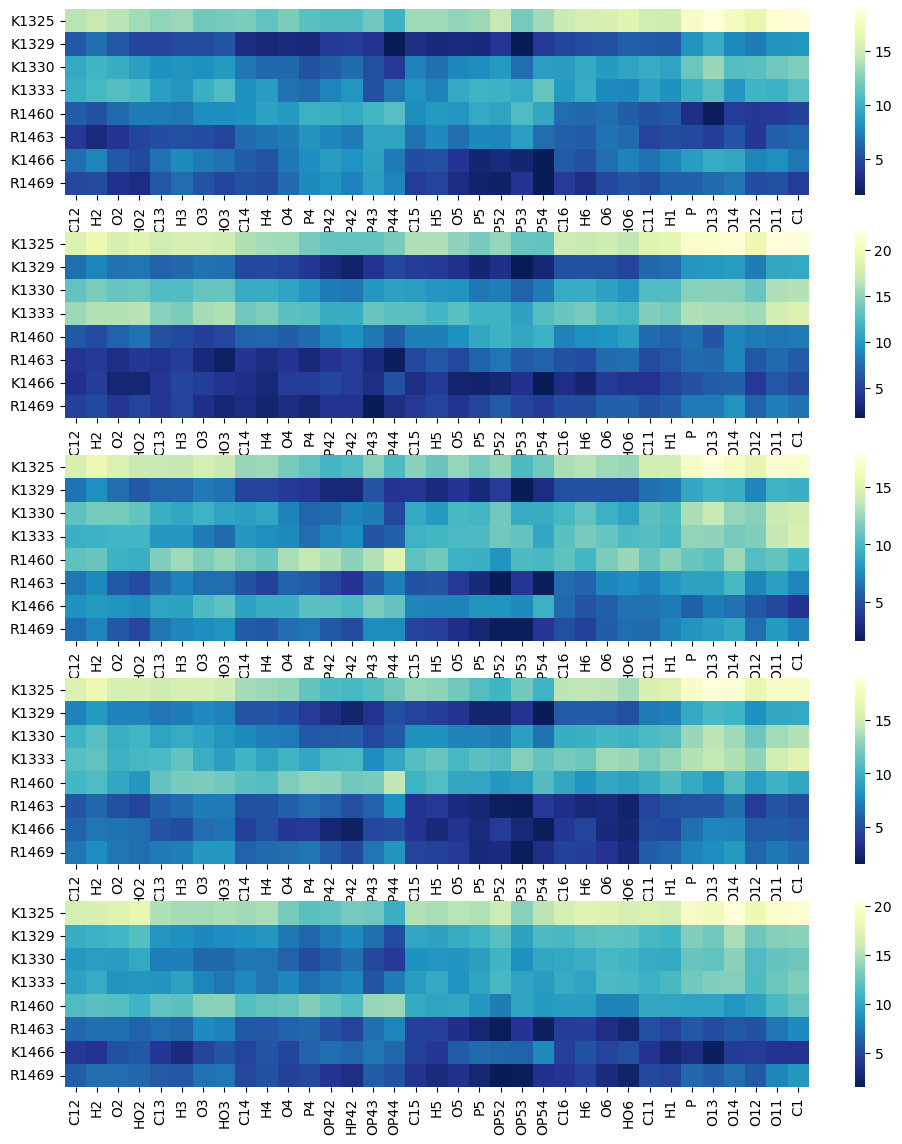

In [97]:
# dfdf.where(dfdf > 5)
# dfdf = make_distdf(ua2)

# cc = dfdf.mask(dfdf > 10)
fig, ax = plt.subplots(5, 1, figsize=(12, 14))
sns.heatmap(distdfa1.T, #.mask(dfdf > 10), 
            cmap='YlGnBu_r', #linewidths=1, linecolor='grey', 
            ax=ax[1-1])
sns.heatmap(distdfa2.T, #.mask(dfdf > 10), 
            cmap='YlGnBu_r', #linewidths=1, linecolor='grey', 
            ax=ax[2-1])
sns.heatmap(distdfa3.T, #.mask(dfdf > 10), 
            cmap='YlGnBu_r', #linewidths=1, linecolor='grey', 
            ax=ax[3-1])
sns.heatmap(distdfa4.T, #.mask(dfdf > 10), 
            cmap='YlGnBu_r', #linewidths=1, linecolor='grey', 
            ax=ax[4-1])
sns.heatmap(distdfa5.T, #.mask(dfdf > 10), 
            cmap='YlGnBu_r', #linewidths=1, linecolor='grey', 
            ax=ax[5-1])

for a in ax:
#     a.set_yticklabels(a.get_yticks(), rotation = 90)
    a.set_yticklabels([dfrenum.set_index('new_num').loc[r]['RESID'] for r in list(distdfa1.columns)], rotation=0)
#     ax.set_yticklabels(ax.get_yticks(), rotation = 90)
# ax[0].set_yticklabels([dfrenum.set_index('new_num').loc[r]['RESID'] for r in list(distdfa1.columns)], rotation = 45)


In [40]:
import networkx